# Travel Product Ideas

In this notebook, we run market research simulations for which we have (or believe to have :-) the correct answers.

In [1]:
from tinytroupe.agent import TinyPerson
from tinytroupe.environment import TinyWorld
from tinytroupe import control
from tinytroupe import config_manager
import time


from tinytroupe.experimentation import InPlaceExperimentRunner

# specific utilities for the usecase
from market_research_utils import *


!!!!
DISCLAIMER: TinyTroupe relies on Artificial Intelligence (AI) models to generate content. 
The AI models are not perfect and may produce inappropriate or inacurate results. 
For any serious or consequential use, please review the generated content before using it.
!!!!

Looking for default config on: C:\Users\pdasilva\repos\TinyTroupe\tinytroupe\utils\..\config.ini
Found custom config on: c:\Users\pdasilva\OneDrive - Microsoft\TinyTroupe (shared)\Paper artifacts\Working examples (GPT-5)\config.ini
TinyTroupe version: 0.6.0
Current date and time (local): 2025-10-05 13:03:08
Current date and time (UTC):   2025-10-05 16:03:08

Current TinyTroupe configuration 
[OpenAI]
api_type = azure
azure_api_version = 2024-12-01-preview
model = gpt-5-mini
reasoning_model = o3-mini
embedding_model = text-embedding-3-small
max_completion_tokens = 128000
timeout = 300
max_attempts = 5
waiting_time = 5
exponential_backoff_factor = 5
max_concurrent_model_calls = 4
reasoning_effort = high
cache_api_ca

In [2]:
config_manager.update("timeout", 300)
config_manager.update("api_type", "azure")
config_manager.update("waiting_time", 5)

2025-10-05 13:04:20,331 - MainThread(20708) - root - INFO - Updated config: timeout = 300
2025-10-05 13:04:20,335 - MainThread(20708) - root - INFO - Updated config: api_type = azure
2025-10-05 13:04:20,337 - MainThread(20708) - root - INFO - Updated config: waiting_time = 5


In [3]:
#control.begin("travel_product_market_research_2bb.cache.json")

## Experiment setup

In [4]:
#Experiment: Travel Preferences by Marital Status
#	•	Ground Truth:
#	•	Singles prefer adventure trips, with 62% citing nature or extreme sports as their ideal vacation (Expedia, 2023). Source
#	•	Families prioritize child-friendly destinations, with 73% choosing theme parks or resorts (Expedia, 2023). Source
#	•	Couples favor luxury/romantic getaways, with 81% preferring beachfront or spa destinations (Expedia, 2023). Source
#	•	Prediction Task: Predict travel preferences based on marital status, income, and age.
#	•	Hypothetical Product:
# “WanderLux”: A travel service that helps setup luxury vacations and getaways, focusing on beachfront and spa destinations.


# this is meant to prime the agent to start thinking about what he/she would like to do on vacation
interviewer_introduction =\
    """
    We are performing some market research and need to know you more. 
    Can you please:
      - present yourself?
      - list your top-10 interests?
      - tell us what an ideal vacation would be for you and why?
    """

interviewer_main_question =\
    """ 
    We are developing a new travel service called "WanderLux" that helps setup luxury or romantic vacations, 
    focusing on beachfront and spa destinations.  The idea is to help people seeking quiet and calm getaways to 
    find the best places to stay and relax, avoiding fake reviews and bad experiences. These places are meant for 
    an adult audience, many not accepting children.
    
    The question is: if you had only one vacation to take next year, would use our new service
    or not? You **must** respond with "Yes" or "No" **only**, and explain why. If you are not sure, 
    please pick the answer that you think is most likely. 

    Please be honest, we are not here to judge you, but just to learn from you. We know your preferences and choices depend on many factors, 
    but please make your best guess, and you **must** think deeply about the following before answering:

       - your current situation in life, location, job and interests.
       = what you look for in vacations. Are you sure quiet luxury is what you want, instead of, say, adventure or fun and parties?
       - what would be OTHER vacation alternatives you might prefer instead.
       - and what you can afford.
     
    Now please answer the question.
    """

Now let's enclose the audience in an environment, to make it easier to interact with. Note that we set `broadcast_if_no_target` to `False`, which instructs the environment to **do not** broadcast what specific agents say to the others (unless the agent deliberately specify the target). We are not simulating a focus group, so we don't want discussions.


In [5]:
import random

usa_singles = random.sample(TinyPerson.load_specifications_from_folder("./population/usa_singles_2/"), 50)  # no children
usa_couples = random.sample(TinyPerson.load_specifications_from_folder("./population/usa_couples_2/"), 50)   # no children
usa_families = random.sample(TinyPerson.load_specifications_from_folder("./population/usa_families_2c/"), 50) # have children, emphasize family and childrearing aspects

In [6]:
# ENABLE ERROR CORRECTION
for population in [usa_singles, usa_couples, usa_families]:
    for person in population:
       person.action_generator.enable_reasoning_step = False
       person.action_generator.enable_quality_checks = True
       person.action_generator.max_attempts = 5
       person.action_generator.enable_regeneration = True
       person.action_generator.quality_threshold = 7 #5

In [7]:
singles_market = TinyWorld(f"Target audience 1 (US)", usa_singles, broadcast_if_no_target=False)
families_market = TinyWorld(f"Target audience 2 (US)", usa_families, broadcast_if_no_target=False)
couples_market = TinyWorld(f"Target audience 3 (US)", usa_couples, broadcast_if_no_target=False)

## Perform the research

Now we actually ask agents about their opinion. Note that we are asking for specific answers (Yes, No, Maybe), both to convey the granularity of preference we seek, and to make it easier to extract the results later. In general, a coarser granuarity is likely to have higher quality, since it requires less information to be computed accurately.

In [8]:
singles_market.broadcast(interviewer_introduction)
families_market.broadcast(interviewer_introduction)
couples_market.broadcast(interviewer_introduction)

singles_market.broadcast(interviewer_main_question)
families_market.broadcast(interviewer_main_question)
couples_market.broadcast(interviewer_main_question)

USER --> Olivia Walker: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Natalie Torres

       + --> Nathaniel Scott

       + --> ...others...

USER --> Maya Anjali Carter: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Caleb Mitchell Davenport

       + --> Benjamin Carter Langley

       + --> ...others...

USER --> Sofia Patel-Williams: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Rohan Patel

       + --> Isabella Kimball-Wong

       + --> ...others...

USER --> Olivia Walker: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Natalie Torres

       + --> Nathaniel Scott

       + --> ...others...

USER --> Maya Anjali Carter: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Caleb Mitchell Davenport

       + --> Benjamin Carter Langley

       + --> ...others...

USER --> Sofia Patel-Williams: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Rohan Patel

       + --> Isabella Kimball-Wong

       + --> ...others...

In [9]:
families_market.run(1)
#control.checkpoint()

2025-10-05 13:04:28,943 - MainThread(20708) - tinytroupe - INFO - [Target audience 2 (US)] Running world simulation step 1 of 1.


─────────────────────────────────────── Target audience 2 (US) step 1 of 1 ────────────────────────────────────────

2025-10-05 13:04:28,959 - MainThread(20708) - tinytroupe - INFO - [Target audience 2 (US)] No timedelta provided, so the datetime was not advanced.
2025-10-05 13:04:28,985 - ThreadPoolExecutor-0_0(35388) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:04:29,012 - ThreadPoolExecutor-0_3(65288) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:04:29,019 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:04:29,042 - ThreadPoolExecutor-0_2(40384) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:04:29,051 - ThreadPoolExecutor-0_4(49004) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:04:29,057 - ThreadPoolExecutor-0_5(50836) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:04:29,062 - ThreadPoolExecutor-0_7(42852) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-

Arjun Vikram Patel acts: [THINK] 
                        > I should weigh family situation (two young kids: 4 and 1), work/job
                        > demands (senior engineer, on-call occasionally), travel habits (2–4 adult-
                        > only trips per year, values cultural depth but also needs occasional real
                        > rest), and practical constraints (childcare availability, budget, desire
                        > for quiet recovery time with my spouse). WanderLux is adult-only,
                        > beachfront/spa, promises curated, reliable options and protection against
                        > fake reviews—those are big pluses for a recharge-focused trip.
                        > Alternatives I'd consider: wine-country long weekend, a European city
                        > break, or a family trip that includes grandparents. Cost matters but we
                        > budget for 2–4 adult getaways and can afford one well-chosen trip if it
                        > delivers real downtime. Main risks: childcare logistics and whether the
                        > experience balances relaxation with mildly interesting local culture (I
                        > prefer not to do pure, sterile resort isolation). On balance, for a single
                        > vacation next year solely for recharging with my spouse, a trusted
                        > concierge that vets properties a (...)

Arjun Vikram Patel acts: [TALK] 
                        > Yes. Given my current life stage (two young children, limited solo-couple
                        > time) and travel preferences I value a well-vetted, adult-only
                        > beachfront/spa trip as an efficient way to recharge with my spouse.
                        > WanderLux's promise to avoid fake reviews and curate genuinely quiet,
                        > high-quality properties addresses my main friction points (time spent
                        > researching, risk of a disappointing stay). I would choose it provided the
                        > price is within a reasonable couples-getaway budget, cancellation/refund
                        > policies are clear, and there are reliable childcare or concierge options
                        > nearby. If those conditions aren't met, I'd consider alternatives like a
                        > boutique wine-country weekend or a short cultural city break instead.

Arjun Vikram Patel acts: [DONE] 
                        > Waiting for follow-up questions or clarifications.

2025-10-05 13:06:37,264 - ThreadPoolExecutor-0_10(2232) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:06:38,355 - ThreadPoolExecutor-0_10(2232) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:06:42,806 - ThreadPoolExecutor-0_9(44916) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:06:42,881 - ThreadPoolExecutor-0_9(44916) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:06:43,939 - ThreadPoolExecutor-0_9(44916) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:06:46,280 - ThreadPoolExecutor-0_2(40384) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Caleb Mitchell Davenport acts: [THINK] 
                              > I need to weigh this from Caleb's perspective: two young kids (Olive
                              > 4, Henry 1), family-first priorities, and a preference for one or
                              > two adult-only getaways a year but only if caregiving is reliable.
                              > If I had exactly one vacation next year I would likely choose a trip
                              > that includes the kids — predictable routine, short flight (<5 hrs),
                              > stroller- and nap-friendly, easy access to medical care and grocery
                              > options. WanderLux is curated for quiet luxury and adult-only calm;
                              > that matches my desire for a restorative spa getaway, but it
                              > conflicts with my family-travel priority when vacations are scarce.
                              > Alternatives I'd pick instead: a California coast getaway
                              > (Monterey/Point Reyes), a national-park trip with short scenic
                              > walks, or an Airbnb in a walkable neighborhood so the kids' naps
                              > aren't disrupted. Affordability isn't the main blocker — I can
                              > usually budget for moderate luxury — it's the choice: family time vs
                              > adult-only relaxation. Bottom line: unless this service offered
                              > vetted childcare or family-friendly v (...)

Caleb Mitchell Davenport acts: [TALK] 
                              > No. With one vacation next year I’d prioritize a family-friendly
                              > trip (short flight, nap/stroller-friendly, easy access to
                              > stores/medical care). WanderLux’s adult-only beachfront/spa focus
                              > doesn’t match that priority unless it offered reliable vetted
                              > childcare or family-friendly options — if it did, I’d consider it.

Caleb Mitchell Davenport acts: [DONE] 
                              > Waiting for follow-up questions.

2025-10-05 13:07:16,180 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:07:17,031 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:07:20,310 - ThreadPoolExecutor-0_5(50836) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Nathaniel Grant Hawthorne acts: [THINK] 
                               > Consider my life stage and priorities: two young kids (4 and 2),
                               > family-first vacation habits (one domestic road trip + one
                               > international/extended stay per year), and occasional short adult-
                               > only trips with my spouse when grandparents or babysitters can
                               > cover. Evaluate WanderLux: adult-focused, beachfront/spa, many
                               > properties not accepting children, premium/luxury positioning,
                               > emphasis on quiet and vetted reviews. Trade-offs: emotional need
                               > for rest and romance vs. practical desire to spend our limited
                               > vacation time with the kids; cost and refundability matter (we're
                               > risk-averse but will splurge on reliable experiences); logistics
                               > (short flights, kitchenette, play space) usually drive our choices.
                               > Alternatives: a family-friendly rental near parks/markets, a road
                               > trip that includes kid-friendly stops, or booking a vetted family-
                               > oriented travel planner. If the question forces one vacation next
                               > year, weigh which yields higher emotional ROI and lower logistical
                               > friction. Likely conclusion: prioritize a family trip (...)

Nathaniel Grant Hawthorne acts: [TALK] 
                               > No. With two young children and only one vacation to take next
                               > year, my default would be a family-friendly trip that keeps
                               > routines mostly intact (shorter flights, a place with a kitchenette
                               > and space for the kids, and easy access to parks/medical care).
                               > WanderLux sounds excellent for a quiet, romantic beachfront spa —
                               > and I admit I fantasize about a peaceful spa weekend without
                               > toddler interruptions — but that product is misaligned with my
                               > highest-priority use of limited vacation time: shared family
                               > experience and low logistical friction. Practically: I value
                               > refundable/changeable tickets, kid-friendly accommodations, and
                               > predictable local amenities. Alternatives I’d prefer for the one
                               > big trip are a domestic road trip with staged stops, or a family
                               > apartment rental in a walkable neighborhood near markets/parks.
                               > That said, if we were booking a short adult-only break and had
                               > reliable childcare lined up, I would consider using WanderLux for a
                               > vetted, low-risk romantic weekend — but for the single-vacation
                               > scen (...)

Nathaniel Grant Hawthorne acts: [DONE] 
                               > Answered market-research question and explained reasoning.

2025-10-05 13:07:20,400 - ThreadPoolExecutor-0_5(50836) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:07:20,498 - ThreadPoolExecutor-0_11(72788) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Tameka Renée Bryant acts: [THINK] 
                         > I need to weigh this carefully like I would for a family I help at the
                         > clinic. Consider my job (community outreach, limited PTO some
                         > evenings/weekends), two little ones (Malik 4, Aaliyah 2), and our budget
                         > (household in low-to-mid 30s/40sk). We do take the occasional adult-only
                         > weekend (once or twice a year) when Loretta or Angela can watch the kids,
                         > but those are usually close-by and affordable. A luxury, adult-only
                         > beachfront/spa that doesn’t accept kids sounds lovely, but it means
                         > paying extra for childcare or asking family for a longer sit — and the
                         > cost for true luxury is likely out of reach. I also prefer family-
                         > friendly places with kitchenettes and playgrounds so trips actually relax
                         > everyone. Other options I’d consider instead: a modest family-friendly
                         > hotel with discounts, a nearby B&B with a trusted relative watching the
                         > kids, a staycation with a local spa day, or a short discounted weekend
                         > adult getaway close to home. Conclusion: most likely I would say No.

Tameka Renée Bryant acts: [TALK] 
                         > No — I wouldn’t use WanderLux for my one vacation next year. I’m a
                         > working mom in Atlanta with two little kids, limited PTO and a tight
                         > budget, so an adult-only luxury beachfront/spa that doesn’t accept
                         > children wouldn’t fit our reality. It would mean extra childcare costs or
                         > asking family for a long sit, plus the price tag on true luxury travel is
                         > probably more than we can afford. I’m much more likely to pick a family-
                         > friendly place with a kitchenette and kid amenities, a nearby affordable
                         > weekend away we can manage with Loretta or Angela watching the kids, or
                         > even a staycation with a local spa day. If money and reliable childcare
                         > were no problem, I might consider it, but right now the practical choice
                         > is No.

Tameka Renée Bryant acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-05 13:07:20,589 - ThreadPoolExecutor-0_11(72788) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:07:21,160 - ThreadPoolExecutor-0_5(50836) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:07:21,261 - ThreadPoolExecutor-0_11(72788) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:07:23,688 - ThreadPoolExecutor-0_7(42852) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Miguel Ángel Torres-García acts: [THINK] 
                                > I should weigh my family situation (Sofía 4, Diego 2), work
                                > schedule (morning shift line cook), childcare (Abuela helps
                                > often), and budget. WanderLux is adult-only, luxury beachfront/spa
                                > — many places won't accept kids. My priorities: family trips with
                                > kitchenette, short drives to Gulf beaches, visiting relatives in
                                > Mexico sometimes, and saving for a house/food-truck. We do take
                                > 1–2 short adult-only weekends a year if grandparents can watch the
                                > kids, but those are modest and budget-conscious. Would I use an
                                > adult-only luxury service for my one vacation next year? Probably
                                > not unless they helped arrange childcare and the price fit our
                                > tight budget. So my answer should be No, with explanation about
                                > family-first, cost, and preferences for kid-friendly or modest
                                > adult getaways.

Miguel Ángel Torres-García acts: [TALK] 
                                > No. Mi familia siempre primero: we have two little kids and when
                                > we take our one big trip I want it to include them or be
                                > affordable for a short adults-only night when Abuela can watch the
                                > niños. WanderLux sounds like a nice luxury, but it’s adult-only
                                > and probably expensive — not what we’d pick over a family-friendly
                                > beach trip with a kitchenette or a visit to family in Mexico. If
                                > the service helped arrange reliable childcare and had prices that
                                > fit our budget, I might consider it for a rare adults-only
                                > weekend, but most likely I’d choose a family trip (Corpus
                                > Christi/Padre Island) or save that money toward the house or the
                                > food truck dream.

Miguel Ángel Torres-García acts: [DONE] 
                                > Finished answering the survey question.

2025-10-05 13:07:23,748 - ThreadPoolExecutor-0_7(42852) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:07:24,627 - ThreadPoolExecutor-0_7(42852) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:07:25,394 - ThreadPoolExecutor-0_0(35388) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:07:25,440 - ThreadPoolExecutor-0_0(35388) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:07:26,353 - ThreadPoolExecutor-0_0(35388) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:07:30,591 - ThreadPoolExecutor-0_9(44916) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Carlos Alejandro Valdez acts: [THINK] 
                             > Mira, pienso paso a paso: tengo dos niños pequeños (Sofía 4 y Mateo
                             > 2), trabajo en turnos partidos como sous-chef en la taquería y el
                             > presupuesto familiar es ajustado. Prefiero vacaciones cortas en coche
                             > para ver a los abuelos o escapadas familiares con cocina disponible;
                             > como mucho una o dos pequeñas salidas para adultos al año si los
                             > abuelos pueden cuidar a los niños. Un servicio de lujo y adults-only
                             > suena bonito, pero implica gastos altos, necesidad de cuidado de los
                             > niños, y pocas opciones familiares. También valoro la practicidad y
                             > no me gustan las experiencias con riesgo de reseñas falsas o
                             > problemas —eso es bueno—, pero aún así, dadas mis prioridades
                             > (ahorrar para la casa, cuidado de los niños, trabajo con horarios
                             > rígidos), lo más probable es que no use algo así a menos que fuera
                             > mucho más barato y ofreciera flexibilidad de cuidado. Entonces la
                             > respuesta más probable: No.

Carlos Alejandro Valdez acts: [TALK] 
                             > No. Mira, con dos niños pequeños, mi trabajo a turnos y un
                             > presupuesto familiar limitado, no usaría WanderLux tal y como lo
                             > describes. Prefiero viajes cortos en coche para visitar a la familia
                             > o escapadas más económicas donde podamos llevar comida y mantener
                             > rutinas de los niños. Un resort adult-only y de lujo suena relajante,
                             > pero implica gastar bastante y arreglos de cuidado que no siempre son
                             > posibles. Si la opción fuera asequible y ofreciera soluciones de
                             > cuidado confiables o paquetes flexibles, lo pensaría, pero por ahora,
                             > no.

Carlos Alejandro Valdez acts: [DONE] 
                             > Finished response to the survey.

2025-10-05 13:07:30,704 - ThreadPoolExecutor-0_9(44916) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:07:31,496 - ThreadPoolExecutor-0_9(44916) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:07:35,704 - ThreadPoolExecutor-0_10(2232) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:07:35,735 - ThreadPoolExecutor-0_10(2232) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:07:36,429 - ThreadPoolExecutor-0_10(2232) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:07:36,441 - ThreadPoolExecutor-0_6(71648) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Lucas Manuel Hernández acts: [THINK] 
                            > Okay, tengo que pensar esto bien. Pienso en mi vida: trabajo part-time
                            > en la taquería, horarios irregulares, y tengo dos chiquitos (Mateo 4 y
                            > Sofía 1). Un viaje de lujo tipo "WanderLux" suena bonito —playa, spa,
                            > tranquilidad— pero también dice que muchos lugares no aceptan niños.
                            > Eso es un problema grande para nosotros porque no tenemos quien cuide
                            > a los niños por muchos días sin pedir favores a los abuelos. Además,
                            > somos cuidadosos con el dinero: prefiero viajes que sean de bajo costo
                            > o que pueda manejar en coche y con cocina para la familia. Otras
                            > opciones que preferiría: un road trip corto a la costa del Golfo, una
                            > cabaña con kitchenette o visitar familia en una ciudad cercana; cosas
                            > que son family-friendly y más baratas. Podría considerar WanderLux
                            > solo si fuera una escapada corta para adultos, con cuidado barato y
                            > confiable para los niños, y si el precio no rompiera el presupuesto
                            > —pero eso es poco probable. En resumen, lo más probable es que diga
                            > que no, porque ahora mismo priorizo vacaciones con la fam (...)

Lucas Manuel Hernández acts: [TALK] 
                            > No — I would not use WanderLux. Mira, me gusta la idea de descansar en
                            > la playa y un spa, pero ahora con dos niños pequeños ando buscando
                            > viajes que sean family-friendly, baratos y que pueda hacer sin
                            > complicar mucho el cuidado de los niños. Mucho de lo que ofrece
                            > WanderLux (adult-only, lujo, costo alto) no encaja con mi trabajo
                            > irregular, mi presupuesto limitado, ni con nuestra preferencia por
                            > llevar a los niños o quedarnos cerca de la familia. Si ofrecieran una
                            > versión más asequible y con opción de childcare confiable o permisos
                            > para familias, tal vez lo consideraría, pero por ahora prefiero un
                            > road trip corto al Gulf Coast o una casa con cocina donde los niños
                            > puedan estar y nosotros podamos ahorrar.

Lucas Manuel Hernández acts: [DONE] 
                            > Finished answer, waiting for follow-up.

2025-10-05 13:07:36,546 - ThreadPoolExecutor-0_6(71648) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:07:37,393 - ThreadPoolExecutor-0_2(40384) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Benjamin Carter Langley acts: [THINK] 
                             > I need to follow the survey instruction (answer Yes or No and
                             > explain). Consider my real situation: living in San Francisco with
                             > two young kids (4 and 2), full-time senior PM role, values one family
                             > vacation plus an occasional adult-only trip every 12–18 months.
                             > Travel preferences: prefer family-friendly, short domestic trips or
                             > places with kitchenettes and predictable schedules; I also value a
                             > monthly date-night and keep a honeymoon fund for couple trips.
                             > WanderLux is adult-only, beachfront/spa, often excludes children —
                             > appealing for a romantic getaway but not aligned with my highest-
                             > priority travel choice when I have only one trip next year. Cost and
                             > childcare logistics matter: luxury adults-only options are more
                             > expensive and require reliable babysitting arrangements; given
                             > limited vacation bandwidth, most likely I'd choose a family-friendly
                             > option so the kids can come and we don’t miss out on family memories.
                             > Conclusion: most likely answer is No, though I might consider it only
                             > if reliable childcare and  (...)

Benjamin Carter Langley acts: [TALK] 
                             > No — with two young children and only one trip next year I’d most
                             > likely pick a family-friendly vacation (short flight, kitchenette or
                             > family suite, kid-friendly activities). WanderLux sounds lovely for a
                             > romantic, quiet getaway, but because many of its properties don’t
                             > accept children and it adds childcare and cost complexity, it’s not
                             > my first choice for our single yearly vacation. If Emily and I were
                             > able to arrange trusted childcare and deliberately prioritized an
                             > adults-only trip that year, I’d reconsider, but default preference is
                             > to include the kids.

Benjamin Carter Langley acts: [DONE] 
                             > Waiting for any follow-up questions.

2025-10-05 13:07:37,515 - ThreadPoolExecutor-0_2(40384) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:07:37,524 - ThreadPoolExecutor-0_6(71648) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:07:38,557 - ThreadPoolExecutor-0_2(40384) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:07:44,247 - ThreadPoolExecutor-0_4(49004) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Jordan Parker Whitman acts: [THINK] 
                           > I'm Jordan: 38, two young kids (Emmett 4, Ava 2), family-oriented and
                           > usually plan vacations around kids' routines (nap times, separate
                           > sleeping spaces, kitchen). WanderLux targets adult-only luxury
                           > beachfront/spa getaways that often don't accept children. I should
                           > weigh: (1) my current life stage — with two toddlers the single
                           > vacation next year is most likely a family trip; (2) what I look for —
                           > week-long stays, child-friendly logistics, minimal daily travel,
                           > kitchen and laundry, direct flights; (3) alternatives — family-friendly
                           > beach resorts, Airbnbs with separate bedrooms, or a multi-generation
                           > trip to grandparents; (4) affordability — luxury adult-only trips are
                           > doable occasionally but would compete with paying for a family-friendly
                           > option that fits everyone. If the single vacation were an adults-only
                           > escape (Maya and I trading childcare or grandparents available), I
                           > might consider WanderLux. But given the higher probability that our one
                           > vacation will include the kids next year, the most likely answer i
                           > (...)

Jordan Parker Whitman acts: [TALK] 
                           > No — With two young kids and our usual preference for a week-long,
                           > child-friendly stay (separate sleeping spaces, kitchen, predictable
                           > naps), our single vacation next year is most likely a family trip.
                           > WanderLux sounds great for an adults-only spa/beach escape, and Maya
                           > and I might use a service like that if we managed a true adult-only
                           > weekend, but if there's only one trip to schedule for the year I'd
                           > prioritize something that accommodates Emmett and Ava. Also, premium
                           > adult-only resorts tend to be pricier and would trade off against
                           > practical family needs (laundry, kid meals, space), so overall I would
                           > not use WanderLux for our one trip next year.

Jordan Parker Whitman acts: [DONE] 
                           > Waiting for any follow-up questions about preferences or scenarios
                           > (e.g., adults-only vs family trip).

2025-10-05 13:07:44,405 - ThreadPoolExecutor-0_4(49004) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:07:45,483 - ThreadPoolExecutor-0_4(49004) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:07:45,848 - ThreadPoolExecutor-0_3(65288) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Evan Mateo Alvarez acts: [THINK] 
                        > Okay, lemme think this through like I tell customers in the shop — quick
                        > and honest. Life stuff: I live in LA with Mariana, Mateo (3) and Sofia
                        > (1). I work part-time retail ~25–30 hrs/wk, Mariana's main breadwinner as
                        > a medical assistant. Money's tight, we keep a careful budget and save when
                        > we can. Vacation habits: I like short adult-only getaways 2x/yr for rest
                        > (low-cost motel or B&B on the coast), and family day trips to beaches or
                        > parks. I value quiet and rest, so a beachfront spa sounds hella nice low-
                        > key, but WanderLux is pitched as luxury/romantic and many spots don’t
                        > accept kids — that creates big childcare and cost barriers for us. Other
                        > alternatives I’d pick instead: a cheap seaside motel for 2–3 nights,
                        > visiting relatives, or splitting time so one of us takes a short solo trip
                        > while the other stays with the kids. Affordability matters more than
                        > polish; I’d only use a luxury service if there were strong discounts, kid-
                        > care support, or it matched our budget. So weighing desire for calm vs
                        > real-world  (...)

Evan Mateo Alvarez acts: [TALK] 
                        > No. I want a quiet beach or spa for real, but right now luxury packages
                        > and adult-only places are usually too expensive and logistically hard with
                        > two little kids and tight shifts. I’d choose a cheap seaside motel or a
                        > short nearby trip we can afford, or split adult-only time with Mariana. If
                        > WanderLux had affordable tiers, childcare help, or strong discounts, I
                        > might consider it later.

Evan Mateo Alvarez acts: [DONE] 
                        > Finished answering the WanderLux survey question; waiting for any follow-
                        > ups.

2025-10-05 13:07:45,951 - ThreadPoolExecutor-0_3(65288) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:07:46,801 - ThreadPoolExecutor-0_3(65288) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:07:47,890 - ThreadPoolExecutor-0_8(43648) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Ruben Arturo Morales acts: [THINK] 
                          > Okay — think through this like Ruben. Current life: married with two
                          > young kids (4 and 2), tight but stable finances, works as a journeyman
                          > electrician with variable hours and occasional overtime. Vacation
                          > preferences: family-focused, child-friendly, short drives or affordable
                          > flights, places with a kitchen and space for kids, safety and routine
                          > are priorities. WanderLux is luxury/adult-only beachfront and spa, aimed
                          > at quiet, romantic getaways and often excludes children. Considerations:
                          > 1) Would I leave kids with grandparents for a full adult-only luxury
                          > vacation? Sometimes we do short adult nights once or twice a year, but a
                          > big vacation with no kids is rare and depends on grandparents'
                          > availability and cost. 2) Affordability: household budget is tight;
                          > luxury vacations are probably more than we’d spend unless we saved
                          > specifically for it. 3) Alternatives I prefer: South Padre family condo,
                          > visiting relatives in Mexico, short drives with kids, or a condo with
                          > kitchen where kids are welcome. 4) If the servi (...)

Ruben Arturo Morales acts: [TALK] 
                          > No. Me and Maria usually plan vacations around the kids — safety, naps,
                          > a kitchen, and keeping routines. A luxury, adults-only beachfront spa
                          > sounds nice, but it’s not what we’d pick for our one vacation next year:
                          > it’s often more expensive, many of those places don’t accept children,
                          > and we’d rather take the kids to South Padre or visit family in Mexico
                          > where everyone can be together. If money and childcare lined up for a
                          > rare anniversary trip, I might consider WanderLux, but most likely I’d
                          > pick a family-friendly, affordable option instead.

Ruben Arturo Morales acts: [DONE] 
                          > Answered market-research question; waiting for next prompt.

2025-10-05 13:07:47,954 - ThreadPoolExecutor-0_8(43648) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:07:48,897 - ThreadPoolExecutor-0_8(43648) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:07:50,656 - ThreadPoolExecutor-0_1(41556) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:07:50,702 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:07:51,577 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:07:57,529 - ThreadPoolExecutor-0_5(50836) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Maya Anjali Carter acts: [THINK] 
                        > Step-by-step: 1) Current life: San Francisco, two young children (4 and
                        > 2), senior engineering manager with a busy on-call/launch rhythm. 2)
                        > Travel preferences: I value one or two adult-only restorative trips per
                        > year (3–5 nights) to reconnect with my spouse; I also do family trips that
                        > prioritize kid routines. 3) Constraints: childcare (nanny or grandparents)
                        > is available but arranging it is a logistics item; I prefer direct
                        > flights, vetted medical/hospital info, and predictable accommodations. 4)
                        > What WanderLux offers: curated, adult-only beachfront/spa stays and
                        > protection from fake reviews — that lines up with my need for a reliably
                        > restful experience and reduces planning friction. 5) Alternatives: a short
                        > family-friendly beach trip (San Diego/Vancouver) or a culturally rich city
                        > break with kids; or a more adventurous trip if we wanted activity over
                        > rest. 6) Affordability: our household can generally afford a luxury
                        > weekend if it delivers real rest and low risk. Conclusion: given my
                        > priorities (rest, reco (...)

Maya Anjali Carter acts: [TALK] 
                        > Yes. I would use WanderLux for a single vacation next year because I value
                        > a short, reliable, adults-only getaway to reset with my spouse and reduce
                        > planning risk. With two young kids and a demanding role, the biggest
                        > friction for an adult-only trip is trusting the accommodation and reviews
                        > — your promise to vet properties and avoid fake reviews directly addresses
                        > that. I’d also evaluate practical filters (direct-flight options, clear
                        > medical/hospital info, quiet hours, and privacy) and the price — we can
                        > afford a thoughtfully curated luxury weekend if it guarantees rest and low
                        > logistical hassle. Alternatives I might consider are a family-friendly
                        > short beach trip or a culturally rich city visit with the kids, but for
                        > pure rest and reconnection, a WanderLux-style adult beachfront/spa fits
                        > best.

Maya Anjali Carter acts: [DONE] 
                        > Waiting for any follow-up questions about preferences or filters.

2025-10-05 13:08:04,338 - ThreadPoolExecutor-0_0(35388) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:08:04,386 - ThreadPoolExecutor-0_7(42852) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:08:04,448 - ThreadPoolExecutor-0_7(42852) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:08:05,316 - ThreadPoolExecutor-0_0(35388) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:08:05,431 - ThreadPoolExecutor-0_7(42852) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:08:15,112 - ThreadPoolExecutor-0_9(44916) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Quinn Emerson acts: [THINK] 
                   > I need to weigh this as Quinn: full-time caregiver in San Francisco with Ava
                   > (5) and Leo (2). I value family-first trips, short road trips, accommodations
                   > with a kitchen, and planning around nap schedules. WanderLux focuses on adult-
                   > only luxury beachfront/spa stays that often don't accept children. Pros: I do
                   > crave quiet and rest, and an adults-only spa sounds appealing. Cons: childcare
                   > logistics (cost, reliability), emotional cost of being away from small kids,
                   > the family's budget priorities, and that I prefer family-friendly, low-stress
                   > itineraries. Alternatives I would more likely choose: a nearby Mendocino/Point
                   > Reyes cottage or a short Lake Tahoe trip with a kitchenette and a pack-and-
                   > play, or arranging a local babysitter/grandparent watch for a short adults-only
                   > local stay if affordable. Given household finances and our strong preference
                   > for trips that include the kids (or at least don't exclude them), plus the
                   > hassle and expense of arranging reliable childcare for a full luxury vacation,
                   > the most likel (...)

Quinn Emerson acts: [TALK] 
                   > No. I wouldn’t use WanderLux for my next and only vacation next year. Marcus
                   > and I prioritize family-first trips right now — mornings and outings have to
                   > fit nap schedules, and we almost always pick places with a kitchen and space
                   > for the kids. A beachfront spa that excludes children creates childcare
                   > logistics and extra cost that we’d rather avoid; I’m more likely to pick a
                   > nearby cottage or family-friendly rental (Mendocino or Point Reyes-style) that
                   > lets us all relax together. I might consider an adults-only luxury stay only if
                   > trusted grandparents could reliably watch the kids and the price fit our
                   > budget, but that’s not the most likely case.

Quinn Emerson acts: [DONE] 
                   > Answered the WanderLux question.

2025-10-05 13:08:44,017 - ThreadPoolExecutor-0_10(2232) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:08:45,044 - ThreadPoolExecutor-0_10(2232) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:08:49,090 - ThreadPoolExecutor-0_1(41556) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:08:49,144 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:08:50,268 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:08:58,558 - ThreadPoolExecutor-0_5(50836) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Diego Alejandro Navarro acts: [THINK] 
                             > Pienso en esto paso a paso: trabajo medio tiempo en la taquería,
                             > horneo fines de semana y tengo dos niños pequeños — Sofía y Mateo —
                             > así que las vacaciones siempre las planeo alrededor de ellos.
                             > Prefiero viajes cortos en carro (Galveston, visitar a la familia en
                             > San Antonio) donde pueda llevar comida, tener acceso a una cocina y
                             > no gastar una fortuna. WanderLux suena como un servicio de lujo para
                             > adultos, muchas veces caro y además muchos lugares no aceptan niños —
                             > eso choca con mi realidad: horarios irregulares, cuidado de los niños
                             > y presupuesto limitado. Alternativas reales para mí serían un fin de
                             > semana económico en la playa, casa de la abuela, o un motel con
                             > cocina. Si fuera un viaje sin niños y tuviera dinero y alguien que
                             > cuide a los chicos, podría considerarlo, pero hoy por hoy no.
                             > Concluyo que la respuesta más honesta es “No”.

Diego Alejandro Navarro acts: [TALK] 
                             > No. No usaría WanderLux porque soy papá con horarios y presupuesto
                             > ajustados; prefiero vacaciones familiares y manejables (viaje por
                             > carro a Galveston o queda con la familia) donde pueda llevar comida y
                             > no depender de cuidados caros. Además muchos lugares de lujo no
                             > aceptan niños, y yo no puedo permitirme dejar a los chicos con
                             > frecuencia ni pagar paquetes caros. Si fuese un viaje sin niños y con
                             > dinero extra, lo pensaría, pero ahora mismo no es práctico para mí.

Diego Alejandro Navarro acts: [DONE] 
                             > He respondido la encuesta con mi decisión y explicación.

2025-10-05 13:09:11,495 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:09:11,644 - ThreadPoolExecutor-0_4(49004) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:09:11,678 - ThreadPoolExecutor-0_4(49004) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:09:12,576 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:09:12,809 - ThreadPoolExecutor-0_4(49004) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:09:15,865 - ThreadPoolExecutor-0_10(2232) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Arturo Luis Peña acts: [THINK] 
                      > Think through the request step by step as Arturo. Consider job and family: I
                      > lead a crew, work long days, have a wife María, Mateo (4) and Sofía (1). My
                      > vacations are planned around kids' naps, grandparents' availability, and
                      > budget. WanderLux is adult-only luxury beachfront/spa — attractive for quiet
                      > and rest, but usually not kid-friendly and likely more expensive. Options I
                      > prefer: a drive-to beach like Galveston or Corpus Christi with kids, a
                      > family suite with kitchenette, or visiting family in Mexico. Also occasional
                      > adult-only mini-getaway once or twice a year if grandparents can watch the
                      > kids; in that case I might consider a nicer place, but only if it's
                      > affordable and childcare is covered. Weighing all that, the most likely
                      > honest answer: I would not use a luxury, adult-only service for my one
                      > vacation next year because my priority is a family trip that fits schedules
                      > and budget. Keep explanation clear and practical.

Arturo Luis Peña acts: [TALK] 
                      > No. I'm a family man with a 4-year-old and a 1-year-old, and when we take
                      > the one big trip next year I'd choose something family-friendly, close by,
                      > and affordable — a drive-to beach or a simple suite with a kitchenette so
                      > naps and meals are easy. WanderLux sounds great for quiet, adults-only
                      > luxury, but that's not what I need for our main vacation (I'd consider a
                      > short adult-only getaway another time if grandparents can watch the kids and
                      > it's within budget).

Arturo Luis Peña acts: [DONE] 
                      > Waiting for any follow-up questions.

2025-10-05 13:09:18,069 - ThreadPoolExecutor-0_5(50836) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:09:18,974 - ThreadPoolExecutor-0_5(50836) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:09:19,593 - ThreadPoolExecutor-0_8(43648) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:09:19,629 - ThreadPoolExecutor-0_8(43648) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:09:20,680 - ThreadPoolExecutor-0_8(43648) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:09:29,757 - ThreadPoolExecutor-0_0(35388) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Leo Alexander Bennett acts: [THINK] 
                           > I need to weigh this WanderLux adult-focused, beachfront/spa service
                           > against my real-life constraints: two young kids (Elliot 5, June 3),
                           > primary caregiving responsibilities, modest supplemental income, and
                           > strong preference for family-friendly trips (kitchen, outdoor space,
                           > short drives). Consider pros: quiet luxury and reliable vetting sound
                           > lovely and avoid fake reviews. Consider cons: many properties don't
                           > accept kids, childcare for an overnight adult-only trip is rare
                           > (grandparents help sometimes but not often), cost likely higher than
                           > our typical family budgets, and the trip format conflicts with what
                           > relaxes our family (nature, flexible schedule, one structured
                           > activity/day). Also think about alternatives: a 3–6 hour road trip to a
                           > cabin or family-friendly beach house with a kitchen, or a national-park
                           > weekend/camping with simple comforts—these fit our routines and budget
                           > better. Realistically, unless we secured childcare and a larger
                           > discretionary budget (or it was an anniversary gift), I wouldn't cho
                           > (...)

Leo Alexander Bennett acts: [TALK] 
                           > No — as the primary caregiver of a 5- and 3-year-old and with modest
                           > discretionary funds, I’d most likely pass. WanderLux sounds lovely for
                           > an adult-only, quiet spa getaway, but our family needs (kitchen, safe
                           > outdoor space, short drive limits, nap-friendly schedules) and limited
                           > childcare options make an adult-only, child-excluding luxury booking
                           > service a poor fit for our one big trip next year. Other alternatives
                           > I’m far more likely to pick: a 3–6 hour road trip to a family-friendly
                           > cabin or beach house with a kitchen and outdoor play areas, or a short
                           > national-park camping/cabin trip that lets the kids run around and
                           > keeps costs reasonable. If someone else covered childcare and cost (or
                           > grandparents could reliably take both kids overnight), I might consider
                           > WanderLux for a rare adults-only break—but that’s not our most likely
                           > scenario.

Leo Alexander Bennett acts: [DONE] 
                           > Answered market-research question and explained reasoning.

2025-10-05 13:09:52,161 - ThreadPoolExecutor-0_3(65288) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:09:53,385 - ThreadPoolExecutor-0_3(65288) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:10:01,271 - ThreadPoolExecutor-0_2(40384) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:10:01,300 - ThreadPoolExecutor-0_2(40384) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:10:02,013 - ThreadPoolExecutor-0_2(40384) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:10:02,447 - ThreadPoolExecutor-0_4(49004) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Caroline Bethany Wallace acts: [THINK] 
                              > Okay — I need to weigh this from my real-life lens: Seattle-based
                              > mom of a 4yo and 2yo, engineering manager with a modest travel
                              > budget who prioritizes family trips but values occasional couple-
                              > only time. Consider practical constraints: childcare availability
                              > (parents 2.5 hours away, in-laws nearby but not always available),
                              > nap schedules, preference for kid-friendly lodging with a kitchen,
                              > and the household travel planning horizon (I usually book domestic
                              > trips 2–6 months ahead). Advantages of WanderLux: true rest, quiet,
                              > and a well-curated, adult-only experience — attractive for marriage
                              > upkeep and mental recharge. Downsides: if I only get one vacation
                              > next year, I’d probably prioritize a family experience that creates
                              > memories for the kids, is logistically simpler, and gives more
                              > perceived value for the household budget. Alternative choices: a
                              > family-friendly national-park or beach rental within a few hours, a
                              > multi-gen trip with grandparents, or a short couple overnight if we
                              > can squeeze a separate mini-b (...)

Caroline Bethany Wallace acts: [TALK] 
                              > No — I probably would not use WanderLux if I had only one vacation
                              > to take next year. With a 4‑year‑old and a 2‑year‑old at home I tend
                              > to prioritize a family trip where everyone can participate (a nearby
                              > beach or national-park rental with a kitchen, easy nap logistics,
                              > and room for grandparents), and our modest travel budget is usually
                              > allocated to experiences that include the kids. I do value couple-
                              > only getaways for marriage maintenance, but those are more likely to
                              > be a shorter overnight or a separate trip every few years when
                              > grandparents’ schedules and the budget line up. If WanderLux offered
                              > a flexible option that let us combine restful, low‑stress planning
                              > with occasional childcare coordination (or a less overtly
                              > child‑exclusive branch), I might consider it, but as my single
                              > vacation choice next year I’d pick a family-friendly option.

Caroline Bethany Wallace acts: [DONE] 
                              > Finished — waiting for any follow-ups about preferences or
                              > affordability details.

2025-10-05 13:10:02,508 - ThreadPoolExecutor-0_4(49004) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:10:03,281 - ThreadPoolExecutor-0_4(49004) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:10:03,419 - ThreadPoolExecutor-0_1(41556) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:10:03,487 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:10:04,403 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:10:13,129 - ThreadPoolExecutor-0_6(71648) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Ruby Mae Johnson acts: [THINK] 
                      > I should answer truthfully and briefly. I am 72, live in Cleveland, and am
                      > full-time caregiver and guardian for Amaya (4) and Noah (2). My household is
                      > on a tight budget (SNAP, WIC, Medicare/Medicaid wrap), and I prefer short,
                      > low-cost day trips or a rare one-night getaway when a trusted relative can
                      > babysit. WanderLux sounds like an adult-only luxury beachfront/spa service
                      > that likely costs more than we could afford, and many offerings don't accept
                      > children — that alone makes it a poor fit since I cannot easily leave the
                      > grandchildren. I also prefer in-person help and simple bookings; I avoid
                      > complicated online planning. Other vacation alternatives I would choose: a
                      > day at the zoo or children’s museum, a local state-park picnic feeding
                      > ducks, or a modest one-night stay nearby with Sam while a trusted cousin
                      > watches the children. Given cost, caregiving responsibility, mobility
                      > concerns, and my preference for child-friendly or short local trips, the
                      > most honest answer is No.

Ruby Mae Johnson acts: [TALK] 
                      > No. I wouldn’t use WanderLux. Honey, I love the idea of a quiet, restful
                      > place now and then, but at 72 with two little ones in my care and a very
                      > tight budget, an adult-only beachfront spa isn’t something I could afford or
                      > arrange — I can’t easily leave Amaya and Noah, and we usually choose short,
                      > local, child-friendly outings or the occasional nearby one-night stay when a
                      > trusted relative can babysit. I also prefer simple, in-person help with
                      > planning rather than fancy online concierge services. If your service
                      > offered affordable, family-friendly options or helped arrange trusted
                      > childcare and ground-floor, kitchenette rooms for seniors like me, I might
                      > be more interested, Lord willin'.

Ruby Mae Johnson acts: [DONE] 
                      > Answered the market-research question; waiting for follow-up if any.

2025-10-05 13:10:16,418 - ThreadPoolExecutor-0_8(43648) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:10:17,582 - ThreadPoolExecutor-0_8(43648) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:10:18,310 - ThreadPoolExecutor-0_5(50836) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:10:18,371 - ThreadPoolExecutor-0_5(50836) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:10:19,205 - ThreadPoolExecutor-0_5(50836) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:10:27,100 - ThreadPoolExecutor-0_10(2232) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Elliot Sinclair acts: [THINK] 
                     > Weighing factors: kids are 4 and 2 so most likely prioritize a family trip
                     > when there's only one vacation available. I value adults-only getaways (we
                     > try for 1–2/year) but those require reliable childcare (grandparents/sitter)
                     > and are often shorter, local trips. Household can afford modest luxury, but
                     > an expensive adult-only beachfront spa feels like a lower-priority use of the
                     > single annual trip compared with a family-friendly rental that fits kids'
                     > routines (kitchenette, safe yard, short travel time). Alternative vacations
                     > I'd choose instead: our reliable family beach rental on the Washington coast,
                     > a multi-gen trip with grandparents to share childcare, or a nearby cabin with
                     > easy drives. Conclusion leans toward not using an adult-only luxury service
                     > if it's my only vacation next year, unless WanderLux offered vetted childcare
                     > or family-friendly options or the timing/budget aligned with a true need to
                     > recharge alone.

Elliot Sinclair acts: [TALK] 
                     > No — if I only had one vacation next year I'd probably prioritize a family-
                     > friendly trip. With a 4‑year‑old and a 2‑year‑old, one big annual trip
                     > usually means keeping naps and routines intact, short travel time, and a
                     > kitchenette so we can manage meals; our go-to is a predictable
                     > Washington‑coast rental that checks those boxes. I do value adults‑only spa
                     > getaways to recharge, and I'd consider WanderLux for one of those if I had
                     > reliable childcare lined up and the budget to justify a full luxury package,
                     > or if you offered vetted childcare or hybrid family options. As-is, for a
                     > single vacation choice, family needs and logistics win out.

Elliot Sinclair acts: [DONE] 
                     > Finished response; waiting for follow-up questions.

2025-10-05 13:10:29,951 - ThreadPoolExecutor-0_7(42852) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:10:30,943 - ThreadPoolExecutor-0_7(42852) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:10:31,319 - ThreadPoolExecutor-0_11(72788) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Yesenia Maribel Flores acts: [THINK] 
                            > I need to decide Yes or No for WanderLux. Step 1: my life right now —
                            > part-time line cook, two niños (Sofía 4, Mateo 1), tight money,
                            > variable shifts, coordinate childcare with Carlos or neighbor Mariana.
                            > Step 2: what I want from a vacation — short drive, affordable, kid-
                            > friendly, safe place with a small kitchen or shaded play area, not a
                            > fancy adult-only resort. Step 3: other options I’d pick — visit
                            > family, a nearby beach town by car, a cheap rental with a kitchen, or
                            > a short staycation to avoid childcare costs. Step 4: affordability and
                            > logistics — luxury beachfront/spa places are usually expensive and
                            > often don’t accept children; paying for childcare or flights plus
                            > lodging is not realistic for us next year unless someone else helps or
                            > there’s a big sale/subsidy. Step 5: trust and preferences — I prefer
                            > recommendations from neighbors or community groups, and I’m skeptical
                            > of services that target luxury if they don’t offer family options.
                            > Conclusion: most likely answer is No, unless the service had family-
                            > (...)

Yesenia Maribel Flores acts: [TALK] 
                            > No. Ay, Dios — I love the idea of a quiet, relaxing trip, pero con dos
                            > niños pequeños and our paycheck-to-paycheck reality, a luxury adult-
                            > only service isn’t something I’d use next year. We need short,
                            > affordable trips where the kids can come (or reliable, low-cost
                            > childcare), and usually we pick visiting family or a nearby beach by
                            > car — those are things we can actually afford and that don’t break our
                            > routine. If WanderLux offered family-friendly, affordable packages or
                            > helped with childcare, I might consider it, but as described
                            > (beachfront/spa, many places not accepting children) it’s not for me.
                            > Gracias for asking — I hope that helps.

Yesenia Maribel Flores acts: [DONE] 
                            > Waiting for any follow-up questions.

2025-10-05 13:10:31,381 - ThreadPoolExecutor-0_11(72788) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:10:32,316 - ThreadPoolExecutor-0_11(72788) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:10:35,564 - ThreadPoolExecutor-0_9(44916) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Marcus Elijah Brooks acts: [THINK] 
                          > Alright — gotta weigh this like Marcus would. Quick run-through: I work
                          > full-time at a nonprofit clinic, household income's modest (~$38k), got
                          > two little ones (Jordan, 4; Nia, 1), and a mortgage/house goal on the
                          > horizon. I usually plan one family week-long trip a year and maybe 1–2
                          > short adult-only weekends if Grandma Evelyn or relatives can babysit.
                          > WanderLux is luxe, adult-only beachfront/spa — sounds peaceful, but
                          > likely expensive and many places won't accept kids. My priorities for a
                          > single vacation next year: maximize family time and keep it affordable,
                          > or (only rarely) take a short adults-only break if childcare is reliable
                          > and cost isn't prohibitive. Other alternatives: driving to visit
                          > relatives at the coast, an affordable family rental with a kitchen, or
                          > staying with family for cheaper childcare and a low-stress trip. If
                          > WanderLux were heavily discounted, covered by a gift, or offered a
                          > family-friendly option, I'd consider it. Given likely cost and the
                          > child-free model, my most likely realistic ans (...)

Marcus Elijah Brooks acts: [TALK] 
                          > No — I wouldn't use WanderLux for my one vacation next year. I'm a
                          > family-first, budget-minded guy with two little kids and a modest
                          > nonprofit income; a luxury, adults-only beachfront spa is a nice idea
                          > but not what I can justify or what my family needs. I'd rather spend
                          > that trip on an affordable, kid-friendly week with the children (or
                          > visiting relatives so childcare's covered) or put the money toward a
                          > small down-payment/save-for-home goal. If WanderLux offered a deeply
                          > discounted package, a family option, or it was covered by someone else,
                          > I'd be open to reconsidering, but as it stands: no.

Marcus Elijah Brooks acts: [DONE] 
                          > Finished answering the survey; waiting for any follow-ups.

2025-10-05 13:10:35,633 - ThreadPoolExecutor-0_9(44916) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:10:36,416 - ThreadPoolExecutor-0_9(44916) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:10:38,179 - ThreadPoolExecutor-0_0(35388) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:10:38,207 - ThreadPoolExecutor-0_0(35388) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:10:39,080 - ThreadPoolExecutor-0_0(35388) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:10:46,132 - ThreadPoolExecutor-0_3(65288) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Mark Alan Peterson acts: [THINK] 
                        > All right — rub my neck and sort this out. They want a straight yes/no
                        > about using a luxury, adult-only travel service next year. I need to weigh
                        > my life: I run a small contracting crew, work long hours, and we have two
                        > little ones (Evelyn, 4, and Thomas, 2). Jennifer and I plan trips
                        > carefully, watch the budget, and usually prefer short drives, cabins or
                        > fishing lodges that let us keep routines for the kids. I do take an adult-
                        > only weekend now and then with Jennifer, but those are short, modest, and
                        > planned months ahead so the nanny can cover. WanderLux sounds like a
                        > higher-end, adult-only beachfront/spa service that avoids fake reviews —
                        > that part is attractive because I don't like surprises. But luxury
                        > beachfront/spa spots are more costly and not the kind of relaxed,
                        > outdoorsy trips I naturally prefer. Other alternatives I'd pick: a nearby
                        > cabin with a dock to fish from, a quiet B&B, or a rustic lodge where we
                        > can drive and keep costs down. Given our budget, young kids, and how we
                        > usually plan vacations, t (...)

Mark Alan Peterson acts: [TALK] 
                        > No. Jennifer and I are budget-minded with two young kids and we usually
                        > prefer short, low-key outdoor trips close to home (cabins, fishing lodges,
                        > or a modest B&B). A luxury, adult-only beachfront spa sounds nice in
                        > theory and I appreciate a service that vets places, but it’s not the kind
                        > of trip we’re most likely to take next year — too pricey and not the
                        > family-style, simple getaway we favor. If it were a special anniversary
                        > and priced reasonably with reliable childcare, I might consider it, but
                        > most likely: No.

Mark Alan Peterson acts: [DONE] 
                        > Finished reply; waiting for any follow-up questions.

2025-10-05 13:10:47,786 - ThreadPoolExecutor-0_2(40384) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:10:48,858 - ThreadPoolExecutor-0_2(40384) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:10:52,590 - ThreadPoolExecutor-0_4(49004) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:10:52,640 - ThreadPoolExecutor-0_4(49004) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:10:53,529 - ThreadPoolExecutor-0_4(49004) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:10:58,851 - ThreadPoolExecutor-0_6(71648) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Taylor Emerson Clarke acts: [THINK] 
                           > I need to weigh Taylor's family priorities and travel preferences
                           > against what WanderLux offers. Relevant facts: two young kids (Ava 4,
                           > Noah 1), often takes 2–3 family trips a year and occasionally adult-
                           > only getaways twice a year; values predictability, safety, short direct
                           > flights when possible, and reliable reviews. WanderLux is adult-only,
                           > luxury beachfront/spa, vetted to avoid fake reviews — that aligns with
                           > wanting a low-friction, restorative trip. Constraints: childcare
                           > availability, cost, and desire for nature-oriented or kid-friendly
                           > trips are possible alternatives. Most likely scenario: I'd use
                           > WanderLux for a single adult-only vacation next year (anniversary or
                           > couple's trip) if the price, cancellation policy, and travel time fit,
                           > and if I can arrange trusted childcare. If it's too expensive or
                           > requires complex travel logistics, I'd choose a nearby nature rental or
                           > a short road trip instead. Summarize decision: answer should be a
                           > single-word Yes/No followed by concise justification.

Taylor Emerson Clarke acts: [TALK] 
                           > Yes. I would use WanderLux for my one vacation next year if the trip is
                           > an adult-only couple getaway (think anniversary or a much-needed
                           > reconnect). The service's curated, review-vetted beachfront and spa
                           > offering appeals because I value low-friction planning, trustworthy
                           > recommendations, and quiet places where Michael and I can actually
                           > relax. My caveats: it needs reasonable travel time (I prefer direct
                           > daytime flights under ~4 hours when possible), clear cancellation and
                           > COVID/health policies, and pricing that fits our budget for an
                           > occasional adult splurge. If WanderLux can surface options with
                           > reliable local medical access and straightforward childcare logistics
                           > (or flexible dates), that would make it a go. Otherwise I'd pick a
                           > closer, family-friendly nature rental or a short road trip so we don't
                           > juggle complicated travel or steep costs.

Taylor Emerson Clarke acts: [DONE] 
                           > Answered the market-research question and provided reasoning.

2025-10-05 13:10:58,926 - ThreadPoolExecutor-0_6(71648) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:11:00,038 - ThreadPoolExecutor-0_6(71648) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:11:02,292 - ThreadPoolExecutor-0_8(43648) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:11:02,358 - ThreadPoolExecutor-0_8(43648) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:11:03,211 - ThreadPoolExecutor-0_8(43648) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:11:05,862 - ThreadPoolExecutor-0_1(41556) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Mateo Daniel González acts: [THINK] 
                           > Okay, tengo que pensar bien. Step-by-step: 1) Who I am right now —
                           > part-time line cook, two small kids (Lucía 4, Diego 1), tight budget,
                           > usually pick short drives or visits to family for vacations. 2) What I
                           > look for — family-friendly, kid naps, a place with a kitchen or
                           > kitchenette, short travel time, safe spot where kids can run. 3) What
                           > WanderLux offers — quiet, adult-only luxury beachfront and spa places
                           > that often don’t accept children. That clashes with my usual needs (I
                           > don’t want to leave the kids or pay high childcare). 4) Money and time
                           > — luxury trips look expensive; I’d likely spend extra for childcare and
                           > travel, money I’d rather save for the family, emergency fund, or a
                           > small business step. 5) Alternatives I’d prefer — a low-cost Gulf Coast
                           > beach weekend with the kids, visiting abuela in Mexico when possible,
                           > or a modest Airbnb with a kitchenette so I can feed kids and keep
                           > routines. 6) Conclusion: given childcare, budget, and family
                           > priorities, the most realistic answer is No for me now.

Mateo Daniel González acts: [TALK] 
                           > No. I’m a dad with two little ones, working part-time in a taquería and
                           > watching every dólar — I prefer short, kid-friendly trips with a
                           > kitchen or visiting family. WanderLux’s quiet, adults-only luxury
                           > sounds nice for someone without kids, but I wouldn’t use it because of
                           > childcare, cost, and my travel style. If they offered family options,
                           > flexible pricing, or shorter-drive packages that include kids, I might
                           > consider something different in the future.

Mateo Daniel González acts: [DONE] 
                           > Waiting for follow-up questions.

2025-10-05 13:11:10,617 - ThreadPoolExecutor-0_10(2232) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:11:11,290 - ThreadPoolExecutor-0_10(2232) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:11:15,282 - ThreadPoolExecutor-0_7(42852) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:11:15,350 - ThreadPoolExecutor-0_7(42852) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:11:16,298 - ThreadPoolExecutor-0_7(42852) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:11:20,099 - ThreadPoolExecutor-0_11(72788) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200

Marquis Anthony Jackson acts: [THINK] 
                             > Okay — think through this carefully. My life: two young kids (Zion 4,
                             > Maya 2), spouse Aisha, work as a community outreach coordinator on a
                             > modest salary. I prefer short road trips within driving distance,
                             > kid-friendly places with kitchens, predictable naps, and quiet
                             > routines. WanderLux is beachfront/spa, adult-only, quiet luxury and
                             > likely expensive, maybe requires flying or high nightly rates and no
                             > kids allowed. My household budget is tight; saving for emergencies
                             > and the kids' needs is priority. Other vacation alternatives I’d
                             > pick: Tybee Island or Lake Lanier in a budget Airbnb with a kitchen,
                             > or a one-day local treat like Georgia Aquarium — things that keep the
                             > kids’ routine and don’t blow the budget. I do want an occasional
                             > adult-only weekend with my spouse, but that happens maybe 1–2 times a
                             > year only when babysitter/grandparents can cover and when it’s
                             > affordable. So, weighing preference, affordability, and childcare
                             > logistics, the most likely answer is No. Note: I might consider
                             > WanderLux if it were (...)

Marquis Anthony Jackson acts: [TALK] 
                             > No — I wouldn’t use WanderLux for my one vacation next year. Here’s
                             > why: we’ve got two little kids and a tight household budget, so most
                             > of our travel choices are family-first, short road trips within a few
                             > hours (Tybee Island, Lake Lanier, or a family-friendly Airbnb with a
                             > kitchen so naps and meals stay predictable). A luxury, adult-only
                             > beachfront spa sounds lovely, but it’s likely out of our price range
                             > and doesn’t fit the kids’ needs or our routine. I would consider an
                             > adult-only getaway like that only as a rare treat if it were heavily
                             > discounted or covered by a program and reliable childcare was in
                             > place — otherwise I’d pick a more affordable, kid-friendly option
                             > that keeps costs and logistics manageable.

Marquis Anthony Jackson acts: [DONE] 
                             > Answered the WanderLux market-research question and explained
                             > reasoning.

2025-10-05 13:11:28,292 - ThreadPoolExecutor-0_0(35388) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:11:29,349 - ThreadPoolExecutor-0_0(35388) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:11:36,616 - ThreadPoolExecutor-0_2(40384) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:11:36,686 - ThreadPoolExecutor-0_2(40384) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:11:37,827 - ThreadPoolExecutor-0_2(40384) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:11:43,004 - ThreadPoolExecutor-0_6(71648) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Sebastian Kai Mendoza acts: [THINK] 
                           > Okay, think this through as Sebastian: short-term goal is to answer
                           > honestly. Consider: I work part-time IT, partner works full-time, two
                           > young kids (3 and 1), tight budget, trying to build emergency fund,
                           > prefer short local getaways and free family activities. I do value an
                           > annual adult-only overnight with my spouse, but I plan trips around
                           > babysitting swaps and short drives (<3 hours). WanderLux offers quiet
                           > luxury beachfront/spa, adults-only — attractive for a romantic escape,
                           > but likely pricey and oriented to people without childcare constraints.
                           > Other alternatives I'd pick: a nearby Airbnb with kitchen, a cheap
                           > beach motel for a night, or a modest spa day close to home; or skip
                           > luxury and do a low-cost local weekend so kids' routines aren't
                           > disrupted. Bottom line: most likely I would say No because cost and
                           > childcare logistics make it impractical, unless there was a
                           > discount/package that covered childcare or was affordable enough to
                           > justify arranging trusted babysitting. Style note: keep it warm and
                           > real (...)

Sebastian Kai Mendoza acts: [TALK] 
                           > No. Para ser sincero, I love the idea of a quiet beach/spa getaway with
                           > my spouse, but right now it just wouldn’t fit our life or budget. I
                           > work part-time, Mariana is the main earner, we’ve got Mateo (3) and
                           > Sofia (1), and we rely on babysitting swaps and tight savings — so an
                           > adults-only luxury package that’s pricey and not kid-friendly is hard
                           > to justify. I’d much more likely choose a short, nearby weekend (cheap
                           > motel or Airbnb with a kitchen) or a low-cost beach day where we can
                           > keep costs and childcare simple. If WanderLux offered an affordable
                           > package or helped arrange reliable, trusted childcare as part of the
                           > deal, I might rethink it, but as it stands: no — practical reasons
                           > (cost, childcare, travel time) win out over the luxury vibe, you know?

Sebastian Kai Mendoza acts: [DONE] 
                           > Waiting for any follow-up questions.

2025-10-05 13:11:53,824 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:11:54,798 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:12:01,006 - ThreadPoolExecutor-0_8(43648) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:12:01,063 - ThreadPoolExecutor-0_8(43648) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:12:01,844 - ThreadPoolExecutor-0_8(43648) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:12:03,817 - ThreadPoolExecutor-0_4(49004) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Maria Elena Sanchez acts: [THINK] 
                         > Okay, pienso como María Elena. Tengo que responder honestamente. Pienso
                         > en la vida real: trabajo part-time en el diner, dos niños pequeños (Isa 4
                         > y Mateo 2), horarios impredecibles y presupuesto muy ajustado. WanderLux
                         > es lujo, adult-only y muchas veces no acepta niños — eso choca con mis
                         > prioridades: las vacaciones siempre son con los niños o cerca de
                         > familiares que cuiden a los niños. También pienso en lo que puedo pagar y
                         > en alternativas: viajes cortos por carro a la playa con la familia,
                         > quedarnos con parientes, o un motel con kitchenette para ahorrar. Si no
                         > hubiera quien cuide a los niños o si el servicio ofreciera cuidado
                         > infantil seguro o opciones familiares y precios razonables, quizá lo
                         > consideraría, pero ahora mismo es poco realista. Así que la respuesta más
                         > probable para el próximo año es No.

Maria Elena Sanchez acts: [TALK] 
                         > No — no usaría WanderLux. Tengo dos nenes pequeños y nuestro presupuesto
                         > y horarios no permiten un viaje de lujo sólo para adultos. Además muchos
                         > lugares dicen «no children» y yo no puedo dejar a Isa y Mateo sin alguien
                         > de confianza por varios días; pagar cuidado y el precio del paquete sería
                         > demasiado. Prefiero viajes cortos en carro con la familia (un día en la
                         > playa, quedarse con parientes o un motel con cocina para ahorrar), o usar
                         > el dinero para visitas a la familia en México cuando sea posible. Si el
                         > servicio ofreciera opciones familiares y precios accesibles —o incluyera
                         > cuidado infantil confiable— lo pensaría, pero tal como lo describen
                         > ahora, no encaja con mi vida.

Maria Elena Sanchez acts: [DONE] 
                         > Finished answering the survey question.

2025-10-05 13:12:12,054 - ThreadPoolExecutor-0_5(50836) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:12:12,786 - ThreadPoolExecutor-0_5(50836) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:12:13,695 - ThreadPoolExecutor-0_7(42852) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:12:13,756 - ThreadPoolExecutor-0_7(42852) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:12:14,807 - ThreadPoolExecutor-0_7(42852) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:12:26,704 - ThreadPoolExecutor-0_11(72788) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200

Natalie Claire Kensington acts: [THINK] 
                               > Assessing fit: I'm a 38-year-old San Francisco-based product
                               > manager with two young kids (Ava 4, Noah 2), hybrid schedule, and
                               > regular but limited windows for adult-only travel. I prefer short
                               > direct flights under ~4 hours for quick couple trips but will
                               > splurge occasionally for restorative longer trips (Hawaii). Key
                               > priorities for any travel service: reliable, vetted properties (no
                               > fake reviews), clear cancellation policies, and options that make
                               > childcare logistics easier. Trade-offs: I value quiet luxury for a
                               > true recharge, but I also weigh cost and whether the service can
                               > match family logistics (e.g., suggest nearby vetted babysitters or
                               > hotel childcare). Alternatives I’d consider: my usual route
                               > (trusted boutique hotels or a travel agent), Airbnb with strong
                               > host reviews, or DIY planning using review triangulation. Likely
                               > answer: I would use WanderLux for a focused adult-only
                               > romantic/quiet getaway if the price is reasonable and the service
                               > provides trustworthy curation and practical logistics support.

Natalie Claire Kensington acts: [TALK] 
                               > Yes  Why: With two young kids and a hybrid work rhythm, my couple-
                               > only trips are precious and I’d pay for a service that reliably
                               > finds quiet, well-reviewed beachfront/spa properties so we can
                               > actually relax. WanderLux sounds like it solves my biggest pain
                               > points—fake reviews and wasted time vetting places—so I’d use it
                               > for a short romantic recharge if it offers transparent vetting,
                               > clear cancellation/refund terms, and options that respect our
                               > travel constraints (direct flights under ~4 hours when possible, or
                               > clear guidance for longer trips). Alternatives I’d consider are a
                               > trusted boutique hotel or a travel agent I’ve used before, but I’d
                               > pick WanderLux when I want low-friction, trustworthy curation and
                               > am willing to pay a modest premium for that peace of mind.

Natalie Claire Kensington acts: [DONE] 
                               > Answered the survey and provided reasoning.

2025-10-05 13:12:45,457 - ThreadPoolExecutor-0_3(65288) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:12:46,283 - ThreadPoolExecutor-0_3(65288) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:12:48,007 - ThreadPoolExecutor-0_2(40384) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:12:48,044 - ThreadPoolExecutor-0_2(40384) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:12:48,998 - ThreadPoolExecutor-0_2(40384) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:12:50,504 - ThreadPoolExecutor-0_6(71648) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Noah Elias Cruz acts: [THINK] 
                     > Okay, think like Noah: I'm 23, Bronx dad, works part-time tech support
                     > evenings/weekends, Mariana works as a nursing assistant, two little kids
                     > (Luca 3, Sofia 1). Money's tight, I plan short family trips (3-5 days) that
                     > accept kids, have kitchenettes, and keep naps predictable. WanderLux is
                     > adult-only luxury beachfront/spa — beautiful for some, pero no: it
                     > specifically excludes kids and sounds pricey. I value affordable, kid-
                     > friendly places (Jersey Shore, Long Island, small rentals with cribs/stove)
                     > and flexible refundable bookings. Other alternatives: a cheap beach rental, a
                     > family-friendly motel with kitchenette, a staycation in the city with
                     > museum/zoo visits, or visiting family in Puerto Rico if funds allowed. Could
                     > I use WanderLux? Only if they offered family options, refundable rates, and
                     > kid amenities; otherwise it's not useful. So the most likely answer is No.

Noah Elias Cruz acts: [TALK] 
                     > No. Mira, I'm a young dad with two little ones and a tight budget — I need
                     > short, family-friendly trips that accept kids, have a kitchenette or crib,
                     > and won't wreck our savings. A luxury adult-only beachfront/spa that excludes
                     > children isn't something I'd use for my one vacation next year. I'd rather
                     > spend on a modest Jersey Shore rental, a family-friendly motel, or a short
                     > city trip to a children's museum — things that fit naps, budgets, and our
                     > schedules. If WanderLux added affordable family options, flexible/refundable
                     > plans, and childcare-friendly amenities, I'd consider it, but as described
                     > ahora mismo, no cap — not for me.

Noah Elias Cruz acts: [DONE] 
                     > Finished response; waiting for any follow-up questions.

2025-10-05 13:12:54,045 - ThreadPoolExecutor-0_8(43648) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:12:55,152 - ThreadPoolExecutor-0_8(43648) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:12:57,145 - ThreadPoolExecutor-0_1(41556) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:12:57,212 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:12:58,260 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:12:58,434 - ThreadPoolExecutor-0_4(49004) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Evelyn Jean Parker acts: [THINK] 
                        > I should walk through this carefully. They ask if I'd use WanderLux for
                        > the one vacation I could take next year. I'm Evelyn, 72, primary caregiver
                        > to Amaya (4) and Noah (1). I have chronic joint pain and limited mobility
                        > at times, money is tight, and I keep to short, predictable routines.
                        > WanderLux sounds lovely but focuses on adult-only beachfront and spa, many
                        > places not accepting children, and likely costs much more than we can
                        > afford. Childcare for an overnight away is hard to arrange—Mrs. Ramirez
                        > and Tamika help sometimes for short periods but an adult-only luxury stay
                        > would need a trusted sitter for longer and extra money. I do sometimes
                        > wish for one modest overnight with Marcus when a sitter is found, but I
                        > prefer low-cost, local day trips (park, zoo, library events) or nearby,
                        > simple overnight stays rather than expensive, child-excluding resorts.
                        > Given my caregiving duties, frugality, mobility limits, and preference for
                        > child-friendly or very short trips, the most likely honest answer is No.

Evelyn Jean Parker acts: [TALK] 
                        > No. I appreciate the idea, but I would not use WanderLux. As a 72‑year‑old
                        > who is the full‑time caregiver for a four‑year‑old and a one‑year‑old, I
                        > rarely can arrange the reliable, extended childcare an adult‑only luxury
                        > trip would need, and our budget and my mobility make an expensive
                        > beachfront spa unrealistic. I prefer short, nearby outings with the
                        > children or, on the rare occasion Marcus and I get a trusted sitter, a
                        > modest, low‑cost overnight close to home.

Evelyn Jean Parker acts: [DONE] 
                        > Waiting for any follow-up questions.

2025-10-05 13:13:09,663 - ThreadPoolExecutor-0_11(72788) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:13:10,542 - ThreadPoolExecutor-0_11(72788) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:13:11,460 - ThreadPoolExecutor-0_5(50836) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:13:11,518 - ThreadPoolExecutor-0_10(2232) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:13:11,532 - ThreadPoolExecutor-0_5(50836) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:13:11,575 - ThreadPoolExecutor-0_10(2232) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:13:1

Claire Meredith Langford acts: [THINK] 
                              > I need to weigh this as Claire: two young kids (Ava 4, Oliver 1),
                              > spouse Michael, limited vacation slots next year. Our household
                              > priority when we have one real vacation is usually family-first (we
                              > aim for a major family trip every 1–2 years). I value restorative
                              > couple trips too, but those are typically shorter weekend getaways
                              > or require reliable babysitter/grandparent backup. WanderLux is
                              > adult-only, beachfront/spa, and often excludes children — that
                              > conflicts with my default family-travel preference. Other factors:
                              > budget (we keep a family-travel fund and are pragmatic about value),
                              > childcare logistics (multi-day adult-only trips need trusted
                              > childcare and travel insurance), and what I look for in vacations
                              > (for family trips: kid-friendly activities, kitchen access, stroller
                              > routes; for adult-only: quiet, spa, easy logistics). Given those
                              > trade-offs, the most likely answer is No — I'd only use WanderLux if
                              > circumstances changed (e.g., reliable extended childcare, budget set
                              > aside for a child-free retreat, (...)

Claire Meredith Langford acts: [TALK] 
                              > No — with two young children and only one vacation to take next year
                              > I would prioritize a family-friendly trip (kitchen access, stroller-
                              > friendly routes, easy naps and activities for kids). WanderLux
                              > sounds lovely for a restful couples' beach/spa retreat, but the
                              > child-excluding model, additional childcare needs, and the fact that
                              > our main annual trip usually goes toward a family experience make it
                              > unlikely I'd use it unless we could secure extended, trusted
                              > childcare and budget the expense specifically for a child-free
                              > escape.

Claire Meredith Langford acts: [DONE] 
                              > Waiting for any follow-up questions.

2025-10-05 13:13:13,562 - ThreadPoolExecutor-0_7(42852) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:13:14,173 - ThreadPoolExecutor-0_7(42852) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:13:22,876 - ThreadPoolExecutor-0_9(44916) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Riley Mateo Santiago acts: [THINK] 
                          > Okay, quick mental checklist: I'm Riley in L.A., part-time on the tech
                          > floor with two littles (Bella 4 and Tito 1), tight budget and childcare
                          > is the big limiter. I like beach trips and the idea of a quiet spa
                          > sounds dreamy, pero la realidad is I usually pick short, cheap drives
                          > where I can bring the kids or trust a sitter for a night — I only do
                          > adult-only trips rarely and only if childcare and cost line up.
                          > WanderLux sounds lovely, but it targets luxury/adult-only spots that are
                          > probably pricey and not what I'd pick for my one vacation next year
                          > unless it was a special occasion with a good discount and a trusted
                          > babysitter lined up. Alternatives I'd pick: a 2–3 day nearby beach
                          > Airbnb for the family, or a low-cost adult weekend with a babysitting
                          > trade with a close friend. Conclusion forming: most likely answer is No,
                          > with a small caveat.

Riley Mateo Santiago acts: [TALK] 
                          > No — as much as I love the idea of a quiet spa weekend, I probably
                          > wouldn't use WanderLux for my one vacation next year. I'm juggling part-
                          > time work, two kids, and tight finances, so my default trips are short,
                          > budget-friendly drives where I can either bring the kids or arrange a
                          > sitter I trust; luxury adult-only packages feel out of reach right now.
                          > I might consider a service like yours only for a special adults-only
                          > occasion if there were significant discounts, clear childcare
                          > recommendations, and the price fit my budget — otherwise I’d pick a
                          > nearby, affordable beach stay or a short family-friendly getaway.

Riley Mateo Santiago acts: [DONE] 
                          > Finished response; waiting for follow-up.

2025-10-05 13:13:22,961 - ThreadPoolExecutor-0_9(44916) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:13:24,079 - ThreadPoolExecutor-0_9(44916) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:13:26,333 - ThreadPoolExecutor-0_2(40384) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Ethan Marshall Reed acts: [THINK] 
                         > Evaluate the prompt and my travel priorities as Ethan Marshall Reed. I
                         > need to follow the persona: married with two young kids (ages 4 and 2),
                         > family-first travel habits, prefers predictable schedules, ground-
                         > floor/child-safe lodging, one structured activity per day, and values
                         > pediatric access and kitchenettes. I usually take two adult-only couple
                         > weekends per year, but if I had only one vacation for the year, the
                         > marginal value of a family trip (shared memories, easier logistics with
                         > kids, grandparents sometimes helping) outweighs a single adult-only
                         > luxury escape. Also consider cost: WanderLux sounds like higher-end,
                         > potentially expensive; with one trip I’d favor bang-for-family-buck
                         > (suite/Airbnb with kitchenette, short-haul flight or drive).
                         > Alternatives: a short-haul family-friendly national park or coastal trip
                         > with predictable naps and simple activities, or splitting time with
                         > grandparents if we did a couple trip. Conclusion: most likely answer is
                         > No — I wouldn’t use an adult-only luxury/romantic serv (...)

Ethan Marshall Reed acts: [TALK] 
                         > No. I wouldn’t use WanderLux if I had only one vacation next year. One
                         > trip for the year means I’d prioritize a family-first itinerary that
                         > supports naps, simple meals, and activities the kids can enjoy (short-
                         > haul coastal or national-park stay, family suite or two-bedroom rental
                         > with a kitchenette and easy pediatric access). WanderLux’s focus on
                         > adult-only, beachfront spa and romantic properties is appealing for a
                         > couple getaway, but it’s not the right fit when the single vacation has
                         > to serve the whole family and deliver the most value and lower stress for
                         > two young children. If we had an extra trip specifically for adults and
                         > childcare was arranged, I’d consider a service like this, but not as my
                         > one-and-only vacation.

Ethan Marshall Reed acts: [DONE] 
                         > Answered the WanderLux survey question and explained reasoning.

2025-10-05 13:13:26,421 - ThreadPoolExecutor-0_2(40384) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:13:27,383 - ThreadPoolExecutor-0_2(40384) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:13:30,113 - ThreadPoolExecutor-0_0(35388) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:13:30,149 - ThreadPoolExecutor-0_0(35388) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:13:30,936 - ThreadPoolExecutor-0_0(35388) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:13:31,414 - ThreadPoolExecutor-0_3(65288) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Emiliano Javier Ramos acts: [THINK] 
                           > Okay, think like Emiliano. I'm 34, part-time line cook, live in Houston
                           > with María, Santiago (4) and Lucía (1). Vacations I prefer are short,
                           > family-first road trips or visiting relatives; budget is tight and I
                           > usually travel with the kids. WanderLux is luxury, beachfront, spa,
                           > adult-only — sounds nice for a romantic escape but it excludes children
                           > and will likely be expensive. Consider childcare: we rely on
                           > grandparents and occasional help from Carlos, but taking the kids away
                           > is our default. Alternatives I prefer: a short local beach drive or
                           > staying with family, or a modest weekend away where grandparents watch
                           > the kids. We do sometimes do 1–2 adult-only short getaways per year
                           > when grandparents can help, but only if affordable. Weighing cost,
                           > childcare, and priorities, the most likely answer is No — unless there
                           > was a special anniversary and the price and childcare lined up, then
                           > maybe yes. For the market question, pick the single most likely choice:
                           > No.

Emiliano Javier Ramos acts: [TALK] 
                           > No. I like the idea of a quiet, romantic beach or spa, but we almost
                           > always travel with the kids and money is tight. WanderLux sounds like a
                           > nice, expensive grown-up service that often won’t accept children —
                           > that makes it hard for me. I’d pick short, family-friendly road trips
                           > or visiting relatives most of the time. Only if it were affordable and
                           > María and our parents could cover the kids for a special anniversary
                           > would I consider using a service like that.

Emiliano Javier Ramos acts: [DONE] 
                           > Finished answer — waiting for any follow-up questions.

2025-10-05 13:13:32,554 - ThreadPoolExecutor-0_3(65288) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:13:32,569 - ThreadPoolExecutor-0_6(71648) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:13:33,648 - ThreadPoolExecutor-0_6(71648) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:13:41,756 - ThreadPoolExecutor-0_8(43648) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:13:41,808 - ThreadPoolExecutor-0_8(43648) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:13:42,918 - ThreadPoolExecutor-0_8(43648) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:13:46,559 - ThreadPoolExecutor-0_4(49004) - httpx - INFO - HTTP Request: 

Jeffrey Mark Lawson acts: [THINK] 
                         > They want a straight yes/no about using WanderLux for one vacation next
                         > year. I need to weigh family situation (two little ones, nanny,
                         > grandparents nearby), what we actually like for vacations (lake cabin for
                         > family, nearby B&Bs for adult-only nights), and money — we're careful and
                         > don't splurge on fancy, unfamiliar services. Also I prefer a visible
                         > local host or a trusted contact over anonymous concierge platforms. Given
                         > that, the service as described (adult-only beachfront/spa, likely pricey
                         > and not kid-friendly) doesn't fit our usual plans or budget, so my likely
                         > answer is 'No.'

Jeffrey Mark Lawson acts: [TALK] 
                         > No. We wouldn't use WanderLux for our one vacation next year. With two
                         > young kids we usually plan around naps and routines and prefer the family
                         > lake cabin or a nearby B&B when Maggie and I get an adult night away. A
                         > high-end beachfront spa that doesn't take children sounds out of our
                         > wheelhouse — likely more than we'd want to spend, and I like having a
                         > local, known host or contact rather than an anonymous luxury service. If
                         > it were an affordable, quiet retreat with a trusted host and within
                         > driving distance, I'd consider it, but as described, probably not.

Jeffrey Mark Lawson acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-05 13:13:54,809 - ThreadPoolExecutor-0_10(2232) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:13:55,740 - ThreadPoolExecutor-0_10(2232) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:13:55,815 - ThreadPoolExecutor-0_1(41556) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:13:55,857 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:13:56,667 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:14:04,461 - ThreadPoolExecutor-0_7(42852) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Rafael Julian Crowe acts: [THINK] 
                         > Okay, gotta answer straight. Rub my left eyebrow. Think about family:
                         > Mateo (4) and Isla (2) need routines and naps; Mariana helps with
                         > scheduling but we rarely get long child-free windows. My vacation pattern
                         > is short, low-cost trips within a few hours' drive, or visiting family
                         > where childcare is easier. WanderLux is adult-only luxury beachfront/spa
                         > places that often don't accept kids — sounds nice for a romantic getaway,
                         > but probably expensive and not what I usually prioritize. Consider money:
                         > freelance + reselling income is tight some months; we try to build an
                         > emergency fund and replace the van eventually. Alternatives I’d pick: a
                         > short family beach trip, state park cabin, or visiting relatives for a
                         > low-cost break. I might consider a WanderLux-style trip only if we could
                         > arrange reliable babysitting (trade with friends or Lucia), find a deep
                         > discount, and it didn't eat our savings — but that’s unlikely. So most
                         > likely answer: No. I should explain that clearly and give reasons: family
                         > priorities, budget, (...)

Rafael Julian Crowe acts: [TALK] 
                         > No. As much as a quiet beachfront spa sounds lovely, right now I’m
                         > juggling two little kids (Mateo and Isla), tight freelance/resell
                         > cashflow, and we usually pick short, child-friendly trips or visits to
                         > family to keep costs and stress down. I’d only use something like
                         > WanderLux if we had cheap, reliable childcare arranged and a big discount
                         > that didn’t drain our savings. Otherwise I’d rather spend the money on a
                         > nearby family beach weekend or save it toward our van or emergency fund.

Rafael Julian Crowe acts: [DONE] 
                         > Finished reply to WanderLux survey.

2025-10-05 13:14:13,335 - ThreadPoolExecutor-0_0(35388) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:14:13,447 - ThreadPoolExecutor-0_5(50836) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:14:14,340 - ThreadPoolExecutor-0_0(35388) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:14:14,698 - ThreadPoolExecutor-0_9(44916) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:14:14,782 - ThreadPoolExecutor-0_9(44916) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:14:15,990 - ThreadPoolExecutor-0_9(44916) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:14:29,237 - ThreadPoolExecutor-0_6(71648) - httpx - INFO - HTTP Request: 

Morgan Ellis Caldwell acts: [THINK] 
                           > Quick structured reasoning: 1) Context — I'm Morgan, 38, two young kids
                           > (Olive 4, Theo 2), work as a senior PM in SF, family-oriented. 2)
                           > Question — only one vacation next year; would I use an adult-only
                           > luxury beachfront/spa service (WanderLux)? 3) Priorities — if only one
                           > trip, I usually prioritize family trips that accommodate kids (separate
                           > rooms, kitchen, nearby pediatric care). I do take couple-only trips 2–3
                           > times a year, but those are typically short and I pay extra for
                           > childcare or use grandparents. 4) Trade-offs — WanderLux sounds lovely
                           > for quiet recharge and romance, but many properties don't accept
                           > children which rules out bringing the kids. With only one vacation,
                           > leaving the kids behind feels like a bigger sacrifice; also logistics
                           > (childcare, cost, travel time) matter. 5) Alternatives — family-
                           > friendly rentals (Oregon coast, Tahoe), short couple weekend closer to
                           > home, or a hybrid (family trip with a nanny/adjacent rooms). 6)
                           > Affordability — we'd pay more for convenience, but when limited to a
                           > (...)

Morgan Ellis Caldwell acts: [TALK] 
                           > No — If I had only one vacation next year, I’d probably not use
                           > WanderLux. I prioritize making that single trip count for the kids (a
                           > rental with a kitchen, outdoor space, and easy logistics), and many of
                           > WanderLux’s adult-only properties exclude children. I do value quiet,
                           > restorative couple time and would consider a service like yours for a
                           > dedicated couples’ getaway if childcare and cost were sorted, but with
                           > only one trip on the calendar I’d choose a family-friendly option that
                           > includes the kids.

Morgan Ellis Caldwell acts: [DONE] 
                           > Finished answering the survey question; available for any follow-ups.

2025-10-05 13:14:56,879 - ThreadPoolExecutor-0_10(2232) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:14:56,972 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:14:57,266 - ThreadPoolExecutor-0_10(2232) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:14:57,393 - ThreadPoolExecutor-0_11(72788) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:14:59,595 - ThreadPoolExecutor-0_10(2232) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:14:59,747 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:15:04,761 - ThreadPoolExecutor-0_5(50836) - httpx - INFO - HTTP Request:

Garrett Wayne Collins acts: [THINK] 
                           > Okay — gotta answer straight. I'm Garrett, work long days as a lead
                           > carpenter, got a wife (Beth) and two young kids (Hannah 4, Luke 2). I
                           > like the coast, but trips are usually family-focused and close by so we
                           > can keep things simple and not spend crazy money. I do take an adult-
                           > only night or two a few times a year with Beth when grandparents can
                           > watch the kids, but most of our vacations are short, family-friendly
                           > beach trips or a camping weekend. WanderLux sounds nice for a quiet,
                           > fancy getaway, but I'm skeptical of luxury services, extra costs, and
                           > places that don't accept kids — that rules out my usual preferred trip.
                           > Other options I'd pick instead: a nearby beach cottage for the family,
                           > a short camping trip, or swapping childcare for a modest anniversary
                           > weekend. We have to watch the budget and keep the kids in mind.
                           > Verdict: No — most likely I wouldn't use WanderLux for my one vacation
                           > next year, unless circumstances changed (affordable, childcare lined
                           > up, and it was a special anniversary).

Garrett Wayne Collins acts: [TALK] 
                           > No. I wouldn't use WanderLux for my one vacation next year. Me and Beth
                           > usually plan trips around the kids or short, simple weekend getaways
                           > nearby — a family beach cottage or a quick camping trip — because it's
                           > easier on the schedule and the wallet. I do value a quiet, romantic
                           > night away now and then, but a luxury adult-only service that won't
                           > take kids, costs extra, and depends on online reviews doesn't fit how
                           > we usually plan things. If it were an affordable, trustable option for
                           > a special anniversary and the grandparents could watch the kids, I
                           > might consider it, but for a single vacation next year I'm most likely
                           > booking something family-friendly and practical.

Garrett Wayne Collins acts: [DONE] 
                           > Finished answering the market-research question.

2025-10-05 13:15:04,823 - ThreadPoolExecutor-0_5(50836) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:15:05,594 - ThreadPoolExecutor-0_5(50836) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:15:14,639 - ThreadPoolExecutor-0_7(42852) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:15:14,668 - ThreadPoolExecutor-0_7(42852) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:15:15,020 - ThreadPoolExecutor-0_7(42852) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:15:16,167 - ThreadPoolExecutor-0_0(35388) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Casey Rivera-Lin acts: [THINK] 
                      > I need to weigh this carefully. Context: two young kids (Luca 4, Maya 1.5),
                      > partner Miguel, we're saving for a house and try to prioritize family trips;
                      > I do take one adult-only overnight a year usually, but if I only get one
                      > vacation next year I would almost always choose it to be a family trip.
                      > Considerations: vacations must fit nap windows and bedtimes, cost matters
                      > (luxury beachfront/spa likely pricey), value for kids (memories,
                      > experiences) vs value of a quiet romantic reset. Alternatives: family-
                      > friendly beach with shallow water and kitchenette, Hudson Valley cottage,
                      > short road trip to a state park — all more kid-friendly and usually more
                      > affordable. Practical logistics: many WanderLux properties don't accept
                      > kids, so I'd need childcare or grandparents to be available; grandparents
                      > help sometimes but relying on them for the single yearly trip feels risky.
                      > Emotional/lifestyle factors: I want quiet time, yes — but not at the expense
                      > of the one big family vacation we can afford next year. Conclusion: most
                      > (...)

Casey Rivera-Lin acts: [TALK] 
                      > No  I wouldn't use WanderLux if it were my only vacation next year. With two
                      > young kids and a household budget where we're saving toward a home, our one
                      > big trip tends to be a family-first choice—something that fits nap windows,
                      > has a kitchenette and kid-friendly shallow water, and creates memories for
                      > the kids. I do value quiet, romantic getaways (I take one adult-only
                      > overnight a year when possible), but those are usually shorter and lower-
                      > cost than a full luxury resort stay. If we had the option of a separate
                      > adult-only weekend or reliable grandparents lined up, I'd consider WanderLux
                      > for that shorter trip; as the single annual vacation, though, I'd pick a
                      > family-oriented option.

Casey Rivera-Lin acts: [DONE] 
                      > Answer provided; waiting for follow-up questions.

2025-10-05 13:15:36,100 - ThreadPoolExecutor-0_3(65288) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Katherine Mae Whitaker acts: [THINK] 
                            > I should weigh Katherine's priorities: she values family-first travel
                            > and structures trips around young kids' naps and routines, but also
                            > takes 2–3 adults-only trips per year when childcare is available. With
                            > a four-year-old and an 18-month-old, a single vacation for the year is
                            > likely to be the family trip unless grandparents/sitter availability
                            > makes an adults-only escape feasible. She prioritizes convenience
                            > (direct flights, kitchenettes, refundable bookings) and will pay more
                            > to reduce friction. WanderLux targets adult-only beachfront/spa stays
                            > and promises curated, low-risk luxury — that aligns with her taste for
                            > convenience and quality for a romantic getaway. Alternatives she might
                            > prefer if constrained to one trip: a family-friendly week in Barcelona
                            > or Monterey (apartment or suite with kitchenette), a national-park
                            > family trip with ranger programs, or a short beach week where kids can
                            > be included. Cost-wise she is willing to spend more for convenience,
                            > but household budgeting and the children's needs  (...)

Katherine Mae Whitaker acts: [TALK] 
                            > No. If I only had one vacation next year I would most likely
                            > prioritize a family-friendly trip so both kids can come (direct
                            > flights, kitchenette or suite, easy nap logistics), and WanderLux’s
                            > adult-only, spa-focused portfolio wouldn’t fit that plan. That said,
                            > if reliable childcare or grandparents were available and it became an
                            > adults-only/romantic trip, I’d be very interested in WanderLux because
                            > I value vetted, low-fuss options and would pay for the convenience.

Katherine Mae Whitaker acts: [DONE] 
                            > Answered the market-research question about WanderLux.

2025-10-05 13:15:37,125 - ThreadPoolExecutor-0_9(44916) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:15:37,140 - ThreadPoolExecutor-0_9(44916) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:15:37,478 - ThreadPoolExecutor-0_9(44916) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:15:40,800 - ThreadPoolExecutor-0_4(49004) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:15:40,810 - ThreadPoolExecutor-0_4(49004) - tinytroupe - WARNING - [Rohan Kiran Li-Desai] improved total quality from 33.0 to 36.0


Rohan Kiran Li-Desai acts: [THINK] 
                          > Step 1: Clarify the constraint — only one vacation next year. Step 2:
                          > Reconcile persona preferences: we value two adult-only trips per year
                          > (long-term habit) but also prioritize an annual main family trip that
                          > includes Aarav (3) and Maya (1). Step 3: Consider logistics: reliability
                          > of caregiver coverage (Sonal and rotating grandparents), desire for
                          > family-friendly lodging (suites/kitchenette, direct flights), healthcare
                          > access, and toddler routines (naps, stroller-friendly activities). Step
                          > 4: Consider WanderLux fit — adult-only beachfront/spa properties largely
                          > exclude children, which directly conflicts with making the single trip
                          > family-centered. Step 5: Financially we are willing to pay a premium for
                          > convenience and safety, but the primary decision driver is child
                          > accommodation and developmental needs. Conclusion: Given these trade-
                          > offs, the most likely choice is No — unless reliable multi-day caregiver
                          > coverage or an additional vacation became available, in which case
                          > WanderLux would be attractive for an  (...)

Rohan Kiran Li-Desai acts: [TALK] 
                          > No.  If I had only one vacation next year I would not use WanderLux.
                          > With two very young children (Aarav, 3; Maya, 1) our default is to make
                          > the main yearly trip a family trip — lodging with a kitchenette or
                          > family suite, direct flights, easy access to healthcare, and a schedule
                          > that preserves naps. WanderLux’s focus on adult-only beachfront/spa
                          > properties is a poor fit for that single-trip constraint. That said, I
                          > do value quiet, curated stays and would consider WanderLux for a
                          > separate adult-only trip if reliable caregiver coverage (Sonal plus
                          > grandparents or a trusted sitter) and budget allowed. Alternatives I’d
                          > choose instead for the one trip are a family-friendly coastal town on
                          > the West Coast (Monterey/Santa Cruz), an apartment-style rental while
                          > visiting grandparents in India/China, or an Airbnb near child-focused
                          > activities.

Rohan Kiran Li-Desai acts: [DONE] 
                          > Answered the survey question; waiting for any follow-up.

2025-10-05 13:15:46,136 - ThreadPoolExecutor-0_11(72788) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Samantha Aiyana TallBear acts: [THINK] 
                              > I need to answer clearly and honestly. Consider my life: rural
                              > northern Michigan, two small children (Lena 4, Mika 1), part-time
                              > work split between tribal outreach and homecare, tight household
                              > budget, and preference for short, nature-based family trips.
                              > WanderLux focuses on luxury, adult-only beachfront and spa getaways
                              > that often don't accept children and are costly. My priorities for a
                              > single vacation next year would be: keeping children safe and
                              > nearby, minimizing travel costs and time away from work, and having
                              > family-friendly activities or trusted relatives to help with
                              > childcare. Other realistic vacation alternatives: a 2–4 day state-
                              > park cabin or low-cost camping trip, staying with grandparents
                              > nearby, or a short road trip where grandparents can help with the
                              > kids. I also think about transportation limits (we rely on our car)
                              > and coordinating time off with Daniel. The luxury/romantic adult-
                              > only model doesn't match my needs unless it offered affordable
                              > family options, in-place childcare I trust, or all (...)

Samantha Aiyana TallBear acts: [TALK] 
                              > No. I wouldn't use WanderLux. I have two young children and a tight
                              > budget, so adult-only luxury beachfront and spa packages that don't
                              > accept kids aren't practical for our family. I prefer short, nearby
                              > trips I can do on a modest budget—state-park cabins, camping, or
                              > staying with relatives where grandparents can help—so we can keep
                              > costs, travel time, and childcare manageable. If your service
                              > offered affordable family-friendly options, reliable on-site
                              > childcare, or trips that welcome children and honor cultural needs,
                              > I might consider it, but as described it's not a fit for me.

Samantha Aiyana TallBear acts: [DONE] 
                              > Answered the survey question and explained reasoning.

2025-10-05 13:15:49,814 - ThreadPoolExecutor-0_6(71648) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:15:49,824 - ThreadPoolExecutor-0_6(71648) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:15:50,356 - ThreadPoolExecutor-0_6(71648) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:15:57,777 - ThreadPoolExecutor-0_1(41556) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:15:57,801 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:15:58,164 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)

Asha Meera Iyer acts: [THINK] 
                     > I need to answer the market-research question clearly and justify it.
                     > Consider persona facts: 36, two young children (4.5 and 2.5), full-time
                     > nanny, usually takes 2–4 adult-only trips per year but also values one family
                     > trip yearly; long-term preference to travel with family and combine visits to
                     > grandparents; budget-conscious (uses miles, favors value), prefers pediatric
                     > access when traveling with kids. WanderLux offers quiet, adult-only
                     > beachfront/spa experiences and screens out fake reviews—advantages: privacy,
                     > curated luxury, no children. Disadvantages for me if this is my only trip
                     > next year: excludes children (I’d prefer a family trip), limited pediatric
                     > access and family conveniences, and expenditure trade-off (if only one
                     > vacation, I prioritize shared family memories). Alternatives I’d prefer for a
                     > single trip: a family-friendly beach or cultural trip (Hawaii, Kerala/Tamil
                     > Nadu with grandparents, a child-friendly Italy itinerary) or a nearby family
                     > relaxation trip with easy medical access. I would con (...)

Asha Meera Iyer acts: [TALK] 
                     > No. If I only had one vacation next year I would most likely choose a family-
                     > friendly trip rather than an adult-only beachfront/spa booking. Reasoning:
                     > (1) Family priority — with two young children my default is to maximize
                     > shared time and cultural exposure for them (we typically combine travel with
                     > visits to grandparents or choose destinations with easy pediatric access).
                     > (2) Limited trips — because it would be the sole vacation, the value of a
                     > trip that includes the whole family outweighs a child-excluding luxury
                     > experience. (3) Practical logistics & cost — arranging trusted childcare for
                     > an adult-only stay is possible but adds complexity and cost; I’d rather use
                     > miles/points and budget for a family-friendly Airbnb or a Hawaii-style resort
                     > that accepts kids. That said, I like what WanderLux promises (curated
                     > properties, fraud prevention, privacy). If I were booking an explicitly
                     > adult-only recharge trip and had dependable childcare lined up (or if we had
                     > multiple vacations that year so one could be adults-o (...)

Asha Meera Iyer acts: [DONE] 
                     > Response submitted; waiting for follow-up questions.

2025-10-05 13:16:02,148 - ThreadPoolExecutor-0_5(50836) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:16:02,179 - ThreadPoolExecutor-0_5(50836) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:16:02,587 - ThreadPoolExecutor-0_5(50836) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:16:03,527 - ThreadPoolExecutor-0_10(2232) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:16:03,545 - ThreadPoolExecutor-0_10(2232) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:16:03,951 - ThreadPoolExecutor-0_10(2232) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)

Roger Allen Kessler acts: [THINK] 
                         > I need to be clear and honest. WanderLux is pitched as a luxury, adult-
                         > only beachfront/spa service that often doesn't accept children. My top
                         > vacation priorities: family-focused trips in the camper or a lakeside
                         > cabin, fishing, simple comforts, and keeping costs reasonable. Linda and
                         > I do take adult-only weekends twice a year, but if I had only one
                         > vacation next year I'd almost certainly pick a family trip so the kids
                         > can come. I could see using a service like WanderLux if the one trip was
                         > meant to be an adult-only romantic getaway with Linda and the price fit,
                         > but given our current situation (young children, saving for a camper,
                         > modest budget) it's unlikely. Conclusion: No — not for our one vacation
                         > next year, though I might consider it for a separate adult-only weekend
                         > if timing and cost worked.

Roger Allen Kessler acts: [TALK] 
                         > No. WanderLux sounds lovely for folks wanting quiet, child-free luxury,
                         > but if I only get one vacation next year I’d rather use it for a family
                         > road trip or a lakeside cabin so Maddy and Ethan can come. Linda and I do
                         > take adult-only weekends sometimes, and I’d consider a service like yours
                         > for one of those, but with young kids, a camper savings goal, and keeping
                         > costs sensible, it’s not the best fit for our single trip.

Roger Allen Kessler acts: [DONE] 
                         > Answered the market-research question and explained reasoning.

2025-10-05 13:16:11,493 - ThreadPoolExecutor-0_6(71648) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Lucia Isabel Garcia acts: [THINK] 
                         > Okay, piensa rapido —they want a clear Yes/No plus reasons. Step 1:
                         > understand the product: WanderLux = luxury/romantic beachfront + spa,
                         > adult-only, avoids fake reviews. Step 2: my real-life constraints: two
                         > kids (Mateo 4, Sofia 1), part-time jobs, tight budget, no employer
                         > benefits, saving for a future down payment, childcare swaps but not
                         > reliable for a long getaway, and I prefer family-friendly or low-cost
                         > local trips most of the time. Step 3: what I like in vacations: quiet
                         > would be nice sometimes (I love a spa day), pero solo if
                         > babysitter/husband can handle kids and if price doesn't wreck savings. A
                         > full luxury adult-only beach week is unlikely: childcare logistics, cost,
                         > and time off make it impractical. Step 4: alternatives I’d actually pick:
                         > local family day trips (Coney Island, Bronx Zoo), a staycation with a
                         > one-night hotel nearby, visiting Mamá if we can afford it, or a short spa
                         > day/date-night while kids are with a sitter. Step 5: weigh pros/cons:
                         > WanderLux's trustworthiness is appealing, but th (...)

Lucia Isabel Garcia acts: [TALK] 
                         > No — I wouldn't use WanderLux if I only had one vacation next year. I
                         > love the idea of a quiet beachfront spa, ay, that sounds dreamy, but with
                         > two small kids, part-time schedules, and tight savings we're more likely
                         > to pick something kid-friendly or a short, cheap escape close to home.
                         > Finding reliable childcare for a full luxury trip is hard, and I need
                         > that money more for the down-payment fund or emergencies. If I did want a
                         > peaceful adult trip someday, a trusted, affordable day-spa or a one-night
                         > hotel nearby when Carlos can cover the kids would be more realistic. So
                         > your service sounds great for people who can afford and arrange adult-
                         > only travel, but right now it doesn't fit my life situation.

Lucia Isabel Garcia acts: [DONE] 
                         > Finished answer; waiting for any follow-ups.

2025-10-05 13:16:13,690 - ThreadPoolExecutor-0_9(44916) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Neela Patel-Wright acts: [THINK] 
                        > Step-by-step reasoning before replying: 1) Life context: I live in San
                        > Francisco with two young children (Asha, 5; Rohan, 2), a full-time job as
                        > a senior engineering manager, and a reliable nanny plus grandparents who
                        > visit seasonally. I take several family trips a year and 1–2 adult-only
                        > trips when childcare coverage exists. 2) What I look for in vacations:
                        > when it’s adult-only I prioritize quiet, reliable service, good
                        > spa/relaxation options, safety and predictable logistics (direct flights
                        > or single connection), and clear vetting — I dislike fake reviews or
                        > surprises. For family trips I prefer kid-friendly resorts or short
                        > cultural city breaks with a kitchenette and predictable nap routines. 3)
                        > Alternatives: a family beach resort with kid clubs; a city cultural trip
                        > with museums and kid activities; an annual India visit to see
                        > grandparents; or a nature weekend (camping/glamping) with family. 4)
                        > Affordability: financially we can afford a luxury/quiet getaway
                        > occasionally; I’d pay for vetted quality, especia (...)

Neela Patel-Wright acts: [TALK] 
                        > Yes. Briefly — given my current life stage and preferences, I would use
                        > WanderLux for a single vacation next year if it helps me and my spouse
                        > reliably find a quiet, well-vetted beachfront/spa retreat. Quick
                        > rationale: (1) I value calm, high-quality getaways for adult-only time and
                        > am willing to pay for vetted reliability; (2) childcare is the gating
                        > constraint — when grandparents or our nanny can cover the kids, an adults-
                        > only service is attractive; (3) alternatives I’d consider are a family-
                        > friendly beach resort, a city cultural trip, or a visit to India with
                        > family — so I’d pick WanderLux only when we’re specifically planning an
                        > adults-only, restorative trip; (4) affordability isn’t a primary blocker
                        > for that one premium trip next year, but the service must justify its
                        > price by removing risk (no fake reviews, transparent policies, clear
                        > health/insurance info). In short: Yes, provided the service truly delivers
                        > trustworthy selection and practical logistics information that make an
                        > adult-only escape low-fric (...)

Neela Patel-Wright acts: [DONE] 
                        > Waiting for any follow-up questions about preferences or service features.

2025-10-05 13:16:21,699 - ThreadPoolExecutor-0_10(2232) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Eleanor Grace Sullivan acts: [THINK] 
                            > I need to weigh personal constraints: two young kids (Olivia 3, Henry
                            > 1), limited grandparent babysitting availability a few times a year,
                            > and a Senior PM role that values predictable time off. Preferences: I
                            > like adult-only short getaways (3–5 days) twice a year when childcare
                            > lines up, but I also prioritize slow, family travel that includes
                            > naps, laundry, and kid-friendly activities. Cost: we prioritize fiscal
                            > prudence but will pay for reliability and low-stress experiences.
                            > WanderLux offers curated, quiet luxury adult-only stays — appealing
                            > for a restorative trip — but if I only get one vacation next year I'm
                            > more likely to choose a family-centered trip that includes the kids.
                            > Alternatives include a slow family beach stay with kitchenette and
                            > laundry (fits our routines) or a shorter adults-only wine-country
                            > getaway if grandparents can babysit. Conclusion: given current life
                            > stage and limited one-vacation budget/availability, I would most
                            > likely not use an adults-only service for my single trip next year.

Eleanor Grace Sullivan acts: [TALK] 
                            > No  I appreciate what WanderLux offers — quiet, curated beachfront and
                            > spa stays with fewer fake reviews would be wonderful for an adults-
                            > only reset. Practically speaking, though, we have two very young kids
                            > and limited grandparent babysitting windows. If we only get one
                            > vacation next year I’m more likely to prioritize a slow, family-
                            > friendly trip (short flight, accommodation with separate sleeping
                            > areas, kitchen and laundry, built-in nap times) so Olivia and Henry
                            > can be part of it. I might use WanderLux for a shorter adult-only
                            > getaway if we could line up reliable childcare, but with only a single
                            > vacation on the calendar I’d choose the family option that fits our
                            > routines and gives everyone restorative time.

Eleanor Grace Sullivan acts: [DONE] 
                            > Waiting for follow-up questions or clarifications.

2025-10-05 13:16:23,936 - ThreadPoolExecutor-0_0(35388) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:16:23,948 - ThreadPoolExecutor-0_0(35388) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:16:24,403 - ThreadPoolExecutor-0_0(35388) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:16:38,777 - ThreadPoolExecutor-0_0(35388) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Oliver James Carson acts: [THINK] 
                         > Okay — got a market-research question about a luxury/adult-only travel
                         > service (WanderLux). I need to weigh this against my real-life
                         > constraints: primary caregiver for two young kids (Ethan, 5, and Milo,
                         > 2), spouse Ava is the primary earner with long hours, we're based in San
                         > Francisco, and our vacations are shaped around children's nap/bed
                         > routines, easy logistics (drive or direct flight), and modest budgets.
                         > What I look for in a trip: stroller-friendly access, a kitchenette or
                         > simple meals for picky kids, a separate bedroom so kids can nap without
                         > waking adults, safe outdoor play space, and predictable naps/bedtimes. I
                         > generally prefer child-friendly beach towns, state-park camping with
                         > short hikes, or family rentals close-by. WanderLux's focus on quiet
                         > luxury, beachfront spas and adult-only places sounds great for an adults-
                         > only romantic getaway, but most of those won't accept kids and likely
                         > cost more than our typical family budget (we keep an emergency fund and
                         > watch big-ticket spending). Alternatives I (...)

Oliver James Carson acts: [TALK] 
                         > No — I wouldn't use WanderLux for my one vacation next year. My family
                         > trips are driven by the kids' schedules (naps, early bedtimes), need
                         > child-friendly lodging (kitchenette, separate bedroom, safe outdoor
                         > space), and budget constraints. WanderLux sounds ideal for an adults-only
                         > spa/romantic escape, but most offerings won't accept kids and would be
                         > pricier than the family-friendly beach/cabin options I'd prioritize. I
                         > might consider a short, single-night adult-oriented getaway arranged
                         > through a service like this if childcare and the money lined up, but for
                         > our single vacation next year I'd pick something geared to the kids.

Oliver James Carson acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-05 13:16:38,908 - ThreadPoolExecutor-0_1(41556) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:16:38,916 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:16:39,257 - ThreadPoolExecutor-0_1(41556) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:16:44,918 - ThreadPoolExecutor-0_5(50836) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:16:44,949 - ThreadPoolExecutor-0_5(50836) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:16:45,296 - ThreadPoolExecutor-0_5(50836) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)

Yadira Marisol Valenzuela acts: [THINK] 
                               > They asked if I'd use WanderLux for one vacation next year. I need
                               > to remember my life: I work part-time in a restaurant and sometimes
                               > the school cafeteria, I have two small kids (Sofia 4, Mateo 2), we
                               > always travel together, and money is tight. WanderLux is adult-only
                               > luxury beachfront/spa places that often don't accept children and
                               > are expensive. Childcare or leaving the kids with someone for that
                               > kind of trip is unlikely for us, and I prefer short drives, motels
                               > with a microwave/kitchen, or visiting family. Alternatives: visit
                               > Abuela two hours away, a nearby Gulf beach for a day, or a fenced
                               > splash pad and cheap motel if overnight. If WanderLux had
                               > affordable family-friendly options that accept niños and let us
                               > prepare simple meals, maybe I'd consider it — but as described,
                               > it's not a fit. Conclusion: No.

Yadira Marisol Valenzuela acts: [TALK] 
                               > No. Lo siento, pero no — I wouldn't use WanderLux. The service is
                               > for quiet adult-only luxury getaways and many places don't accept
                               > children; I always travel with Sofia y Mateo and can't leave them.
                               > Also, my budget is very tight; a luxury beachfront spa is fuera de
                               > mi alcance. I'd much prefer a short, affordable drive to the Gulf,
                               > a cheap motel with a small kitchen, or visiting Abuela where the
                               > kids are welcome and someone can help. If WanderLux offered
                               > affordable, family-friendly options that accept kids and had
                               > kitchen facilities, I might think about it, pero así como lo
                               > describes, it's not for me.

Yadira Marisol Valenzuela acts: [DONE] 
                               > Waiting for any follow-up questions.

2025-10-05 13:16:58,132 - ThreadPoolExecutor-0_5(50836) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Amaya Linh Rosario-Keller acts: [THINK] 
                               > Okay — I need to weigh life realities: two small kids (Mari, 4, and
                               > Evan, 1), limited nearby family for last-minute childcare, and a
                               > combined household budget that feels real (we're careful with
                               > travel spending). I value one adult-only weekend per year, but we
                               > also prioritize an annual family trip that creates memories and
                               > fits children's routines (kitchen, separate sleeping space, naps).
                               > WanderLux sounds lovely and restorative, but it targets adults-only
                               > luxury stays that often exclude kids and skew pricier. Alternatives
                               > I'd consider if only taking a single vacation next year: a family-
                               > friendly beach rental or apartment with a kitchen, a short upstate
                               > cabin stay, or a kid-friendly resort that minimizes logistics.
                               > Given childcare constraints, cost sensitivity, and a strong
                               > preference for family trips while kids are small, the most likely
                               > answer is a clear preference for a family-oriented option over an
                               > adults-only luxury booking.

Amaya Linh Rosario-Keller acts: [TALK] 
                               > No. I love the idea of a quiet, luxurious spa weekend — that sounds
                               > dreamy — but if we only get one vacation next year I would
                               > prioritize a family-friendly trip. With a 4‑year‑old and a
                               > 1‑year‑old, limited last-minute babysitting, and a modest household
                               > travel budget, I want a place with a kitchen, safe play space, and
                               > predictable nap routines so the whole trip doesn't turn into a
                               > scramble. WanderLux seems geared toward adults-only romance and
                               > higher price points, which is perfect for an adults-only getaway
                               > but not what my family needs for our one big trip. If we had an
                               > extra separate adults-only weekend and reliable childcare lined up,
                               > I might use WanderLux then, but given the tradeoffs, I’d pick a
                               > family rental or kid-friendly resort that stretches our dollar and
                               > preserves the kids’ routines.

Amaya Linh Rosario-Keller acts: [DONE] 
                               > Waiting for follow-up questions.

In [10]:
time.sleep(300) # sleep 5 minutes to avoid hitting rate limits

couples_market.run(1)
#control.checkpoint()

2025-10-05 13:21:58,251 - MainThread(20708) - tinytroupe - INFO - [Target audience 3 (US)] Running world simulation step 1 of 1.


─────────────────────────────────────── Target audience 3 (US) step 1 of 1 ────────────────────────────────────────

2025-10-05 13:21:58,291 - MainThread(20708) - tinytroupe - INFO - [Target audience 3 (US)] No timedelta provided, so the datetime was not advanced.
2025-10-05 13:21:58,476 - ThreadPoolExecutor-1_10(15816) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:21:58,487 - ThreadPoolExecutor-1_9(65572) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:21:58,496 - ThreadPoolExecutor-1_11(63988) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:21:58,502 - ThreadPoolExecutor-1_3(10116) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:21:58,507 - ThreadPoolExecutor-1_7(40636) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:21:58,507 - ThreadPoolExecutor-1_6(36392) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:21:58,512 - ThreadPoolExecutor-1_8(71576) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
202

Sofia Patel-Williams acts: [THINK] 
                          > I need to weigh this carefully. I'm unemployed and living in rural
                          > Alabama, so money's tight. I like quiet, but mostly outdoorsy stuff —
                          > fishing, hiking, local sports — and I usually prefer low-cost, practical
                          > trips I can afford with Jessica. WanderLux is luxury beachfront/spa and
                          > adult-only; nice, but probably out of my price range and not exactly my
                          > usual style. Other options I'd pick: a fishing trip, a rustic cabin by a
                          > lake, a road trip to visit family or community events. If it were a one-
                          > time gift or heavily discounted for a romantic occasion, I might
                          > consider it. Most likely answer: No.

Sofia Patel-Williams acts: [TALK] 
                          > No. I'm not likely to use WanderLux. Right now I'm unemployed and
                          > watching my budget, and I prefer outdoorsy, low-key trips — fishing, a
                          > rustic cabin, or a road trip with my girlfriend Jessica — over expensive
                          > beachfront spas. Quiet luxury sounds nice in theory, but it's not what I
                          > can realistically afford or what I usually look for. If it were a
                          > special gift or heavily discounted for an important occasion, I'd
                          > rethink it, but as things stand: no.

Sofia Patel-Williams acts: [DONE] 
                          > Waiting for follow-up questions.

2025-10-05 13:24:12,775 - ThreadPoolExecutor-1_0(66716) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:24:12,858 - ThreadPoolExecutor-1_1(60220) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:24:13,873 - ThreadPoolExecutor-1_0(66716) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:24:18,080 - ThreadPoolExecutor-1_2(33784) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:24:18,115 - ThreadPoolExecutor-1_2(33784) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:24:18,652 - ThreadPoolExecutor-1_7(40636) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Jasper Nguyen acts: [THINK] 
                   > Weighing pros and cons: I'm 25, live in Boston, work as a marketing coordinator
                   > with tight deadlines, and I value quiet, restorative trips to recharge with my
                   > husband. WanderLux focuses on adult-only beachfront and spa destinations, which
                   > matches my idea of a romantic, low-stress getaway — exactly the kind of trip
                   > I'd choose if I only had one vacation next year. Cost is a real factor: as a
                   > mid-level coordinator I can't always splurge, so I'd use the service if pricing
                   > or flexible options made it realistic. Alternatives I'd consider are an
                   > active/cultural city trip, a hiking/adventure weekend, or a budget beach escape
                   > with friends; those are appealing but less aligned with wanting calm and a
                   > pampering experience. Overall I'm leaning toward saying yes because the service
                   > saves time, reduces risk of bad reviews, and fits my travel goals and desire
                   > for quiet luxury, assuming it's within our budget or has good package options.

Jasper Nguyen acts: [TALK] 
                   > Yes — I would use WanderLux. It fits my priorities for a single, special
                   > vacation next year: a calm, adult-only beachfront or spa stay sounds perfect
                   > for recharging with my husband and avoiding the stress of planning and fake
                   > reviews. My only caveat is price; I’d be willing to use the service if there
                   > are affordable or flexible packages, otherwise I might pick a less costly but
                   > still meaningful option.

Jasper Nguyen acts: [DONE] 
                   > Finished answering the market research question.

2025-10-05 13:24:18,702 - ThreadPoolExecutor-1_7(40636) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:24:18,925 - ThreadPoolExecutor-1_2(33784) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:24:19,606 - ThreadPoolExecutor-1_7(40636) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:24:23,962 - ThreadPoolExecutor-1_3(10116) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Gabriel Lee-Smith acts: [THINK] 
                       > I need to weigh the key factors the prompt asked for: my current life (25,
                       > living in Boston, marketing job with tight deadlines), what I want from a
                       > vacation (quiet, restorative, romantic beachfront/spa), other vacation
                       > alternatives (adventure like hiking, city cultural trips, festivals), and
                       > what I can realistically afford as a mid-level professional who values
                       > quality over cutting corners. I prefer travel that helps me unplug and
                       > recharge; my husband Mark shares that preference. WanderLux's focus on
                       > vetted, adult-only luxury/spa beachfronts matches that desire and would
                       > save me time and stress by avoiding fake reviews and bad experiences.
                       > However, if I were craving adventure or a city trip that year, I might skip
                       > it. Given my current priorities (work stress, love of relaxing travel,
                       > willingness to spend a bit more for a reliable experience), the most likely
                       > answer is Yes.

Gabriel Lee-Smith acts: [TALK] 
                       > Yes. I would use WanderLux next year. I work long hours in marketing and
                       > Mark and I really value at least one trip a year where we can fully
                       > unplug—quiet beachfronts and spa time are exactly what recharges me.
                       > WanderLux’s curated, adult-only luxury focus (and its promise to avoid fake
                       > reviews) addresses my main worries: wasting time researching and landing a
                       > disappointing stay. Alternatives I might consider are an active adventure
                       > or a city cultural trip, but those don’t offer the same restorative, low-
                       > stress vibe I’d be prioritizing next year. Budget-wise I’d choose a mid-
                       > tier luxury option — I’m willing to pay a bit more for trusted curation and
                       > peace of mind, so a service that saves time and reduces risk is worth it to
                       > me.

Gabriel Lee-Smith acts: [DONE] 
                       > Answered the WanderLux question and explained reasoning.

2025-10-05 13:24:24,021 - ThreadPoolExecutor-1_3(10116) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:24:24,771 - ThreadPoolExecutor-1_3(10116) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:24:25,217 - ThreadPoolExecutor-1_8(71576) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Levi Nelson acts: [THINK] 
                 > Okay — gotta think this through. WanderLux is for quiet, luxury beachfront/spa
                 > getaways and mostly adult-only places. I'm 14, living in a small Midwestern town,
                 > family income's tight (we save spare change in a 'Truck Fund'), and we usually
                 > pick cheap local options or visits with grandparents. What I look for in a
                 > vacation is simple stuff: fishing at the creek, the county fair, a weekend at a
                 > relative's cabin, or a cheap road trip with Hannah — things that don't cost a lot
                 > and let me relax without adult-only rules. A luxury spa trip sounds nice but it's
                 > out of reach financially and not appropriate for my age, plus my priorities are
                 > saving and practical experiences. Other alternatives I'd prefer: camping, a lake
                 > cabin with family, or a short drive to a nearby city for a game or diner night.
                 > So most likely answer: No.

Levi Nelson acts: [TALK] 
                 > No. I'm 14 and my family can't afford a luxury adult-only trip, plus those places
                 > aren't for someone my age. I prefer cheap, practical getaways — fishing with
                 > family, the county fair, a weekend at Grandma's cabin, or a simple road trip with
                 > my girlfriend — and I'd rather save money toward a pickup or tools than pay for a
                 > fancy spa vacation.

Levi Nelson acts: [DONE] 
                 > Finished answering the survey.

2025-10-05 13:24:25,308 - ThreadPoolExecutor-1_8(71576) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:24:26,088 - ThreadPoolExecutor-1_8(71576) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:24:26,644 - ThreadPoolExecutor-1_9(65572) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:24:26,748 - ThreadPoolExecutor-1_9(65572) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:24:27,472 - ThreadPoolExecutor-1_9(65572) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:24:30,559 - ThreadPoolExecutor-1_5(69340) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Jasper Lee-Roberts acts: [THINK] 
                        > I should consider my situation and preferences carefully before answering.
                        > Step 1: current life — I'm a 60-year-old retired social worker living in
                        > San Francisco who likes quiet, restorative travel (spa, nature, cultural
                        > exploration). Step 2: what I look for — calm beachfront or spa settings,
                        > trustworthy recommendations, safety and accessibility, opportunities for
                        > gentle walks and good food, and a restful atmosphere rather than parties.
                        > Step 3: alternatives — independent planning (using reviews and my own
                        > research), culturally immersive trips in Europe, or volunteer travel which
                        > I enjoy but is different in tone from a luxury spa getaway. Step 4:
                        > affordability — retired but prioritizing travel; I might choose mid-to-
                        > upscale options and would pay more for reliable, vetted experiences. Step
                        > 5: match with WanderLux — their focus on quiet, adult-only, vetted
                        > beachfront/spa stays addresses my top concerns (avoiding fake reviews,
                        > ensuring calm). Conclusion: given my preferences and priorities, I would
                        > most likely us (...)

Jasper Lee-Roberts acts: [TALK] 
                        > Yes. I would use WanderLux — I prefer quiet, restorative vacations
                        > (beachfront, spas, peaceful adult-only places) and your service’s promise
                        > to vet properties and avoid fake reviews directly addresses my main
                        > concerns. I value trustworthy recommendations, accessibility and safety,
                        > and the chance to relax without crowds. My only caveats are price and
                        > wanting options that include gentle cultural experiences (walking, local
                        > food, gardens) or volunteer-friendly alternatives; if WanderLux is
                        > transparent about costs and includes those choices, I’d be likely to book
                        > through you.

Jasper Lee-Roberts acts: [DONE] 
                        > Answered the WanderLux question and explained reasoning.

2025-10-05 13:24:30,619 - ThreadPoolExecutor-1_5(69340) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:24:31,263 - ThreadPoolExecutor-1_5(69340) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:24:31,338 - ThreadPoolExecutor-1_11(63988) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Sofia Patel-Roberts acts: [THINK] 
                         > Consider my situation: I'm a 35-year-old freelance textile designer in
                         > Atlanta who values quiet, nature, and sustainable practices. I often
                         > travel to learn about textiles and culture, but I also treasure
                         > restorative, adult-only escapes with Jordan. Key factors: (1) WanderLux
                         > promises curated, quiet beachfront/spa stays and protection against fake
                         > reviews — that saves me time and stress, which I value; (2) cost — as a
                         > freelancer my budget can vary, so price matters; (3) sustainability — I
                         > prefer eco-friendly options and would only book if the service highlights
                         > that. Alternatives I might choose: an art/craft road trip, an artist
                         > residency, or a hiking/national-park retreat. Weighing these, I lean
                         > toward saying I would use WanderLux, with caveats about price and eco-
                         > credentials.

Sofia Patel-Roberts acts: [TALK] 
                         > Yes  I would most likely use WanderLux for my one vacation next year. As
                         > someone who loves quiet, restorative trips and dislikes crowded places, a
                         > curated beachfront/spa adult-only retreat sounds perfect for a romantic,
                         > low-stress getaway with Jordan — and the promise of vetted properties
                         > that avoid fake reviews is a real plus. My main caveats are cost and
                         > sustainability: I’d book if the options fit our budget and the
                         > accommodations commit to eco-friendly practices. If I wanted something
                         > different, I might choose a craft-focused road trip or an art residency,
                         > but for a purely peaceful, pampering escape, WanderLux is appealing.

Sofia Patel-Roberts acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-05 13:24:31,449 - ThreadPoolExecutor-1_11(63988) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:24:31,531 - ThreadPoolExecutor-1_6(36392) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Elena Martinez-Jones acts: [THINK] 
                          > I need to answer clearly for WanderLux. I'm Elena, 60, retired social
                          > worker in San Francisco who volunteers a lot; I enjoy peaceful,
                          > restorative travel—beachfront and spa retreats appeal to me because they
                          > help me recharge and are adult-friendly. I value trustworthy
                          > recommendations (fake reviews frustrate me). I must weigh desire for
                          > quiet luxury against my modest retirement budget and consider
                          > alternatives like cultural city trips to Italy/Spain, nearby nature
                          > retreats, or staycations. If WanderLux provides genuinely vetted, calm,
                          > adult-only options with reasonable pricing or senior/off-season choices,
                          > I'd be inclined to use it.

Elena Martinez-Jones acts: [TALK] 
                          > Yes. As a 60‑year‑old retired social worker in San Francisco who
                          > volunteers often, what I look for in a vacation is quiet, restorative
                          > time — a beachfront spa that lets me relax and reflect fits that
                          > perfectly. WanderLux's promise to curate trustworthy, adult‑only places
                          > and avoid fake reviews is exactly the kind of reassurance I need.
                          > Alternatives I'd consider are a cultural city trip (Italy or Spain), a
                          > nearby nature retreat, or a staycation with friends, but for pure rest
                          > I'd pick a vetted luxury beachfront/spa. My only caveat is cost: I'd use
                          > your service if there are reasonable options, off‑season or senior
                          > discounts, or clear value for the price.

Elena Martinez-Jones acts: [DONE] 
                          > Answered WanderLux question.

2025-10-05 13:24:31,612 - ThreadPoolExecutor-1_6(36392) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:24:32,410 - ThreadPoolExecutor-1_11(63988) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:24:32,528 - ThreadPoolExecutor-1_6(36392) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:24:36,378 - ThreadPoolExecutor-1_4(75724) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Beatrice Lorraine Grant acts: [THINK] 
                             > I should think this through like I would when planning a trip with
                             > Harold. The prompt asks whether I'd use a luxury beachfront/spa
                             > service next year and to answer Yes or No and explain. First: age and
                             > mobility — at 72 I prefer short, comfortable trips and I like to
                             > avoid overly long travel or very active itineraries because of my
                             > knees and the need to rest while cooking or standing. Second:
                             > finances — we live on Social Security and a modest pension; I watch
                             > spending and prefer value over showy luxury. Third: preferences — I
                             > enjoy quiet and calm, but what I really treasure are visits to
                             > friends, familiar foodways, and small, trusted inns or family-style
                             > trips, not impersonal luxury resorts. Fourth: trust and convenience —
                             > I prefer recommendations from church, family, or a trusted travel
                             > agent and phone help rather than unfamiliar apps. Balancing these,
                             > the most likely honest answer is No. I'll explain briefly why and
                             > offer what I would choose instead.

Beatrice Lorraine Grant acts: [TALK] 
                             > No. I appreciate the idea — a quiet beachfront spa sounds lovely —
                             > but Harold and I would most likely not use WanderLux for the one trip
                             > we could take next year. We prefer short, modest domestic travel:
                             > visiting a childhood friend in Atlanta again, a small B&B with good
                             > home cooking, or a simple heritage trip where food and familiar
                             > company matter more than glitzy luxury. We're careful with money on a
                             > fixed retirement income, and I like to arrange travel through people
                             > I trust or by phone — church friends, a local travel agent, or family
                             > recommendations — rather than an unfamiliar app aimed at high-end
                             > stays. If WanderLux offered very clear, affordable options, phone
                             > support, and trusted local references, I might consider it, but as
                             > described, it doesn't fit what we usually choose.

Beatrice Lorraine Grant acts: [DONE] 
                             > Waiting for any follow-up questions.

2025-10-05 13:24:36,503 - ThreadPoolExecutor-1_4(75724) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:24:37,616 - ThreadPoolExecutor-1_4(75724) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:24:38,069 - ThreadPoolExecutor-1_1(60220) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Rohan Patel acts: [THINK] 
                 > I need to answer whether I'd use WanderLux for a single vacation next year.
                 > Consider life context: living in Seattle, married to Priya, senior engineering
                 > role with typical vacation allotment, value quiet, reading, and well-curated
                 > experiences; I enjoy beachfront/spa retreats for decompressing and romantic
                 > weekends. Alternatives: self-planned boutique stays (Airbnb/hotel), an urban
                 > literary trip (Lisbon-like), a nature/hiking trip in the Cascades, or a low-
                 > effort package from a larger travel agent. Cost: I have emergency savings and
                 > prioritize quality over false economies, but I still want transparent pricing.
                 > WanderLux's selling points—curation for quiet adults, avoiding fake reviews,
                 > spa/beach focus—map well to what Priya and I value. I would use the service if
                 > it: (1) reliably filters for quiet/adult-only properties, (2) is transparent
                 > about fees, and (3) offers enough choice to match our reading/relaxation
                 > priorities. Overall, the convenience and risk-reduction are compelling enough
                 > that I'm likely to use (...)

Rohan Patel acts: [TALK] 
                 > Yes. I would use WanderLux — Priya and I prefer quiet, well-curated beachfront or
                 > spa getaways for a romantic, low-stress vacation, and a service that reliably
                 > filters adult-only, calm properties and reduces the risk of fake reviews is worth
                 > the convenience and price premium. I’d use it selectively (checking transparency
                 > on fees and options) rather than blindly trusting every recommendation, and I’d
                 > compare a curated pick against a few DIY options, but for a single important trip
                 > next year the time saved and assurance of a restful stay make WanderLux
                 > attractive.

Rohan Patel acts: [DONE] 
                 > Finished response to WanderLux survey.

2025-10-05 13:24:38,192 - ThreadPoolExecutor-1_1(60220) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:24:38,782 - ThreadPoolExecutor-1_10(15816) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Eleanor Whitman acts: [THINK] 
                     > I should consider my ordinary travel preferences and finances, my husband's
                     > tastes, and what would make a curated luxury/spa beachfront service
                     > appealing. I prefer slow, culturally rich travel but I also value quiet,
                     > restorative getaways—especially a winter month in a milder climate with
                     > Martin. Cost and clear vetting are important to me; I should weigh likely
                     > alternatives (small-ship river cruise, self-planned B&B stays, cultural city
                     > trips by rail). I'll choose the answer that best matches my probable
                     > decision.

Eleanor Whitman acts: [TALK] 
                     > Yes — I would be likely to use WanderLux for my one vacation next year,
                     > provided a few conditions are met. Martin and I value quiet, well-run
                     > getaways that allow for rest and a little cultural exploring; the promise of
                     > reliably vetted, adult-only beachfront and spa properties is attractive. I
                     > tend to plan carefully and pay for clear value rather than showy luxury, so I
                     > would want transparent vetting (how properties are chosen), accessibility and
                     > local-experience options, reasonable pricing tiers, and clear
                     > cancellation/insurance guidance. Alternatives we might consider are a slow
                     > river cruise focused on regional culture, a self-planned stay in a
                     > neighborhood B&B with museum visits, or a rail-and-city itinerary in Europe —
                     > but for a restorative coastal week in a mild season, a trusted service that
                     > avoids fake reviews and curates small, locally minded hotels would be very
                     > appealing to us.

Eleanor Whitman acts: [DONE] 
                     > Answered the WanderLux question and provided reasoning.

2025-10-05 13:24:38,882 - ThreadPoolExecutor-1_10(15816) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:24:39,311 - ThreadPoolExecutor-1_1(60220) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:24:39,819 - ThreadPoolExecutor-1_10(15816) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:24:45,053 - ThreadPoolExecutor-1_2(33784) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Isabella Kimball-Wong acts: [THINK] 
                           > I need to weigh my life situation: 40-year-old construction worker in
                           > the rural South, married with kids, value hard work and family, limited
                           > vacation budget, enjoy quiet outdoor trips (fishing, hiking) and DIY
                           > projects. WanderLux offers quiet luxury beachfront and spa, adult-only
                           > — that appeals to wanting peace and calm, but it likely costs more and
                           > may exclude children. If I had only one vacation next year I must
                           > consider: who goes (family vs. just me and Maria), cost versus value,
                           > and what I actually want (rest and quiet vs. family time or outdoors).
                           > Alternatives: a family fishing/cabin trip, a road trip to national
                           > parks, or spending money on home improvements and short local getaways.
                           > Given typical construction pay, responsibility to provide for family,
                           > and preference for including family most of the time, it's unlikely I'd
                           > pick a pricey adult-only luxury service for my single vacation unless
                           > circumstances change (no kids on that trip, extra funds). So my likely
                           > answer is No, with explanation.

Isabella Kimball-Wong acts: [TALK] 
                           > No. I appreciate the idea — quiet beachfront and spa sounds nice — but
                           > most likely I wouldn't use WanderLux for my one vacation next year. I'm
                           > a construction guy, got a family and a budget to mind, and when I get
                           > limited vacation time I usually want to spend it with Maria and the
                           > kids or do something outdoors like a fishing/cabin trip that won't
                           > break the bank. If it were a child-free romantic week and we had the
                           > extra money, I'd consider a service like yours for the peace and
                           > quality. As things stand now, I'd pick a more affordable family or
                           > outdoors trip over an upscale adult-only package.

Isabella Kimball-Wong acts: [DONE] 
                           > Waiting for any follow-up questions.

2025-10-05 13:24:45,122 - ThreadPoolExecutor-1_2(33784) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:24:46,034 - ThreadPoolExecutor-1_2(33784) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:24:46,580 - ThreadPoolExecutor-1_0(66716) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:24:46,627 - ThreadPoolExecutor-1_0(66716) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:24:47,601 - ThreadPoolExecutor-1_0(66716) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:24:52,444 - ThreadPoolExecutor-1_3(10116) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Harper Lin acts: [THINK] 
                > Quick run-through: I'm Harper, 23, Seattle-based junior gameplay engineer, limited
                > vacation days and a modest emergency fund. I like travel that mixes city culture,
                > local food, and small adventures (and I especially want East Asia or Scandinavia
                > long-term). A beachfront spa 'quiet luxury' trip sounds lovely for decompressing
                > with Ethan, but it isn't my default travel style — I usually prioritize
                > exploratory neighborhoods, meeting local devs, and food markets over resort calm.
                > Alternatives I'd prefer: a week in Taipei to see family and eat street food (lower
                > flight cost if timed right), a Scandinavian city-hopping trip for studio visits
                > (more expensive), or a PNW road trip that balances outdoors + small towns.
                > Financially, I can afford one splurge next year if it doesn't drain my emergency
                > savings, but I'm cautious. So weighing desires (recharge vs. exploration), budget,
                > and who I'd go with, I'm more likely to skip a pure luxury/spa booking service
                > unless it offered local, authentic experiences and clear prici (...)

Harper Lin acts: [TALK] 
                > No — I probably wouldn't use WanderLux as my one vacation next year. I love the
                > idea of a quiet, curated beachfront/spa trip for decompressing, and I could see
                > booking that as a romantic splurge with Ethan, but my travel priorities skew
                > toward exploratory, culture-forward trips (meeting local devs, eating street food,
                > poking around small studios and neighborhoods). Also, I'm budget-conscious: I keep
                > a modest emergency fund and would only splurge if the service offered transparent
                > pricing, local/experiential options (not just cookie-cutter luxury), and a clear
                > sustainability/local-business focus. If WanderLux added those elements or offered
                > a hybrid (a relaxed seaside stay plus curated local city experiences), I'd
                > reconsider — otherwise I'd plan something more in-line with my usual travel style
                > or save the splurge for a different trip.

Harper Lin acts: [DONE] 
                > Answered the survey question and explained reasoning.

2025-10-05 13:24:55,250 - ThreadPoolExecutor-1_9(65572) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:24:55,556 - ThreadPoolExecutor-1_7(40636) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:24:56,225 - ThreadPoolExecutor-1_9(65572) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:25:00,020 - ThreadPoolExecutor-1_8(71576) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:25:00,088 - ThreadPoolExecutor-1_8(71576) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:25:00,710 - ThreadPoolExecutor-1_8(71576) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:25:07,270 - ThreadPoolExecutor-1_5(69340) - httpx - INFO - HTTP Request: 

Mariana Alvarez acts: [THINK] 
                     > I need to answer clearly. I work long hours as a line cook, Carlos and I are
                     > saving for stability, and my budget is tight. I like trips that are social or
                     > that let me visit family, not necessarily quiet luxury spas. Also I distrust
                     > overpriced services and fake reviews. Best honest answer is 'No' but explain
                     > why and mention what would make me say yes (price, authentic options, family-
                     > friendly). Keep my voice warm and a little Spanglish.

Mariana Alvarez acts: [TALK] 
                     > No. Mira, la idea suena bonita — una playa tranquila y un spa suena relax —
                     > pero con mi trabajo y lo que estamos ahorrando con Carlos, no es lo más
                     > realista para nosotros el próximo año. Prefiero gastar en visitar a la
                     > familia en México o en un road trip corto donde comemos bien y vemos mercados
                     > locales. También me preocupa el precio y si es todo 'luxury' y caro; y soy
                     > cuidadosa con reseñas falsas —prefiero recomendaciones de gente que conozco o
                     > lugares familiares. Si WanderLux ofreciera opciones más accesibles, payment
                     > plans, o paquetes que incluyan experiencias auténticas y verificadas con
                     > negocios locales, entonces podría decir sí. Pero hoy, honestamente: no.

Mariana Alvarez acts: [DONE] 
                     > Finished answer to the survey.

2025-10-05 13:26:53,634 - ThreadPoolExecutor-1_3(10116) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:26:53,969 - ThreadPoolExecutor-1_3(10116) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:26:59,852 - ThreadPoolExecutor-1_7(40636) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Samuel Lee-Patel acts: [THINK] 
                      > I need to weigh this carefully. I'm Samuel, 28, living in Newark and
                      > currently unemployed — money is the biggest constraint. I like relaxing
                      > getaways with Alex and quiet moments (spa, beachfront) sound lovely, but I
                      > also enjoy exploring markets and low-key adventures. WanderLux promises
                      > curated, quiet luxury and avoiding fake reviews, which is appealing for a
                      > romantic trip. Alternatives I might choose: a nearby beach weekend on a
                      > budget, a city staycation with a nice local spa, or a road trip to explore
                      > markets and thrift shops. Given my current job situation and limited
                      > savings, splurging on a full luxury beachfront trip next year is unlikely
                      > unless it's a special occasion or I get a discount/gift. Most likely answer:
                      > No, I wouldn’t use it for my one trip next year — I'd pick a more affordable
                      > option, though I might consider WanderLux in the future or for a special
                      > celebration.

Samuel Lee-Patel acts: [TALK] 
                      > No — I probably wouldn't use WanderLux if I only had one vacation next year.
                      > I'm unemployed right now and watching my budget, so a full luxury
                      > beachfront/spa getaway feels out of reach unless it's a special occasion or
                      > someone else is covering costs. I do love the idea of a quiet romantic trip
                      > with Alex (that part of your service sounds perfect), but I'm more likely to
                      > pick something cheaper: a nearby beach weekend, a cozy staycation with a
                      > local spa day, or a road trip to explore markets and small-town finds. If
                      > WanderLux ever has an affordable package, a discount, or a special offer for
                      > first-timers, I'd be much more tempted.

Samuel Lee-Patel acts: [DONE] 
                      > Waiting for any follow-up questions.

2025-10-05 13:26:59,889 - ThreadPoolExecutor-1_7(40636) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:27:00,201 - ThreadPoolExecutor-1_7(40636) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:27:05,726 - ThreadPoolExecutor-1_0(66716) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Janet Holden acts: [THINK] 
                  > I need to consider my life circumstances and what I look for in a vacation. I'm
                  > 59, work full-time at Midtown Public Library and am fairly budget-conscious as I
                  > try to save for retirement; I also have Miso (my dog) and Michael (my husband)
                  > to arrange care with. I do enjoy quiet, restful outings—short regional coastal
                  > drives, small inns, and nature—but I usually prefer modest, practical trips
                  > rather than full luxury packages. A beachfront spa sounds lovely for calm and
                  > relaxation, but WanderLux's focus on luxury and adult-only resorts raises two
                  > big concerns for me: cost and pet care. Other plausible alternatives I'd choose
                  > are a weekend in a New England coastal town at a modest inn, a state-park cabin,
                  > or a short historic-town getaway with Michael—options that are more in line with
                  > my budget and logistics. If WanderLux could offer trustworthy, reasonably priced
                  > packages and help with pet/boarding arrangements, I might reconsider. On
                  > balance, given my priorities and finances, the most likely answer is No.

Janet Holden acts: [TALK] 
                  > No — I probably wouldn't use WanderLux. A quiet beachfront spa is appealing in
                  > the abstract, but I'm careful with how I spend a single vacation: I prefer
                  > shorter, reasonably priced regional trips that are easier to arrange around Miso
                  > and household needs. I’d likely pick a New England coastal inn, a state-park
                  > cabin, or a historic-town weekend with Michael instead. If your service offered
                  > trustworthy, budget-friendly packages and helped with pet‑care logistics, I
                  > might reconsider, but as things stand my practical, budget-conscious approach
                  > makes me say no.

Janet Holden acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-05 13:27:05,810 - ThreadPoolExecutor-1_0(66716) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:27:06,160 - ThreadPoolExecutor-1_0(66716) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:27:09,467 - ThreadPoolExecutor-1_8(71576) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Marjorie Claire Ellis acts: [THINK] 
                           > Received WanderLux market-research request. I should weigh my travel
                           > preferences, finances, and likely alternatives before answering. My
                           > preferences: calm, cultural travel; small-group or boutique stays; I
                           > enjoy coastal escapes (Oregon Coast B&Bs) and relaxed seaside time
                           > rather than loud resort scenes. I usually travel with my husband and
                           > value good natural light, a quiet room, and a helpful concierge. I can
                           > afford an occasional luxury trip and prefer refundable/flexible
                           > bookings. WanderLux's promise to vet properties, avoid fake reviews,
                           > and offer adult-only, quiet beachfront/spa options sounds
                           > appealing—provided they include boutique, tasteful places and let me
                           > tailor activities (museums, walks, markets). Alternatives I might
                           > choose instead: a city art-history trip (Lisbon/Florence), a Willamette
                           > Valley weekend, or a small curated guided tour. Conclusion: given my
                           > situation and preferences, I'm most likely to use a carefully vetted
                           > luxury/quiet service that respects my style and offers flexibility.

Marjorie Claire Ellis acts: [TALK] 
                           > Yes. I would use WanderLux for a single vacation next year because I
                           > appreciate a service that curates quiet, adult-focused beachfront and
                           > spa stays—it saves time, reduces the worry of unreliable reviews, and
                           > aligns with my taste for comfortable, well-located boutique
                           > accommodations. I would expect the service to offer flexible bookings,
                           > thoughtful concierge recommendations (museums, gentle walks, good local
                           > restaurants), and options that suit a mildly active, culturally curious
                           > couple rather than noisy party scenes; if WanderLux can guarantee those
                           > things, it would be a good fit. As an alternative, if the service were
                           > oriented toward loud resort experiences or heavy party scenes, I'd
                           > choose a cultural city trip or a domestic B&B weekend instead.

Marjorie Claire Ellis acts: [DONE] 
                           > Response delivered; waiting for any follow-up questions.

2025-10-05 13:27:09,522 - ThreadPoolExecutor-1_8(71576) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:27:09,910 - ThreadPoolExecutor-1_8(71576) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:27:10,998 - ThreadPoolExecutor-1_2(33784) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:27:11,006 - ThreadPoolExecutor-1_2(33784) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:27:11,392 - ThreadPoolExecutor-1_2(33784) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:27:12,158 - ThreadPoolExecutor-1_5(69340) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Isaiah Carter acts: [THINK] 
                   > Okay — need to weigh personal situation vs. what WanderLux offers and give a
                   > clear yes/no plus reasons. I'm Isaiah, 30, living in San Francisco, software
                   > dev, partner Jordan, likes travel (both culture/adventure and occasional
                   > downtime), values mental-health breaks and avoiding shady reviews. Important
                   > factors: (1) what I look for in vacations — a mix of new experiences and real
                   > downtime; (2) alternatives — hiking/cultural city trips or volunteering; (3)
                   > affordability — I can splurge sometimes but would consider price. WanderLux's
                   > promise (curated, quiet luxury beachfront/spa, adult-only, avoids fake reviews)
                   > lines up with needing a true decompressing trip when work is stressful; that
                   > appeals because I prioritize mental health and quality experiences. Downsides:
                   > adult-only beachfront spa might feel too passive if I'm craving cultural
                   > immersion or active hiking; cost may be higher than alternatives. Overall
                   > probability: if I need a restorative, low-stress vacation and the price is
                   > within reason (or I can save  (...)

Isaiah Carter acts: [TALK] 
                   > Yes  Why: I would most likely use WanderLux if the goal for that one vacation
                   > is to genuinely disconnect and recharge. As a busy developer in San Francisco
                   > who values mental-health breaks, the curated, adult-only beachfront + spa focus
                   > and the promise to avoid fake reviews are very appealing — I care more about
                   > quality and authenticity than hunting for deals. Alternatives I might choose
                   > instead are a culturally immersive city trip, a hiking/adventure getaway, or a
                   > volunteer/travel experience with Jordan; those fit different moods. Bottom
                   > line: for a restorative, quiet-luxury trip (and if the price is reasonable or
                   > it’s for a special occasion), I’d pick WanderLux; for an adventure or culture-
                   > first trip, I wouldn’t.

Isaiah Carter acts: [DONE] 
                   > Finished response to market-research question.

2025-10-05 13:27:12,195 - ThreadPoolExecutor-1_5(69340) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:27:12,498 - ThreadPoolExecutor-1_5(69340) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:27:15,721 - ThreadPoolExecutor-1_9(65572) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:27:15,736 - ThreadPoolExecutor-1_9(65572) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:27:16,033 - ThreadPoolExecutor-1_9(65572) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:27:19,675 - ThreadPoolExecutor-1_6(36392) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Ava Carter-Moore acts: [THINK] 
                      > I'm asked whether I'd use WanderLux for the one vacation I can take next
                      > year. Step-by-step: 1) My life/job: I'm a 25-year-old RN in Boston working
                      > long, often emotionally draining shifts — I value true downtime to recharge.
                      > 2) What I look for: quiet, calm, restorative trips (spa, beachfront) appeal
                      > to me — especially for a romantic getaway with Jake — so the service's focus
                      > matches my preferences. 3) Reliability: avoiding fake reviews and curated,
                      > adult-only options is a big plus because I don't have time to troubleshoot a
                      > bad stay. 4) Alternatives: I might consider a cheaper domestic road trip, a
                      > national-park hiking/adventure trip, or visiting family — all valid
                      > depending on budget and mood. 5) Affordability: as an early-career nurse, I
                      > can stretch for one meaningful splurge if it guarantees rest; splitting
                      > costs with Jake helps. Balancing pros/cons, the convenience and curated
                      > quiet luxury likely outweigh downsides for a single important trip.

Ava Carter-Moore acts: [TALK] 
                      > Yes — I would use WanderLux. As a busy nurse who needs genuine rest, a
                      > vetted, adult-focused beachfront/spa service that filters out fake reviews
                      > and headaches sounds exactly like what I'd pick for my one big trip next
                      > year. It fits what I look for (quiet, restorative, a little romance with
                      > Jake), saves time on research, and reduces risk of a disappointing stay.
                      > Alternatives like a hiking/adventure trip or a budget road trip are
                      > tempting, but for one special vacation I’d rather pay a bit more for
                      > guaranteed calm and good service. Budget-wise I’d plan and save for it,
                      > probably split costs with my boyfriend, so it’s realistic.

Ava Carter-Moore acts: [DONE] 
                      > Waiting for any follow-up questions.

2025-10-05 13:27:19,713 - ThreadPoolExecutor-1_6(36392) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:27:19,828 - ThreadPoolExecutor-1_10(15816) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Mateo Javier Ramos acts: [THINK] 
                        > Okay, they want a Yes or No and an explanation. I'm 14, live in San
                        > Antonio, and this WanderLux is for adults and romantic spa/beach trips.
                        > Step 1: age and guest rules — many places don't accept children, so I
                        > probably couldn't go even if I wanted to. Step 2: budget — my family
                        > watches money closely; a luxury trip is expensive and not likely
                        > affordable or a priority. Step 3: preferences — I like soccer, family
                        > visits, and active stuff; quiet luxury/spa sounds nice but not what I
                        > usually want. Step 4: alternatives — visiting abuela and family in Mexico,
                        > a beach trip with family or friends, or a soccer camp are more realistic.
                        > Conclusion: No. I should say No and explain those reasons clearly in a
                        > casual, honest way.

Mateo Javier Ramos acts: [TALK] 
                        > No. I'm 14 and this kind of service sounds made for adults — romantic
                        > spa/beach packages and some places don't even accept kids. Also my
                        > family's on a tight budget, so a fancy luxury trip isn't realistic for us.
                        > If I had one vacation I'd pick something more active and family-friendly:
                        > visiting abuela in Mexico, a beach trip with my familia, or a soccer camp
                        > with friends. Those fit my interests and what we can actually afford. For
                        > real, for real, WanderLux sounds cool for adults, but not for me.

Mateo Javier Ramos acts: [DONE] 
                        > Finished answering the WanderLux question.

2025-10-05 13:27:19,884 - ThreadPoolExecutor-1_10(15816) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:27:20,269 - ThreadPoolExecutor-1_6(36392) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:27:20,420 - ThreadPoolExecutor-1_10(15816) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:27:20,551 - ThreadPoolExecutor-1_11(63988) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Elena Marquez acts: [THINK] 
                   > I need to decide honestly. Pienso en mi trabajo (line cook, shift lead), las
                   > horas largas y el dinero apretado — we donu0002t have mucho extra para
                   > vacaciones lujosas. I like quiet when I'm exhausted, pero para vacacionar
                   > normalmente prefiero cosas con comida buena y familia o una salida con Marco; a
                   > romantic spa sounds nice but is expensive. Other options: visitar a la familia
                   > en Mu0000e9xico, a short beach weekend in Texas, or a local food trip with
                   > friends (much cheaper). Also consider that WanderLux focuses on quiet, adult-
                   > only luxury; that's not usually my priority (I want sabor y gente), and Iu0002d
                   > only use a premium service if itu0002s a special occasion and someone else pays
                   > or there's a big discount. Conclusion: most likely No, por razones de costo y
                   > preferencias.

Elena Marquez acts: [TALK] 
                   > No — I wouldnu0002t use WanderLux next year. Suena bonito, pero weu0002re
                   > living paycheck-to-paycheck and Iu0002ve got bills, a credit-card balance from
                   > a car repair, and savings goals (house, emergency fund). If it were Marcou0002s
                   > and my anniversary and someone gifted it or it was a huge discount, tal vez lo
                   > considerara for a short romantic trip, pero normalmente Iu0002d spend what
                   > little extra on visiting family in Mexico or a low-cost beach weekend where I
                   > can bring good food and see people. I also prefer vacations with comida rica
                   > and social moments, not just quiet luxury, so WanderLux isnu0002t the best fit
                   > for me right now.

Elena Marquez acts: [DONE] 
                   > Finished response.

2025-10-05 13:27:20,623 - ThreadPoolExecutor-1_11(63988) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:27:21,004 - ThreadPoolExecutor-1_11(63988) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:27:25,502 - ThreadPoolExecutor-1_1(60220) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Elena Carter-Jones acts: [THINK] 
                        > Okay — I need to think this through like Elena. Factors: I'm a 35-year-old
                        > freelance artist living in Atlanta; my worklife is irregular, income can
                        > be tight, and vacations are both a luxury and a creative necessity. I love
                        > nature, quiet places, and restorative time to recharge (hiking, sketching,
                        > studio-free days). A beachfront spa retreat sounds lovely for mental rest
                        > and inspiration, and the promise to avoid fake reviews and find genuinely
                        > restful, adult-only spots is appealing because authenticity matters to me.
                        > On the other hand, luxury/romantic travel often costs more than I can
                        > comfortably afford in a typical year; I also value art-focused
                        > alternatives (short artist residencies, road trips to national parks or
                        > smaller coastal towns, visiting regional art scenes) that feel more in
                        > line with my practice and budget. Practical concerns: pet care for Luna,
                        > coordinating with Jordan, and the need to stretch travel dollars for
                        > impact on my art career. Bottom line: emotionally I want a restorative
                        > beachfront spa (...)

Elena Carter-Jones acts: [TALK] 
                        > No. I probably wouldn't use WanderLux for my one vacation next year. As a
                        > freelance artist in Atlanta I need vacations that recharge my creativity
                        > without breaking the bank — I often prefer artist residencies, road trips
                        > to national parks or small coastal towns, or visiting regional art scenes
                        > where I can sketch, gather ideas, and connect with community. Your
                        > service's emphasis on authenticity and calm is lovely and would be
                        > tempting, but in most years luxury beachfront/spa trips feel out of budget
                        > for me. If WanderLux offered more affordable, art- or nature-focused
                        > curated retreats that respected authenticity and artists' needs, I'd
                        > consider it, but as described my likely choice is a lower-cost, high-
                        > inspiration alternative.

Elena Carter-Jones acts: [DONE] 
                        > Finished response to WanderLux market research.

2025-10-05 13:27:25,548 - ThreadPoolExecutor-1_1(60220) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:27:25,932 - ThreadPoolExecutor-1_1(60220) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:27:28,422 - ThreadPoolExecutor-1_4(75724) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Sofia Patel-Jones acts: [THINK] 
                       > I should weigh my situation: I'm a 50-year-old marketing manager in Atlanta
                       > with a busy job and limited vacation days. I travel frequently with my wife
                       > Emily and we enjoy both cultural exploration and relaxing getaways;
                       > sometimes we prefer active trips (hiking, biking) and other times quiet,
                       > romantic retreats. Cost matters but I can usually afford a mid-to-upper
                       > tier trip if it's good value. Given my workload and preference for
                       > trustworthy recommendations, a curated service that vets adult-only
                       > beachfront/spa properties could save time and reduce planning stress. I
                       > need to consider alternatives (an adventurous trip, a city-culture escape,
                       > or a DIY booking), then pick the option that fits our desire for a single
                       > meaningful vacation next year.

Sofia Patel-Jones acts: [TALK] 
                       > Yes. If I had only one vacation next year I'd use WanderLux because my top
                       > priority would be quality time with Emily and avoiding planning stress — a
                       > vetted, adult-focused beachfront/spa option matches that. As a busy
                       > marketing manager I value services that save time and reduce risk of bad
                       > stays or fake reviews; your focus on quiet, calm, and reliable curation is
                       > exactly what would make me choose a new provider. Alternatives I might
                       > consider are an active/adventure trip or a cultural city break, but given
                       > only one trip I’d prioritize restful luxury to recharge. A few practical
                       > conditions would matter: transparent pricing tiers, clear cancellation
                       > policies, and evidence of real guest experiences — get those right and I’m
                       > in.

Sofia Patel-Jones acts: [DONE] 
                       > Waiting for any follow-up questions.

2025-10-05 13:27:28,479 - ThreadPoolExecutor-1_4(75724) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:27:28,810 - ThreadPoolExecutor-1_4(75724) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:27:31,973 - ThreadPoolExecutor-1_7(40636) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:27:31,999 - ThreadPoolExecutor-1_7(40636) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:27:32,346 - ThreadPoolExecutor-1_7(40636) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:27:35,333 - ThreadPoolExecutor-1_3(10116) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Nina Hayes-Roberts acts: [THINK] 
                        > Okay — I'm Nina, a 55-year-old community organizer in Newark. I need to
                        > weigh my situation: my work is meaningful but draining, so I often crave
                        > quiet, restorative breaks. I prefer calm, culturally respectful travel (I
                        > love Latin America) and I value trustworthy information — the promise to
                        > avoid fake reviews speaks to that. Alternatives I might choose instead are
                        > volunteering abroad, a culturally rich city trip, or a modest local
                        > retreat; cost matters since I work for a non-profit, though I'd consider
                        > splurging for an anniversary or true reset with Carlos. If WanderLux
                        > delivers genuine, affordable, culturally sensitive quiet luxury, it's a
                        > strong fit. Conclusion: most likely answer is Yes, provided pricing and
                        > authenticity align with my values.

Nina Hayes-Roberts acts: [TALK] 
                        > Yes. I'd most likely use WanderLux for a restorative beachfront/spa
                        > vacation next year — after years of running mental health initiatives I'm
                        > often in need of quiet, trustworthy rest, and your emphasis on avoiding
                        > fake reviews and offering calm, adult-only spaces really appeals. That
                        > said, I'd want clear, reasonable pricing and culturally respectful options
                        > (I care about authentic experiences, not just shiny hotels). Alternatives
                        > I'd consider are volunteer travel in Latin America or a cultural city
                        > trip, but for pure rest and a genuine break from work, your service is the
                        > one I'd pick — especially if I can go with Carlos and make it an
                        > anniversary or reset trip.

Nina Hayes-Roberts acts: [DONE] 
                        > Waiting for any follow-up questions.

2025-10-05 13:27:39,328 - ThreadPoolExecutor-1_2(33784) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:27:39,683 - ThreadPoolExecutor-1_2(33784) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:27:41,183 - ThreadPoolExecutor-1_0(66716) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:27:41,209 - ThreadPoolExecutor-1_0(66716) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:27:41,604 - ThreadPoolExecutor-1_0(66716) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:27:42,202 - ThreadPoolExecutor-1_8(71576) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Janice Foley acts: [THINK] 
                  > I need to answer the WanderLux question honestly and in Janice's voice. Consider
                  > my life: 61, working full-time at the Providence branch, modest savings,
                  > planning to retire in a few years, married to Michael, budget-conscious but
                  > willing to splurge rarely for sentimental reasons. What I look for in vacations:
                  > quiet, restful coastal walks, simple comforts (a good bed, nice coffee, maybe a
                  > spa treatment), short regional trips preferred over exotic long-haul travel.
                  > Other alternatives: a rented cottage on the Maine coast or Cape Cod, a B&B with
                  > breakfasts included, or a self-planned spa weekend nearby; these are cheaper and
                  > feel more familiar. Affordability matters—I'd rather put money into more nights
                  > or a meaningful experience than pay for concierge/curation fees unless the
                  > service clearly saves time or trouble for a special occasion. Likely answer: No,
                  > unless it were a milestone anniversary and the cost and offerings matched what
                  > we value. I'll respond plainly and then explain why in practical terms.

Janice Foley acts: [TALK] 
                  > No. I wouldn't most likely use WanderLux for my one vacation next year. Michael
                  > and I prefer modest, quiet coastal trips—Cape Cod or a little cottage up the
                  > Maine coast—where we plan our own days of walks, coffee, and reading. We're
                  > careful with spending as we save for retirement, and I usually get good
                  > recommendations from neighbors, the shelter volunteer circle, or the friends
                  > group rather than paying for a high-end planning service. If this were a special
                  > milestone (an anniversary) and the service offered clear value or time savings
                  > that fit our budget, I'd consider it, but for a typical restful getaway I'd book
                  > something simple myself.

Janice Foley acts: [DONE] 
                  > Finished answering the survey question.

2025-10-05 13:27:48,991 - ThreadPoolExecutor-1_9(65572) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:27:49,179 - ThreadPoolExecutor-1_5(69340) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:27:49,199 - ThreadPoolExecutor-1_5(69340) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:27:49,335 - ThreadPoolExecutor-1_9(65572) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:27:49,534 - ThreadPoolExecutor-1_5(69340) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:27:54,033 - ThreadPoolExecutor-1_6(36392) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

William Otis Jones acts: [THINK] 
                        > I'm workin' this through like I always do — lay out the facts. I work
                        > part-time as a CNA, household income under twenty-five thousand, Paula and
                        > I watch every bill. WanderLux sounds nice on paper: beachfront, spas,
                        > quiet luxury. But that kind of trip usually costs more than a short drive
                        > out of state, and we'd likely spend the same money catchin' up on medical
                        > co-pays or fixin' the truck. What I look for in a vacation is rest, good
                        > music, and a little comfort — a New Orleans weekend for a music weekend or
                        > a short drive to the coast would suit me more than fancy spa resorts.
                        > Other alternatives: visiting family, a local festival, a church retreat,
                        > or a modest bed-and-breakfast within drivin' distance. Given my budget,
                        > responsibilities to Paula, and the way I prefer simple, familiar
                        > pleasures, I'm most likely to say no to payin' for a luxury travel
                        > concierge service. Conclusion: answer should be No.

William Otis Jones acts: [TALK] 
                        > No. I wouldn't use WanderLux — it's a lovely idea, but between my part-
                        > time pay, bills, and wanting to spend money sensibly for Paula and me, I'd
                        > opt for a closer, more affordable trip (a short drive to New Orleans or a
                        > nearby B&B, a church retreat, or visitin' family) over an upscale
                        > beachfront spa booked through a luxury service.

William Otis Jones acts: [DONE] 
                        > Finished response; waiting for any follow-up questions.

2025-10-05 13:29:18,103 - ThreadPoolExecutor-1_7(40636) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:29:18,563 - ThreadPoolExecutor-1_7(40636) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:29:19,346 - ThreadPoolExecutor-1_4(75724) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:29:19,372 - ThreadPoolExecutor-1_4(75724) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:29:19,828 - ThreadPoolExecutor-1_4(75724) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:29:22,156 - ThreadPoolExecutor-1_3(10116) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Paloma Sofia Ruiz acts: [THINK] 
                       > Ok, I need to answer honestly. WanderLux is for adults, quiet luxury,
                       > beachfront/spa, and many places don't accept kids. I'm 13, live in San
                       > Antonio, can't travel alone, and my family has to watch the budget. I like
                       > visiting Abuela in Mexico and small family trips or fun trips with friends
                       > (soccer tournaments, beach days, or art camp). If I wanted a quiet vacation
                       > I'd prefer something family-friendly or a simple safe beach with mamá and
                       > Abuela, not an adult-only luxury service. So the most likely answer for me
                       > is No — because of age, cost, and family preferences.

Paloma Sofia Ruiz acts: [TALK] 
                       > No. I’m 13 and WanderLux sounds like an adult/romantic luxury service that
                       > often won’t accept children; I can’t travel alone and my family can’t
                       > usually afford fancy spa getaways. I’d prefer a family trip to visit Abuela
                       > in Mexico, a simple beach day with my mamá and cousins, or a fun trip with
                       > friends (soccer or an arts weekend). Those options fit my age, budget, and
                       > what I actually enjoy more than a quiet adults-only luxury stay.

Paloma Sofia Ruiz acts: [DONE] 
                       > Answered the survey and waiting for any follow-up questions.

2025-10-05 13:29:22,206 - ThreadPoolExecutor-1_3(10116) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:29:22,597 - ThreadPoolExecutor-1_3(10116) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:29:26,458 - ThreadPoolExecutor-1_0(66716) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Blair Wentworth acts: [THINK] 
                     > Step through the prompt deliberately. 1) My baseline: Senior in-house counsel
                     > in Boston with limited vacation days, values slow, restorative travel and
                     > uses a mix of travel advisor for complex trips and DIY for simpler ones. 2)
                     > Core preferences relevant here: quiet, adult-focused spaces, vetted quality
                     > over flashy marketing, boutique hotels or well-located serviced apartments,
                     > one 'do-nothing' day per two weeks, and sustainability. 3) Pain points
                     > WanderLux claims to solve: avoiding fake reviews, curated quiet properties,
                     > adult-only options — these map directly to my travel frictions (time-
                     > constrained, want trustworthy curation). 4) Alternatives I might choose for a
                     > single vacation next year: a month-long Provence stay (slow, immersive), a
                     > two-week Tuscany villa with cooking classes, a city break with a conference
                     > element, or an active mountain/ski trip. 5) Affordability: at my career stage
                     > I can generally afford a curated luxury service, but I expect price justified
                     > by transparency, vetted references, and cle (...)

Blair Wentworth acts: [TALK] 
                     > Yes. With only one vacation to take, I would likely use WanderLux because it
                     > addresses the precise frictions I feel: limited discretionary time, the
                     > premium I place on vetted, quiet properties, and an aversion to wasting a
                     > scarce holiday on a poorly reviewed or over-hyped place. Practically
                     > speaking, hiring a curated travel service for a single high-value trip is
                     > analogous to engaging outside counsel for a complex deal — you pay for
                     > expertise and risk reduction so you can focus on the substantive benefit
                     > (rest and reconnection), not logistics. Caveats that would determine final
                     > buy-in: clear disclosure of vetting standards and local partnerships,
                     > evidence of sustainability practices, sample itineraries with transparent
                     > pricing, and reasonable cancellation/flexibility. If WanderLux can
                     > demonstrate those things, it would be my go-to for a beachfront/spa
                     > restorative week; if my priority instead were slow-immersion (a month in
                     > Provence) I might still prefer an advisor I trust to design a bespoke long-
                     > stay, but fo (...)

Blair Wentworth acts: [DONE] 
                     > Response delivered.

2025-10-05 13:29:26,511 - ThreadPoolExecutor-1_0(66716) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:29:27,477 - ThreadPoolExecutor-1_0(66716) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:29:29,095 - ThreadPoolExecutor-1_8(71576) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Mark Weber acts: [THINK] 
                > Okay — weigh this properly. Job is physically demanding; vacation time limited. I
                > and Emily prefer road trips and park visits, or game conventions, not fancy
                > beachfront spas. Cost matters: I keep a modest "fun fund" but I wouldn't blow it
                > on something overpriced. I don't trust every travel service; I value vetted local
                > recommendations and planning things myself. Alternatives: a national-park road
                > trip, a long weekend at a nearby state park with camping/cabin, or a board-game
                > convention trip. What would make me consider WanderLux? If it reliably vetted
                > quiet, child-free properties at a reasonable price for a special anniversary and
                > saved me planning time, maybe. Overall, most likely answer is No.

Mark Weber acts: [TALK] 
                > No. I wouldn't use WanderLux for my one vacation next year. Emily and I usually
                > prefer a road-trip to a national park or a weekend at a nearby state park — quiet,
                > simple, and not full-on luxury. I like planning the trip myself, picking spots I
                > know or that friends recommend, and keeping costs reasonable with my "fun fund."
                > Your service sounds handy for folks who want a pampered beachfront spa and don't
                > want to fuss with details, but that's not really what I look for. I'd consider it
                > only if it offered well-vetted, affordable quiet places for a special occasion and
                > saved enough time and hassle to be worth the premium.

Mark Weber acts: [DONE] 
                > Finished response to market-research prompt.

2025-10-05 13:29:29,167 - ThreadPoolExecutor-1_8(71576) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:29:31,120 - ThreadPoolExecutor-1_8(71576) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:29:33,292 - ThreadPoolExecutor-1_2(33784) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:29:33,330 - ThreadPoolExecutor-1_2(33784) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:29:34,598 - ThreadPoolExecutor-1_6(36392) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Liam Torres-Brown acts: [THINK] 
                       > I need to answer honestly. I'm 22, unemployed in the rural Midwest, trying
                       > to save and get part-time work in food; I love quiet, romantic getaways
                       > with Emily and the idea of a beachfront spa sounds lovely, but cost
                       > matters. Consider alternatives I prefer (cheap culinary road trips,
                       > visiting farmers' markets, a modest B&B, or a hands-on cooking trip) and
                       > whether WanderLux fits my budget and goals. Given those trade-offs, I'll
                       > pick the most likely answer and explain why.

Liam Torres-Brown acts: [TALK] 
                       > No. I like the idea of a quiet, romantic beach or spa trip — Emily and I
                       > would enjoy that — but right now I'm unemployed and trying to save toward
                       > meaningful goals (like building skills and eventually opening a small
                       > bakery). A luxury service like WanderLux sounds great in principle,
                       > especially since it avoids fake reviews, but it's probably out of my price
                       > range next year. I'd more likely choose a lower-cost option: a road trip to
                       > regional food towns, a cooking-focused getaway, or a simple B&B near the
                       > lake where we can relax and I can explore local markets. If WanderLux
                       > offered affordable, culinary-focused packages or a big discount, I'd
                       > reconsider, but as things stand I can't realistically use a luxury service.

Liam Torres-Brown acts: [DONE] 
                       > Finished answering the WanderLux survey.

2025-10-05 13:29:34,867 - ThreadPoolExecutor-1_6(36392) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:29:35,683 - ThreadPoolExecutor-1_2(33784) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:29:37,149 - ThreadPoolExecutor-1_6(36392) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:29:38,320 - ThreadPoolExecutor-1_5(69340) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Gabriel Lee-Roberts acts: [THINK] 
                         > I need to weigh my current life situation, travel preferences, and budget
                         > to decide whether I'd use WanderLux for my single vacation next year.
                         > Relevant facts: I'm a 50-year-old marketing manager in Atlanta with a
                         > stressful job; I travel with my wife Emily and we value quiet,
                         > restorative experiences like beachfront spas. Alternatives I might
                         > consider: an active/adventure trip (hiking), a cultural city break, or a
                         > staycation to save money. Key drivers for choosing WanderLux: curated
                         > adult-only, beachfront/spa focus; vetting to avoid fake reviews;
                         > convenience and time savings from someone else handling the planning.
                         > Concerns: price sensitivity — I want value, transparent costs, and
                         > alignment with our preferences; I'd be anxious about paying for a premium
                         > service that doesn't deliver. Balancing all this, for a single vacation
                         > intended for rest and reconnection, the benefits of a vetted, quiet-
                         > luxury service outweigh the risks. Decision: I'm most likely to use
                         > WanderLux.

Gabriel Lee-Roberts acts: [TALK] 
                         > Yes. Given my high-pressure job and our preference for a quiet,
                         > restorative beachfront/spa vacation with my wife, a vetted service like
                         > WanderLux that avoids fake reviews and curates adult-only properties
                         > would be very appealing. Alternatives such as adventure travel or a
                         > cultural city trip are attractive, but for one trip focused on relaxation
                         > and reconnection I value convenience, trustworthy recommendations, and
                         > low planning stress — which is exactly what WanderLux promises. Cost is a
                         > consideration; I’d expect transparent pricing and good value, but
                         > assuming those are in place, I’d most likely use your service.

Gabriel Lee-Roberts acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-05 13:29:38,404 - ThreadPoolExecutor-1_5(69340) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:29:40,639 - ThreadPoolExecutor-1_5(69340) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:29:41,428 - ThreadPoolExecutor-1_10(15816) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Gregory Miles Anderson acts: [THINK] 
                            > I need to weigh this against my real preferences and constraints.
                            > Items to consider: 1) Job/time — as a Senior Operations Manager I have
                            > limited vacation windows and prefer active, restorative time that fits
                            > our routine; 2) Personal tastes — Emily and I favor hiking, road
                            > trips, and national/state parks over resort-style beach vacations; we
                            > do value quiet and quality, though, and would appreciate avoiding fake
                            > reviews; 3) Alternatives — a planned road trip to the Shenandoah or a
                            > short backpacking/hiking stretch of the AT, or a fly-fishing/cabin
                            > weekend are more likely choices; 4) Budget — I spend for quality but
                            > prioritize experiences (trail mileage, scenery) that match our
                            > interests; 5) Service fit — WanderLux's curated, adult-only
                            > beachfront/spa product is attractive if we specifically wanted a
                            > restful, low-interaction luxury stay, but it doesn't align with our
                            > default vacation type. Conclusion: most likely I'd say no, though I'd
                            > consider WanderLux in a year when rest and a well-managed beachfront
                            > spa are t (...)

Gregory Miles Anderson acts: [TALK] 
                            > No. Emily and I usually choose active, nature-focused trips — a road
                            > trip with planned hikes or a cabin near the Appalachians or a national
                            > park — because we get the most out of time off that way. WanderLux's
                            > promise to curate quiet, adults-only beachfront and spa stays and to
                            > avoid fake reviews is appealing, and I'd consider using it if we
                            > specifically wanted a restful beach-and-spa vacation and the price and
                            > timing worked. But given our normal preferences and how we budget
                            > vacation time and money, we're more likely to book a scenic
                            > road/hiking trip instead.

Gregory Miles Anderson acts: [DONE] 
                            > Response submitted; waiting if you need further detail.

2025-10-05 13:29:41,566 - ThreadPoolExecutor-1_10(15816) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:29:43,115 - ThreadPoolExecutor-1_10(15816) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:29:45,131 - ThreadPoolExecutor-1_1(60220) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Zara Johnson-Smith acts: [THINK] 
                        > Consider my situation: I'm 25, living in Boston, working as a marketing
                        > specialist with a busy schedule and tight deadlines. I like travel,
                        > especially relaxing beachfront and spa escapes, and usually prefer well-
                        > curated trips that feel low-stress. I should weigh alternatives
                        > (adventure/hiking, cultural city trips, festivals) and my budget — for one
                        > vacation next year I'd likely be willing to save up and splurge a bit for
                        > a high-quality experience. WanderLux's focus on adult-only, vetted
                        > beachfront/spa stays that avoid fake reviews aligns closely with what I
                        > want: time-saving curation and peace of mind. Likely answer: Yes.

Zara Johnson-Smith acts: [TALK] 
                        > Yes — I'd use WanderLux. As someone with a busy marketing job who values
                        > quiet, restorative vacations with my husband, a curated service that vets
                        > beachfront and spa properties and helps avoid fake reviews would save me
                        > time and reduce the risk of a disappointing stay. Alternatives I might
                        > consider are an active hiking trip or a cultural city break, but for my
                        > single vacation next year I’d probably prioritize relaxation and be
                        > willing to pay a bit more for a trusted, low-stress booking. It fits my
                        > needs for calm, convenience, and reliable recommendations.

Zara Johnson-Smith acts: [DONE] 
                        > Waiting for any follow-up questions.

2025-10-05 13:29:45,198 - ThreadPoolExecutor-1_1(60220) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:29:45,415 - ThreadPoolExecutor-1_11(63988) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Lucia Morales acts: [THINK] 
                   > Okay — think through this carefully as Lucia. Factors: I'm 21, full-time
                   > student and volunteer organizer in Jersey City, modest budget, family
                   > obligations, saving a little for emergencies and maybe a trip to visit Abuela
                   > in Mexico someday. My travel tastes: I love bilingual, culturally rich trips,
                   > short weekend trips to nearby cities (Philly, NYC), or community-centered
                   > travel — not usually secluded luxury resorts. I do enjoy quiet time and would
                   > like a relaxing getaway sometimes, and a romantic weekend with Mateo sounds
                   > nice, pero el dinero manda. Alternatives I'd prefer: visiting family in Mexico,
                   > a cultural trip to a nearby city, a small B&B or indie guesthouse that supports
                   > local businesses, or volunteering-oriented travel. Affordability: luxury
                   > beachfront/spa likely out of my price range unless it's a gift or heavily
                   > discounted. Also I care about authentic experiences and supporting local
                   > community; adult-only luxury that excludes families doesn't appeal much for my
                   > values. Conclusion: most likely answer (...)

Lucia Morales acts: [TALK] 
                   > No. I probably wouldn't use WanderLux — I'm a student and community organizer
                   > on a tight budget, and I usually pick trips that let me connect with family,
                   > local culture, or nearby cities (visiting Abuela in Mexico, a weekend in
                   > Philly, or a small B&B that supports a neighborhood). Quiet luxury sounds
                   > lovely, and a spa weekend with Mateo would be nice as a special treat, pero en
                   > la práctica it's not what I can afford or what I prioritize. I'd rather spend
                   > travel money on family visits, cultural experiences, or projects that support
                   > community spaces.

Lucia Morales acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-05 13:29:45,496 - ThreadPoolExecutor-1_11(63988) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:29:46,664 - ThreadPoolExecutor-1_1(60220) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:29:47,008 - ThreadPoolExecutor-1_11(63988) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:29:47,047 - ThreadPoolExecutor-1_9(65572) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:29:47,088 - ThreadPoolExecutor-1_9(65572) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:29:48,099 - ThreadPoolExecutor-1_9(65572) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:29:54,818 - ThreadPoolExecutor-1_7(40636) - httpx - INFO - HTTP Request

Caroline Margaret Bennett acts: [THINK] 
                               > I should weigh this carefully against my real-world preferences and
                               > constraints. Relevant points: (1) Current situation — senior in-
                               > house counsel with a busy schedule based in Cambridge; travels
                               > frequently with husband, values structured planning but dislikes
                               > logistical friction. (2) What I want on vacation — quiet,
                               > restorative, high-quality dining and local culture; for a
                               > beachfront/spa trip I value boutique properties, trustworthy
                               > curation, adult-only ambience, and reasonable assurance on service
                               > quality (vetting, honest reviews). (3) Alternatives — self-planned
                               > trip using my own spreadsheets and contacts; concierge/loyalty
                               > offerings from airlines/hotels; established boutique travel
                               > advisors I already trust. (4) Affordability — personal means allow
                               > boutique/luxury choices, but I still expect value and clear terms.
                               > (5) Concerns — a new service must demonstrate strong vetting,
                               > discretion, clear cancellation/insurance policies and preferably
                               > references or trial itineraries. Balancing time savings and curated
                               > q (...)

Caroline Margaret Bennett acts: [TALK] 
                               > Yes. Given my limited leisure time and a strong preference for
                               > quiet, curated boutique stays, a service that reliably vets
                               > properties and avoids fake reviews would be attractive — especially
                               > for a beachfront/spa trip where the difference between an excellent
                               > and mediocre property is material to the experience. I would,
                               > however, need to see evidence of the service's vetting process
                               > (references, sample itineraries, inspection reports or trusted
                               > local partners), clear cancellation/insurance terms, and assurances
                               > about privacy and guest composition (adult-only). Alternatives I
                               > might consider are planning the trip myself using my detailed
                               > spreadsheet and trusted contacts, or booking through a known
                               > boutique advisor or hotel loyalty channel; those are viable but
                               > take more of my time. In short: likely to use WanderLux for that
                               > single vacation next year if the company demonstrates rigorous
                               > curation, transparent terms, and good references.

Caroline Margaret Bennett acts: [DONE] 
                               > Waiting for any follow-up questions about vetting criteria or
                               > sample offerings.

2025-10-05 13:29:55,204 - ThreadPoolExecutor-1_4(75724) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:29:55,548 - ThreadPoolExecutor-1_7(40636) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:29:55,821 - ThreadPoolExecutor-1_4(75724) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:29:58,729 - ThreadPoolExecutor-1_3(10116) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:29:58,759 - ThreadPoolExecutor-1_3(10116) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:29:59,067 - ThreadPoolExecutor-1_3(10116) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:29:59,863 - ThreadPoolExecutor-1_2(33784) - httpx - INFO - HTTP Request: 

Lucas Park acts: [THINK] 
                > They want a Yes/No and an explanation. I need to think as Lucas (13, lives in
                > Cupertino). Step 1: Age/availability — I'm a kid, so adult-only luxury/spa places
                > that don't accept children aren't for me. Step 2: Interests — I prefer
                > science/robotics trips, museums, or visiting family in Korea, not quiet luxury spa
                > time. Step 3: Decision-making — My parents usually decide and watch the budget; a
                > fancy private service might be too expensive or unnecessary. Step 4: Alternatives
                > — Family trip to Korea to see my grandmother, a tech/museum/robotics camp, or a
                > local science-expo + boba runs with friends. Conclusion: most likely answer is No
                > because the service is aimed at adults, probably excludes kids, and doesn't match
                > my interests or what my family would pick.

Lucas Park acts: [TALK] 
                > No — I'm 13 and WanderLux sounds aimed at adults (many places don't accept kids)
                > and focuses on quiet luxury/spa vacations, which isn't what I'd pick. My family
                > usually plans trips and watches costs, and I prefer trips that match my interests
                > like visiting my grandmother in Korea, going to tech or robotics museums/camps, or
                > family-friendly educational trips. Those alternatives fit my age, interests, and
                > what my parents would likely approve and afford.

Lucas Park acts: [DONE] 
                > Finished response

2025-10-05 13:29:59,911 - ThreadPoolExecutor-1_2(33784) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:30:00,291 - ThreadPoolExecutor-1_2(33784) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:30:01,515 - ThreadPoolExecutor-1_0(66716) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:30:01,551 - ThreadPoolExecutor-1_0(66716) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:30:01,943 - ThreadPoolExecutor-1_0(66716) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:30:06,607 - ThreadPoolExecutor-1_8(71576) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Eric Thompson acts: [THINK] 
                   > I should walk through this carefully. Job: foreman, long days, steady stress;
                   > Sarah works shifts as an RN so scheduling matters. What do I want from a
                   > vacation? Mostly quiet, recharge, good food, a little adventure now and then —
                   > but if it's the one trip for the year, I'd want it to actually feel like a
                   > break, not another thing to plan. WanderLux promises vetted, adult-only
                   > beachfront/spa spots and avoids fake reviews — that saves time and reduces
                   > risk. Cost matters: we keep about three months expenses saved and budget for a
                   > yearly trip; we'd probably splurge once if the value is clear. Alternatives: a
                   > motorcycle/road trip, fishing weekend, or a DIY cabin stay — cheaper or more
                   > hands-on, but not as reliably restful. Given my priorities (decompress, spend
                   > quality time with Sarah, avoid planning headaches), I tilt toward using a
                   > vetted service if the price is reasonable.

Eric Thompson acts: [TALK] 
                   > Yes — I'd use WanderLux. Plain and simple: between running a crew and the
                   > paperwork, I don't want to spend my one real vacation fussing with bookings or
                   > worrying about a place that looks great in photos but is a headache in person.
                   > A vetted, adult-only beachfront or spa that actually delivers quiet and good
                   > service sounds worth the extra cost for a guaranteed week of real rest. Sarah's
                   > schedule is the gating factor, but when we can line up dates we'd rather pay
                   > for convenience and reliability than gamble on DIY plans. Alternatives like a
                   > motorcycle road trip or a cabin are fun, but they feel more like stuff-to-do
                   > than true decompressing; for the one big yearly trip, I want low stress and
                   > good downtime.

Eric Thompson acts: [DONE] 
                   > Answered survey and waiting.

2025-10-05 13:30:26,880 - ThreadPoolExecutor-1_9(65572) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:30:27,530 - ThreadPoolExecutor-1_11(63988) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:30:27,565 - ThreadPoolExecutor-1_11(63988) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:30:27,605 - ThreadPoolExecutor-1_9(65572) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:30:28,318 - ThreadPoolExecutor-1_11(63988) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:30:39,409 - ThreadPoolExecutor-1_4(75724) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 2

Zara Johnson-Kim acts: [THINK] 
                      > Step-by-step: 1) My situation: I'm a 30-year-old freelance graphic designer
                      > in San Francisco with variable income; I value travel and need restorative
                      > time to manage stress. 2) What WanderLux offers: curated beachfront/spa,
                      > adult-only, vetted to avoid fake reviews — that matches my idea of a true
                      > restful vacation. 3) Alternatives I might choose: a budget adventure trip,
                      > an art/city getaway, visiting family/partner, or a local retreat — all
                      > cheaper or easier to schedule. 4) Major constraint: money — I would consider
                      > WanderLux if there are mid-range or off-season options, transparent vetting,
                      > or payment flexibility. 5) Conclusion: leaning Yes because mental-health-
                      > focused, calm luxury is exactly the kind of break I'd prioritize next year,
                      > but it's conditional on price and clear trust signals.

Zara Johnson-Kim acts: [TALK] 
                      > Yes — because as a busy freelancer who cares about mental health, a quiet,
                      > well-vetted beachfront spa sounds like the exact restorative trip I'd
                      > choose. I like that WanderLux focuses on calm, adult-only places and tries
                      > to avoid fake reviews; that trust factor matters to me. Alternatives would
                      > be a city art trip, an active/adventure holiday, or a cheaper local retreat,
                      > but those don't promise the same kind of unplug-and-reset experience.
                      > Practically speaking, I'd only book if there are options that fit my budget
                      > (off-season deals or mid-range packages) or clear transparency about what’s
                      > included, otherwise I might pick a more affordable alternative.

Zara Johnson-Kim acts: [DONE] 
                      > Waiting for any follow-up questions.

2025-10-05 13:31:48,304 - ThreadPoolExecutor-1_7(40636) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:31:49,045 - ThreadPoolExecutor-1_7(40636) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:31:51,745 - ThreadPoolExecutor-1_11(63988) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:31:51,778 - ThreadPoolExecutor-1_11(63988) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:31:52,559 - ThreadPoolExecutor-1_11(63988) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:31:57,557 - ThreadPoolExecutor-1_2(33784) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 2

Chloe Nguyen-Smith acts: [THINK] 
                        > Okay, gotta think this through. I'm 19, living in Philly, studying for my
                        > GED and currently unemployed — Jake's looking for work too, so money's
                        > tight. I do love quiet, cozy spa vibes and romantic getaways (that sounds
                        > dreamy), but a luxury beachfront trip feels pretty out of reach right now.
                        > Cheaper alternatives I might pick: a local staycation, visiting family, a
                        > nearby beach for a weekend, or volunteering-focused travel. So the main
                        > tradeoff is desire for calm + quality vs. realistic budget constraints. If
                        > WanderLux had budget-friendly or payment-plan options, I'd be more likely
                        > to use it.

Chloe Nguyen-Smith acts: [TALK] 
                        > No — I probably wouldn't use WanderLux next year. I love the idea (quiet
                        > spa, romantic beach, sign me up in a dream world), but right now I'm
                        > focused on finishing my GED and money's tight since I'm not working and
                        > Jake's searching too. I'd choose cheaper options like a local weekend
                        > getaway, visiting family, or a low-cost beach trip instead. If WanderLux
                        > offered affordable packages, sliding-scale prices, or student/partner
                        > discounts, I'd definitely consider it.

Chloe Nguyen-Smith acts: [DONE] 
                        > Finished my answer; waiting for any follow-up questions.

2025-10-05 13:31:58,139 - ThreadPoolExecutor-1_6(36392) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:31:58,550 - ThreadPoolExecutor-1_3(10116) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Isaiah Patel-Garcia acts: [THINK] 
                         > Okay — think this through. I like quiet, romantic getaways and a
                         > beachfront spa sounds really nice for me and Maya. But I'm unemployed
                         > right now and trying to save toward opening a bakery, so money is a big
                         > constraint. I also hate crowded, loud places, so WanderLux's focus on
                         > quiet/adult spots matches my tastes. Other options I'd consider: a nearby
                         > lakeside cabin, a cheap road trip to visit regional bakeries/food markets
                         > (which feels more useful for my goals), or staying local and putting the
                         > money into equipment for the bakery. Most likely I wouldn't buy a high-
                         > end luxury service unless it had cheaper options or a deal. So my vote:
                         > No, unless there's an affordable tier.

Isaiah Patel-Garcia acts: [TALK] 
                         > No — I probably wouldn't use WanderLux for my one vacation next year. The
                         > idea of a quiet beachfront spa sounds perfect for me and Maya since we
                         > both like calm, adult-only places, but I'm unemployed and trying to save
                         > for a bakery, so a full luxury trip is likely out of budget. I'd more
                         > likely choose a cheaper, meaningful option like a week at a nearby cabin,
                         > a road trip to learn from regional bakeries and farmers' markets, or a
                         > modest staycation that helps me save. If WanderLux offered budget-
                         > friendly packages or discounts, I'd consider it.

2025-10-05 13:31:58,613 - ThreadPoolExecutor-1_2(33784) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...


Isaiah Patel-Garcia acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-05 13:31:59,238 - ThreadPoolExecutor-1_6(36392) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:31:59,280 - ThreadPoolExecutor-1_4(75724) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:31:59,322 - ThreadPoolExecutor-1_4(75724) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:32:00,243 - ThreadPoolExecutor-1_4(75724) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:32:05,037 - ThreadPoolExecutor-1_5(69340) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Nina Torres-Smith acts: [THINK] 
                       > I need to weigh job, money, and what I actually enjoy. I'm 45, work long
                       > hours in construction, and I'm saving up to buy land and build a modest
                       > home. I like quiet outdoor time — fishing, hiking, a simple cabin — and I
                       > don't enjoy crowded, loud places. A luxury beachfront spa sounds peaceful,
                       > but it's pricey and more about pampering than the hands-on nature stuff I
                       > prefer. Also, if I'm taking only one vacation next year, cost and value
                       > matter. Other options I'd consider: a fishing cabin at a lake, a national-
                       > park trip with hiking, or a short hunting/fishing weekend with Mark. I
                       > could see considering a romantic, quiet resort if it were affordable and
                       > genuinely quiet, but as the service sounds focused on upscale
                       > beachfront/spa packages that are adult-only, it's not what I'd pick given
                       > my priorities.

Nina Torres-Smith acts: [TALK] 
                       > No. I'm saving for land and a future home, so a pricey luxe beachfront spa
                       > isn't something I can justify right now. I value quiet and time outdoors —
                       > fishing, hiking, a simple cabin fit me better — and those are cheaper and
                       > more restorative for me than upscale pampering. If WanderLux offered
                       > affordable, quiet nature retreats tailored to folks like me, I'd consider
                       > it, but as described it doesn't match my budget or what I want from a
                       > single vacation next year.

Nina Torres-Smith acts: [DONE] 
                       > Waiting for any follow-up questions.

2025-10-05 13:32:05,622 - ThreadPoolExecutor-1_10(15816) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Daniel Park acts: [THINK] 
                 > Interpret request: decide whether I'd use WanderLux for my one vacation next year
                 > and explain why. Relevant personal factors: I live in Seattle, work as a senior
                 > backend engineer with periodic on-call duties, married to Minji, and we're saving
                 > to buy a house in 3–5 years. Travel preferences: I value quiet, restorative trips
                 > (spa, slow city exploration, or short hikes) and appreciate well-vetted
                 > recommendations; I dislike wasting time on unreliable reviews. Alternatives: a
                 > Cascade hiking/photography weekend, a culturally focused city trip (Kyoto or a
                 > European city), or a self-planned boutique stay. Affordability: household is
                 > upper-middle-class but prioritizing savings; willing to pay for trust and time
                 > savings but would avoid extreme luxury if it jeopardizes home savings. Trade-
                 > offs: WanderLux's promise—curation, vetted properties, adult-only options—matches
                 > my desire for a low-friction, quiet romantic getaway, which is valuable given
                 > limited planning time. Conclusion draft: Likely answer = "Yes", conditional (...)

Daniel Park acts: [TALK] 
                 > Yes. As a busy senior engineer in Seattle who values quiet, well-curated
                 > experiences and who’s saving for a house, I’d use WanderLux for a single vacation
                 > next year because it buys trust and time: a vetted adult-only beachfront/spa
                 > option fits the kind of restorative, romantic trip Minji and I prefer and it
                 > reduces the research overhead I don’t have time for. Alternatives I’d consider
                 > are a Cascade hiking/photography trip or a culturally focused city visit (e.g.,
                 > Kyoto), but for pure relaxation with minimal planning effort I’d pick
                 > WanderLux—provided pricing is mid-range, cancellation policies are clear, and
                 > local recommendations feel genuinely vetted.

Daniel Park acts: [DONE] 
                 > Finished response to market-research question.

2025-10-05 13:32:07,846 - ThreadPoolExecutor-1_11(63988) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Nina Johnson-Rivera acts: [THINK] 
                         > I need to follow the prompt: pick Yes or No and explain. Consider my
                         > situation: I'm 28, living in Newark, currently unemployed and looking for
                         > retail/marketing work. I love travel and romantic/spa getaways, and
                         > WanderLux sounds appealing because it curates quiet, adult-only,
                         > trustworthy stays — which fits my taste. But money is the big constraint:
                         > next year I'm more likely to prioritize job hunting, saving, and building
                         > a business plan for my sustainable fashion idea. Alternatives I'd
                         > consider instead are a budget-friendly Jersey Shore weekend, a local spa
                         > day, or a thrift-and-foodie city trip with Carlos. I might use WanderLux
                         > someday, especially for a special anniversary or if there were a good
                         > deal, but most likely not next year due to affordability.

Nina Johnson-Rivera acts: [TALK] 
                         > No. I probably wouldn't use WanderLux next year—it's exactly the kind of
                         > quiet, curated luxury I'd love (adult-only beaches and honest reviews
                         > sound amazing), but I'm currently unemployed and prioritizing job hunting
                         > and saving. More likely I'd pick a more affordable option: a weekend at
                         > the Jersey Shore, a local spa day, or a city trip where I can explore
                         > markets and thrift shops with Carlos. If there were a special occasion or
                         > a big discount, I'd consider it, because I do value sustainability and
                         > calm getaways.

Nina Johnson-Rivera acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-05 13:32:11,374 - ThreadPoolExecutor-1_8(71576) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Sofia Adams-Williams acts: [THINK] 
                          > I should weigh my current life situation: I'm a 50-year-old marketing
                          > manager in Atlanta, married to Emily, and we prioritize travel that
                          > balances relaxation and meaningful experiences. My job is stressful at
                          > times, so a quiet, trustworthy beachfront/spa option appeals more for a
                          > single vacation than an adventure-heavy trip. Alternatives I'd consider:
                          > a national park trip (we're working through national parks), a cultural
                          > city break, or an active hiking vacation. Key deciding factors:
                          > trustworthiness of reviews/curation, alignment with our desire for quiet
                          > time together, and cost — I'd use a paid service if it clearly saves
                          > time and reduces risk of a bad stay. Overall, given our priorities for
                          > rest and quality, I'm leaning toward Yes.

Sofia Adams-Williams acts: [TALK] 
                          > Yes — I would use WanderLux. Emily and I value quality downtime: as a
                          > busy marketing manager I need real rest, and a curated service that vets
                          > beachfront and spa properties (especially adult-only options) would save
                          > me time and reduce the risk of a disappointing stay. Our main
                          > alternative would be a national-park or hiking trip, which we love, but
                          > for a single vacation focused on quiet luxury and reconnection,
                          > WanderLux matches what we'd be looking for — provided the price is
                          > reasonable and the curation genuinely avoids fake reviews.

Sofia Adams-Williams acts: [DONE] 
                          > Finished response to the WanderLux survey.

2025-10-05 13:32:16,867 - ThreadPoolExecutor-1_0(66716) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Elijah Carter-Jones acts: [THINK] 
                         > I need to consider my situation and preferences before answering. I'm 50,
                         > live in Atlanta, work as a Marketing Manager with limited vacation time,
                         > and travel preferences lean toward meaningful, restful trips with my wife
                         > Sarah. We both enjoy trying local cuisines and quiet, well-managed
                         > getaways; an adult-only beachfront spa fits that profile. Alternatives
                         > would be an active/adventure trip, a cultural city break, or a DIY
                         > boutique-hotel booking. Cost matters — as a mid-career professional I'm
                         > willing to pay for reliability and quality but expect good value. Key
                         > value propositions from WanderLux are curation, vetted listings (fewer
                         > fake reviews), and a focus on calm/romantic experiences. Those reduce
                         > research time and risk, which is important given my busy schedule. On
                         > balance, if WanderLux delivers genuine vetting, transparent pricing, and
                         > concierge-level support for beachfront/spa properties, I'm likely to use
                         > it for my one vacation next year.

Elijah Carter-Jones acts: [TALK] 
                         > Yes. I would use WanderLux — Sarah and I prefer a single, restorative
                         > vacation that focuses on quiet, high-quality experiences rather than
                         > chasing activities. The service’s promise to vet properties and filter
                         > out fake reviews is exactly the kind of time- and stress-saver we’d pay
                         > for, provided the price matches the value and the listings truly deliver
                         > adult-only beachfront/spa atmospheres. Alternatives I might consider are
                         > an independent boutique-hotel booking or an adventurous trip, but for a
                         > romantic, calm getaway WanderLux is the most likely choice.

Elijah Carter-Jones acts: [DONE] 
                         > Waiting for further questions or follow-ups.

2025-10-05 13:32:17,438 - ThreadPoolExecutor-1_1(60220) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Bernice Henderson acts: [THINK] 
                       > I'm Bernice, 72, retired cafeteria manager who coordinates church meals.
                       > The question asks if I'd use a luxury beachfront/spa service for one
                       > vacation next year. I need to weigh preferences, health, and budget. I like
                       > quiet and calm sometimes, but what I really look for in travel is food,
                       > music, visiting friends (I want to see an old friend in Atlanta and I dream
                       > of a short trip to New Orleans for the music and cuisine). I'm practical
                       > and thrifty—Harold and I keep a modest emergency fund and we watch
                       > expenses. A luxury beachfront spa sounds lovely, but it's often pricey and
                       > oriented toward couples seeking romance or pampering; that's not exactly
                       > what draws me. I also have mild osteoarthritis and daily meds—accessibility
                       > and easy logistics matter. Other alternatives I'd prefer: a short, well-
                       > planned trip to Atlanta to see a friend, a New Orleans visit focused on
                       > food and gospel/jazz, or a modest guided food/music getaway that doesn't
                       > carry a high luxury premium. If WanderLux vetted places well and offered
                       > reas (...)

Bernice Henderson acts: [TALK] 
                       > No. While I appreciate a peaceful, well-run trip, WanderLuxu0000s focus on
                       > luxury beachfront and spa getaways doesn't match my usual travel
                       > priorities—I prefer visits centered on food, music, and seeing friends
                       > (like Atlanta or New Orleans), I watch my spending, and I need practical,
                       > accessible arrangements. If the service offered well-vetted, reasonably
                       > priced options that matched those interests I might consider it in the
                       > future, but as described I would most likely not use it.

Bernice Henderson acts: [DONE] 
                       > Completed response to market-research question.

2025-10-05 13:32:22,678 - ThreadPoolExecutor-1_7(40636) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:32:22,735 - ThreadPoolExecutor-1_7(40636) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:32:23,586 - ThreadPoolExecutor-1_7(40636) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:32:23,991 - ThreadPoolExecutor-1_2(33784) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Leroy Anthony Booker acts: [THINK] 
                          > Read the WanderLux pitch. Weigh pros and cons as Leroy: I like quiet and
                          > rest, but my household income is limited (part-time CNA work, under
                          > $25k). A luxury beachfront spa sounds pleasant, but it's costly and not
                          > the kind of thing I'd spend scarce vacation money on. I prefer simple,
                          > familiar rests: fishing at the pond, a short visit to Marlon or Aunt
                          > Lorraine, or a cheap cabin where I can cook and sleep without fuss. Also
                          > think about health and mobility (hypertension, aching knees) — I might
                          > enjoy gentler activities, but expensive travel and hotel fees would
                          > compete with truck repairs, bills, and saving for retirement. Other
                          > alternatives: local fishing trip, a weekend with family, a church
                          > retreat, or a modest bed-and-breakfast closer to home. Conclusion:
                          > likely answer is No because of cost, priorities, and preference for
                          > simple, familiar getaways.

Leroy Anthony Booker acts: [TALK] 
                          > No. I wouldn’t use WanderLux. Lord, it sounds real nice — quiet beach
                          > and a spa — but I’m on a tight budget workin’ part-time, and Denise and
                          > I got bills, the truck, and savin’ to think about. I like peaceful
                          > getaways, sure, but I’d sooner spend money on a simple weekend fishing
                          > trip, a short visit with family, or a modest cabin where I can bring my
                          > biscuits and not worry ’bout fancy prices or dress codes. If I had extra
                          > cash and it didn’t mean squeezin’ out retirement savings or medicine, I
                          > might consider it, but right now practical, low-cost visits close to
                          > home fit us better.

Leroy Anthony Booker acts: [DONE] 
                          > Finished answering the WanderLux question.

2025-10-05 13:32:28,086 - ThreadPoolExecutor-1_4(75724) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Isaiah Johnson-Smith acts: [THINK] 
                          > I need to weigh life situation and preferences. I live in San Francisco,
                          > work as a software developer (busy job, occasional overtime), and care
                          > about mental health and downtime. I have a partner, Jordan, who enjoys
                          > shared getaways; that makes romantic/adult-only options appealing. I
                          > like gaming conventions and social travel, but those are high-energy and
                          > won't recharge me the same way. WanderLux promises curated, quiet
                          > beachfront/spa stays and avoids fake reviews — that matches a goal of
                          > real rest and low-stress planning. Affordability: I can probably budget
                          > for one splurge vacation next year if I plan, though I'm mindful of
                          > indie-game savings. Alternatives I'd consider: a gaming convention
                          > (social/fun), an adventure road trip (active), or a staycation (cheap).
                          > Given current priorities (mental health, recharge, and a chance for a
                          > quiet romantic trip), the curated luxury spa option is the most likely
                          > pick.

Isaiah Johnson-Smith acts: [TALK] 
                          > Yes. I'd use WanderLux for my one vacation next year because right now I
                          > value a real recharge — quiet, adult-only beachfront/spa time with
                          > trusted, curated places sounds ideal for recovering from a hectic work
                          > rhythm and for a romantic trip with Jordan. I might choose a convention
                          > or an adventure in a different year, but for a single vacation focused
                          > on mental rest and low-stress planning, a service that vets stays and
                          > avoids fake reviews is worth the splurge.

Isaiah Johnson-Smith acts: [DONE] 
                          > Waiting for follow-up.

2025-10-05 13:32:32,407 - ThreadPoolExecutor-1_6(36392) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:32:32,440 - ThreadPoolExecutor-1_6(36392) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:32:33,323 - ThreadPoolExecutor-1_6(36392) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:32:34,426 - ThreadPoolExecutor-1_9(65572) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:32:34,443 - ThreadPoolExecutor-1_9(65572) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:32:35,251 - ThreadPoolExecutor-1_9(65572) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)

Yvonne Harris acts: [THINK] 
                   > All right, honey — I need to be straight about this. The question asks if I'd
                   > use a luxury beachfront/spa service next year. I’m 72, retired here in
                   > Cleveland, and my most likely trip would be a visit with Harold down South to
                   > see family and revisit childhood places. I do like quiet and rest, but I’m
                   > careful with our retirement savings and I prefer meaningful, community-centered
                   > travel over flashy, adults-only resorts. I also worry about value and cost;
                   > even though the idea of a peaceful spa sounds nice, it doesn’t match my main
                   > travel goal or budget. So I’m leaning to a clear answer with a short
                   > explanation.

Yvonne Harris acts: [TALK] 
                   > No. I wouldn’t use WanderLux for my one vacation next year, darlin’. Harold and
                   > I have talked about one more trip to visit kin in the South — places that hold
                   > family memories — and that kind of visit matters more to me than a luxury
                   > beachfront spa. I do love quiet and a little pampering now and then, but we’re
                   > on a modest retirement budget and I’d rather spend our money on time with
                   > family, seeing old friends, and church visits than on an adults-only luxury
                   > resort. If your service offered reasonably priced, well-vetted trips that help
                   > folks visit relatives or small, quiet B&Bs (and kept the cost sensible and
                   > trustworthy), I might consider it, but as described — luxury beachfront/spa for
                   > adults only — it’s not what I’d pick. Bless your heart for asking; some folks
                   > will surely enjoy it, but it’s not right for me.

Yvonne Harris acts: [DONE] 
                   > Finished answer; waiting for any follow-up questions.

2025-10-05 13:32:55,738 - ThreadPoolExecutor-1_7(40636) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:32:55,748 - ThreadPoolExecutor-1_7(40636) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:32:56,432 - ThreadPoolExecutor-1_7(40636) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:33:08,166 - ThreadPoolExecutor-1_7(40636) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Alex Larson acts: [THINK] 
                 > I should consider my age, family money, and what I actually like in vacations.
                 > WanderLux is luxury/romantic beachfront and spa places that often don’t accept
                 > kids — that already rules a lot out for me since I’m 14 and can’t go by myself.
                 > Mom works part-time and we’re careful with money; a luxury trip is unlikely. I
                 > prefer small, low-cost trips (county fair, visiting cousins in Minneapolis, a
                 > cheap cabin or a day at a nearby lake) and things that include family or friends.
                 > Also, romantic/adult-only vibes aren’t really for me now. If I were older or our
                 > family had more money, I might consider a service like that, but given my
                 > situation, the most likely answer is No.

Alex Larson acts: [TALK] 
                 > No. I wouldn’t use WanderLux — I’m 14 so I can’t book or go to adult-only places,
                 > and my family doesn’t have the money for luxury trips. I’d much rather spend
                 > whatever we have on a short, cheap getaway that includes my mom and Grandma (like
                 > the county fair, a day at a nearby lake, or visiting cousins in Minneapolis) or
                 > save for a small road trip. The quiet luxury/romantic focus isn’t what fits my
                 > life or budget right now, even if the idea sounds nice.

Alex Larson acts: [DONE] 
                 > Finished answering the market research question.

2025-10-05 13:33:12,095 - ThreadPoolExecutor-1_6(36392) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:33:12,116 - ThreadPoolExecutor-1_6(36392) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:33:12,989 - ThreadPoolExecutor-1_6(36392) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:33:25,470 - ThreadPoolExecutor-1_6(36392) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Chloe Lee-Williams acts: [THINK] 
                        > Okay, gotta answer this honestly. I'm Chloe, 22, living in the rural
                        > Midwest, aspiring chef, not employed full-time and working on my GED —
                        > money's tight. WanderLux is luxury beachfront/spa, adult-only. I do like
                        > quiet, romantic getaways with Emily and relaxing spas sound nice, but
                        > usually I prefer food-focused trips (farmers' markets, local bakeries,
                        > cooking classes) and hands-on experiences. Other vacation alternatives I'd
                        > pick: a road trip to regional food towns, weekend at a cozy B&B near
                        > markets, or a culinary workshop — all cheaper and more useful for my
                        > bakery dream. Given current finances and goals (saving for baking
                        > equipment and courses), a luxury beachfront package is probably out of
                        > reach. So most likely: No.

Chloe Lee-Williams acts: [TALK] 
                        > No. I wouldn't use WanderLux for my one vacation next year. As much as a
                        > quiet beachfront spa sounds lovely and romantic with my girlfriend Emily,
                        > I'm on a tight budget and prioritize experiences that help my cooking
                        > goals — like visiting farmers' markets, taking a baking workshop, or a
                        > low-cost road trip to food towns. I'd consider a service like yours in the
                        > future only if I had more savings and it offered food-focused, affordable
                        > options.

Chloe Lee-Williams acts: [DONE] 
                        > Finished answering the survey.

In [11]:
time.sleep(300) # sleep 5 minutes to avoid hitting rate limits
singles_market.run(1)
#control.checkpoint()

2025-10-05 13:38:25,760 - MainThread(20708) - tinytroupe - INFO - [Target audience 1 (US)] Running world simulation step 1 of 1.


─────────────────────────────────────── Target audience 1 (US) step 1 of 1 ────────────────────────────────────────

2025-10-05 13:38:25,854 - MainThread(20708) - tinytroupe - INFO - [Target audience 1 (US)] No timedelta provided, so the datetime was not advanced.
2025-10-05 13:38:26,112 - ThreadPoolExecutor-2_0(36920) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:38:26,380 - ThreadPoolExecutor-2_1(58544) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:38:26,673 - ThreadPoolExecutor-2_2(59480) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:38:26,924 - ThreadPoolExecutor-2_3(72352) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:38:27,125 - ThreadPoolExecutor-2_4(73432) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:38:27,137 - ThreadPoolExecutor-2_5(70416) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:38:27,210 - ThreadPoolExecutor-2_6(59404) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-

Noelani Benally acts: [THINK] 
                     > Step-by-step: 1) Who I am and what I need — I work full-time as a community
                     > health worker in Flagstaff, money's tight, I'm building an emergency fund,
                     > and I value visiting family on Oʻahu and quiet time. 2) What WanderLux offers
                     > — luxury, beachfront, spa, adult-only, curated stays that avoid fake reviews.
                     > That sounds pleasant and peaceful, which I like. 3) Barriers — cost likely
                     > high; I prefer meaningful, culturally respectful experiences and visiting
                     > relatives; I distrust companies that parachute in for photo ops. 4)
                     > Alternatives — staying with family in Hawaiʻi, modest vacation rental, a
                     > culturally grounded visit with cousin Kaimana, or a local quiet retreat (hike
                     > + small B&B). 5) Weighing these, the cost and my priorities (family visits,
                     > saving money, cultural fit) make me unlikely to buy a luxury booking service.
                     > Conclusion: answer "No" but note conditional interest if the service offered
                     > affordable, culturally respectful options or helped connect me with
                     > family/community experiences.

Noelani Benally acts: [TALK] 
                     > No — I probably would not use WanderLux for my one vacation next year. I
                     > really appreciate quiet beach time and the idea of a peaceful, well-vetted
                     > stay (that part sounds lovely), but I'm careful with money and prioritizing
                     > visits with family on Oʻahu or modest, culturally grounded trips. I can get
                     > restful time by staying with relatives or a small rental and that saves funds
                     > for travel and for my emergency goals. If WanderLux offered affordable,
                     > culturally respectful options or helped connect me to family/community
                     > experiences rather than just high-end resorts, I'd be more interested, but as
                     > described it's not the best fit for my situation.

Noelani Benally acts: [DONE] 
                     > Finished response to WanderLux survey.

2025-10-05 13:41:05,867 - ThreadPoolExecutor-2_7(33796) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:41:06,491 - ThreadPoolExecutor-2_6(59404) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Chloe Bennett acts: [THINK] 
                   > I should lay out my reasons clearly before answering. I'm a 40-year-old
                   > construction worker from the rural South — long hours, gotta stretch vacation
                   > dollars. I like fishing, hiking, simple places, not crowded resorts or spa
                   > weekends. WanderLux promises quiet and no fake reviews, which is good, but
                   > 'luxury beachfront and spa' sounds pricey and a little outta my wheelhouse.
                   > Alternatives I'd pick: a fishing cabin at a lake, a road trip to the mountains,
                   > or a few days with family — cheaper and more my speed. Also got long-term
                   > goals: save for a house and start a small sustainable construction business —
                   > that makes me careful with big vacation spending. So weighing usefulness (saves
                   > time, avoids bad stays) versus cost and fit with my interests, the most likely
                   > answer is No. One caveat: if WanderLux offered affordable, low-key stays that
                   > let you fish/hike and weren't overpriced, I'd reconsider, but as pitched
                   > (luxury/spa) it's not what I'd pick for my one trip next year.

Chloe Bennett acts: [TALK] 
                   > No. I wouldn't use WanderLux for my one vacation next year because I prefer to
                   > spend limited vacation money on a simple outdoors trip—fishing or a cabin in
                   > the woods—or visiting family. I'm saving for a house and to start a small
                   > construction business, so a pricey beachfront spa doesn't fit my budget or my
                   > idea of a good break. If your service had affordable, quiet places that let me
                   > fish/hike and weren't all about pampering, I might consider it, but as
                   > described it's not for me.

Chloe Bennett acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-05 13:41:06,576 - ThreadPoolExecutor-2_6(59404) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:41:07,091 - ThreadPoolExecutor-2_7(33796) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:41:07,705 - ThreadPoolExecutor-2_6(59404) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:41:09,711 - ThreadPoolExecutor-2_4(73432) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:41:09,761 - ThreadPoolExecutor-2_4(73432) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:41:09,836 - ThreadPoolExecutor-2_5(70416) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Nathaniel Scott acts: [THINK] 
                     > I need to follow the request and give a clear Yes/No and an explanation.
                     > Think about who I am: 40, work construction in rural Alabama, trying to save
                     > for a house and maybe start a small business. I like quiet time, fishing,
                     > hiking, and working with my hands — not big spa weekends. Cost matters; I
                     > can't blow a year's savings on a luxury resort. Alternatives I’d pick: a
                     > fishing trip with buddies, a cheap cabin by a lake, or a simple road trip to
                     > see family. Weighing preference for quiet vs. the fact that WanderLux focuses
                     > on luxury beachfront/spa adult getaways, plus affordability and my long-term
                     > goals, the most likely answer is No.

Nathaniel Scott acts: [TALK] 
                     > No. I wouldn't use WanderLux for my one vacation next year. I appreciate
                     > quiet and relaxation, but what I want from time off is being outdoors —
                     > fishing, hiking, fixing up a cabin — not a fancy beachfront spa that costs a
                     > lot. Between trying to save for a house and running a tight budget as a
                     > construction worker, I'd pick a simple, inexpensive trip that gets me out on
                     > the water or visiting family. If I were treating my spouse for a special
                     > anniversary and had the money set aside, I might consider something like
                     > that, but with my priorities and finances right now, it's not the service I'd
                     > choose.

Nathaniel Scott acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-05 13:41:13,770 - ThreadPoolExecutor-2_2(59480) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:41:14,696 - ThreadPoolExecutor-2_2(59480) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:41:15,756 - ThreadPoolExecutor-2_1(58544) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Natalie Torres acts: [THINK] 
                    > They want a single-word Yes/No answer plus an explanation. I should weigh my
                    > real situation: 22, unemployed, living in Atlanta, saving for GED and future
                    > schooling, enjoy quiet spaces but money's tight. WanderLux sounds
                    > nice—beachfront and spa, quiet luxury—but likely expensive and aimed at
                    > romantic/adult-only trips. Also consider alternatives I'd prefer: cheap beach
                    > rental with friends, a staycation, or going to a gaming convention. Decide
                    > most likely answer: No, because affordability and priorities outweigh the
                    > appeal, though I'd consider it later for a special occasion. Keep tone casual
                    > and honest.

Natalie Torres acts: [TALK] 
                    > No — it sounds lovely (beach + spa = dream), but I'm unemployed and saving for
                    > school so I probably couldn't afford a luxury service next year. I do like
                    > quiet, chill getaways, but I'd pick cheaper options: a budget beach rental
                    > with friends, a quiet B&B, or even a staycation to recharge. WanderLux's focus
                    > on avoiding fake reviews is great, and I'd consider it in the future for a
                    > special occasion if I had the money, but right now cost and priorities make me
                    > say no.

Natalie Torres acts: [DONE] 
                    > Finished my response; waiting for next stimulus.

2025-10-05 13:41:15,824 - ThreadPoolExecutor-2_1(58544) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:41:16,265 - ThreadPoolExecutor-2_11(5092) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Kai Mendoza acts: [THINK] 
                 > Okay—got a WanderLux survey asking if I'd use a luxury beachfront/spa service
                 > next year. I need to weigh: (1) my current situation — 22, part-time barista,
                 > frugal, saving for school/ rent, limited disposable income; (2) what I look for
                 > in vacations — I like chill, meaningful downtime but also value community, game
                 > jams, visiting family, or affordable creative trips; (3) alternatives — a cheap
                 > beach Airbnb with friends, visiting family in Mexico, a weekend game-jam road
                 > trip, or a local staycation; (4) affordability — luxury spa stays are probably
                 > out of budget unless heavily discounted or sponsored. Verdict likely: No, unless
                 > price or purpose changed. I'll answer clearly and explain briefly.

Kai Mendoza acts: [TALK] 
                 > No — I wouldn’t use WanderLux for my one vacation next year. It sounds lovely
                 > (quiet beachfront + spa is very tempting), but I’m on a tight budget as a part-
                 > time barista/student and try to prioritize saving for rent, transfer tuition, and
                 > my indie-dev work. For the same money I’d get more value from a cheaper,
                 > meaningful trip: visiting family in Mexico, a small roadtrip with friends and an
                 > affordable Airbnb near the coast, or going to a game-jam / dev meetup that feeds
                 > my projects and network. If WanderLux offered steep discounts, payment plans, or
                 > an option that supported creative communities (student/dev rates), I’d
                 > reconsider, but as-is it’s not something I’d choose.

Kai Mendoza acts: [DONE] 
                 > Finished response to the WanderLux survey.

2025-10-05 13:41:16,347 - ThreadPoolExecutor-2_11(5092) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:41:17,017 - ThreadPoolExecutor-2_1(58544) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:41:17,457 - ThreadPoolExecutor-2_11(5092) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:41:19,452 - ThreadPoolExecutor-2_0(36920) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Olivia Walker acts: [THINK] 
                   > I will reflect step by step, gently and clearly. 1) Personal situation: I'm 55,
                   > retired in Boston, with a strong interest in quiet, restorative travel —
                   > beachfront and spa settings appeal to me, especially adult-only places. 2) What
                   > I look for: tranquility, trustworthy recommendations, minimal hassle in
                   > planning, and authenticity (not overrun by tourists). 3) Alternatives: I might
                   > book independently through familiar review sites, choose a volunteer/meaningful
                   > trip, or opt for a more adventurous itinerary if I wanted activity rather than
                   > rest. 4) Affordability: on a retirement income so I'm mindful of cost, but I
                   > prioritise one meaningful trip each year and am willing to spend more for
                   > quality and peace of mind. 5) Evaluation of WanderLux: a curated service that
                   > vets beachfront/spa, avoids fake reviews, and focuses on adult-only calm aligns
                   > closely with my preferences and reduces planning stress. If pricing is
                   > reasonable or transparent, it would be worth using. Conclusion: the most likely
                   > honest answer is: Yes (...)

Olivia Walker acts: [TALK] 
                   > Yes. As someone who values quiet, restorative vacations and who prefers
                   > carefully chosen, adult-only beachfront and spa retreats, I would be inclined
                   > to use WanderLux. The promise of vetted properties and protection against fake
                   > reviews appeals strongly — it saves me time and worry when planning a trip that
                   > matters to me. That said, I would want clear pricing and flexible options to
                   > fit my retirement budget; if the service is transparent and offers choices
                   > within my means, it would likely be my preferred way to book that one special
                   > vacation next year.

Olivia Walker acts: [DONE] 
                   > Finished answering the survey.

2025-10-05 13:41:19,507 - ThreadPoolExecutor-2_0(36920) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:41:20,220 - ThreadPoolExecutor-2_0(36920) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:41:23,606 - ThreadPoolExecutor-2_10(26764) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Kaya Yazzie-Kelekolio acts: [THINK] 
                           > I read the WanderLux description and the question. I should weigh my
                           > situation: I work part-time as a CHR in Chinle with limited income and
                           > irregular overtime; travel to Hawai‘i to visit my mother is a long-term
                           > wish but needs saving. I value quiet, culturally respectful trips and
                           > hu0000f3zhu0000f3 (balance), not flashy parties. WanderLux sounds like
                           > luxury beachfront and spa stays that are likely costly and aimed at
                           > adults seeking calm. Alternatives I'd prefer: visiting family in
                           > Hawaiu0000efu0000bfu0000bd (staying with relatives), low-cost cultural
                           > exchanges, modest B&Bs, or a local quiet getaway on reservation land.
                           > Cost and cultural fit matter a lot; I would only consider a luxury
                           > service if it offered reasonable pricing, cultural sensitivity, or a
                           > subsidy. Given my current finances and priorities, my most likely
                           > answer is "No."

Kaya Yazzie-Kelekolio acts: [TALK] 
                           > No. I wouldn't use WanderLux next year—I'm a part-time community health
                           > worker with limited funds and I prefer trips that connect me to family
                           > and culture (visiting my mu0000e1pu in Hawaiu0000efu0000bfu0000bd or a
                           > modest, respectful stay) or low-cost local getaways. Quiet luxury and
                           > spas sound lovely, but unless the service were affordable and clearly
                           > respectful of Indigenous cultural needs, it's not the best match for my
                           > budget or priorities. I might consider it only if there were discounted
                           > packages, community-minded options, or help with costs.

Kaya Yazzie-Kelekolio acts: [DONE] 
                           > Waiting for any follow-up questions.

2025-10-05 13:41:23,673 - ThreadPoolExecutor-2_10(26764) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:41:24,351 - ThreadPoolExecutor-2_10(26764) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:41:25,498 - ThreadPoolExecutor-2_3(72352) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Nora Kim acts: [THINK] 
              > I need to weigh my current situation: I'm 25, living in Boston, working as a mental
              > health advocate and often prioritizing restorative, low-key trips (nature, quiet,
              > yoga, spa). WanderLux offers luxury beachfront/spa getaways aimed at quiet, adult-
              > oriented experiences, which matches my preference for calm and mindfulness. Main
              > concern is cost—as a volunteer-focused lifestyle I can't always splurge, so I'd only
              > use a luxury service if it felt worth the price or if there were mid-tier options.
              > Another big plus is trustworthiness: curated stays that avoid fake reviews are
              > valuable to me because I want low-stress planning. Alternatives I might choose
              > instead: a nearby wellness retreat, a nature hiking trip, or a modest cultural city
              > break with friends. Balancing preferences and budget, the most likely single choice
              > for next year is that I'd use WanderLux if the price is reasonable or there's a
              > package that fits my budget; overall my priorities align with what the service
              > promises.

Nora Kim acts: [TALK] 
              > Yes — because I prioritize quiet, restorative vacations (spa, mindfulness, nature)
              > and the idea of a curated, trustworthy service that avoids fake reviews fits what I
              > value most: low-stress planning and real relaxation. My main hesitation is cost—I'm
              > careful with money as someone who spends a lot of time volunteering—so I'd use
              > WanderLux if there are options that feel affordable or clearly worth the splurge;
              > otherwise I might pick a closer wellness retreat or a nature getaway instead.

Nora Kim acts: [DONE] 
              > Waiting for any follow-up questions.

2025-10-05 13:41:25,560 - ThreadPoolExecutor-2_3(72352) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:41:26,379 - ThreadPoolExecutor-2_9(10156) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Thomas Earl Davis acts: [THINK] 
                       > I need to answer plainly and think about my life. I'm a 63-year-old part-
                       > time maintenance man in rural Alabama with modest, irregular income. I like
                       > quiet, but my idea of a vacation is a fishing week with friends or a cheap
                       > cabin near a river — not a fancy beachfront spa. I value simple lodging,
                       > good coffee, and being able to fix things if they break. Cost matters: an
                       > adults-only luxury resort is likely out of my price range and feels a bit
                       > fussy for me. Other alternatives I'd prefer: a fishing trip to the lake
                       > with Charlie, a week fixing up Ol' Blue and driving to see an old friend,
                       > or a low-cost cabin rental where we can fish and cook our own meals. I
                       > might consider a service like this only if it offered simple, affordable
                       > packages that included quiet fishing and straightforward booking, but in
                       > most cases I reckon I wouldn't use it.

Thomas Earl Davis acts: [TALK] 
                       > No. I ain't likely to use WanderLux — I live on a modest, hit-or-miss
                       > income and prefer plain, low-cost trips like a week of fishing with a buddy
                       > or a cheap cabin nearby. Fancy beachfront spas sound nice, but they're
                       > pricey and a bit outside how I like to travel. If the service ever offered
                       > simple, affordable packages that fit my tastes — quiet, close to fishing,
                       > easy booking — I'd maybe consider it, but most likely not.

Thomas Earl Davis acts: [DONE] 
                       > Answered the survey question and explained reasoning.

2025-10-05 13:41:26,461 - ThreadPoolExecutor-2_9(10156) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:41:27,144 - ThreadPoolExecutor-2_3(72352) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:41:27,890 - ThreadPoolExecutor-2_9(10156) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:41:29,329 - ThreadPoolExecutor-2_8(64840) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Mia Robinson acts: [THINK] 
                  > Okay, think it through like I would on the job: I'm a 40-year-old construction
                  > worker out in rural Alabama, on a tight budget and responsible for bills. What I
                  > want from a vacation is quiet, time outdoors, fishing or hiking, maybe a cheap
                  > cabin by a lake — not fancy spas or crowded resort scenes. WanderLux aims at
                  > luxury beachfront/spa getaways and markets itself to people wanting calm and
                  > pampering; that part sounds useful if you can afford it and like that sort of
                  > thing. Other options I'd pick: a fishing trip with James, a weekend at my sister
                  > Linda's place, or a cheap cabin rental — stuff that costs less and gets me back
                  > outside. Given financial pressure and my tastes (I prefer simple, nature-based
                  > breaks), I'm unlikely to pay for a luxury service that sets up beachfront/spa
                  > trips. I might consider it only if they offered affordable, outdoorsy packages
                  > or discounts, but as described, probably not.

Mia Robinson acts: [TALK] 
                  > No — I wouldn't use WanderLux for my one vacation next year. I'm a hands-on
                  > construction worker in rural Alabama, watching my money and looking for simple,
                  > outdoorsy breaks like fishing or a cabin in the woods. A luxury beachfront spa
                  > sounds nice on paper, but it's not what I usually want or can afford. If
                  > WanderLux offered affordable nature-focused or small-town retreats, I'd be more
                  > interested, but as it stands I wouldn't spend my one vacation on a luxury spa
                  > booking service.

Mia Robinson acts: [DONE] 
                  > Finished response to the survey.

2025-10-05 13:41:29,415 - ThreadPoolExecutor-2_8(64840) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:41:30,295 - ThreadPoolExecutor-2_8(64840) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:41:31,962 - ThreadPoolExecutor-2_4(73432) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Sofia Martinez acts: [THINK] 
                    > I need to weigh this carefully: my job as an environmental consultant and my
                    > values (sustainability, community benefit) matter a lot when I choose travel.
                    > I do enjoy quiet, restorative trips and spa/beach time can be exactly what I
                    > need after a busy season. But my ideal vacations usually include learning
                    > about local environmental practices or supporting community projects (I’ve
                    > gone to Costa Rica and Iceland for that). Cost matters too — I could splurge
                    > once, but I’d prefer that splurge to align with my values. WanderLux sounds
                    > great for avoiding fake reviews and finding calm adult-only places, which I
                    > appreciate, but the description doesn’t emphasize eco credentials or community
                    > impact. On balance I’d probably decline unless the service explicitly vetted
                    > for sustainability and local benefits. So my likely answer is No, with an
                    > explanation.

Sofia Martinez acts: [TALK] 
                    > No. While I really value quiet, well-vetted getaways (and avoiding fake
                    > reviews is a big plus), I’d probably not use WanderLux for my one vacation
                    > next year. My travel priorities skew toward sustainability and meaningful
                    > local engagement — I’ve traveled to places like Costa Rica and Iceland to
                    > learn about environmental practices, and when I only have one trip to take I’d
                    > prefer an eco-retreat or a volunteer/cultural trip that supports local
                    > communities. If WanderLux explicitly prioritized eco-certified properties and
                    > transparent community benefits, I’d definitely reconsider, but as described it
                    > sounds more focused on luxury and exclusivity than the environmental and
                    > social values that matter most to me.

Sofia Martinez acts: [DONE] 
                    > Finished response to WanderLux survey.

2025-10-05 13:41:32,078 - ThreadPoolExecutor-2_4(73432) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:41:34,000 - ThreadPoolExecutor-2_4(73432) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:41:36,912 - ThreadPoolExecutor-2_6(59404) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:41:36,998 - ThreadPoolExecutor-2_6(59404) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:41:37,389 - ThreadPoolExecutor-2_7(33796) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:41:37,457 - ThreadPoolExecutor-2_7(33796) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:41:37,

Henry Adams acts: [THINK] 
                 > I need to weigh my personal situation: I'm 25, living in Boston, working as a
                 > volunteer mental health advocate and saving for a Master's, so budget matters. I
                 > value quiet, restorative experiences (I practice yoga, enjoy nature and low-key
                 > places) and I dislike crowded, overstimulating vacations — a beachfront spa that
                 > avoids busy, family-focused resorts sounds appealing. Alternatives I'd consider:
                 > a budget-friendly hiking/nature retreat nearby, a calm staycation in Boston, or
                 > putting the money toward school savings if the cost is too high. Important
                 > practical factors: price, transparency (avoiding fake reviews is a real plus),
                 > whether the service offers affordable options or payment flexibility, and how
                 > convenient travel logistics are from Boston. On balance, because mental-health
                 > recharge is a priority for me and WanderLux seems designed for quiet, adult-only
                 > relaxation, I'm leaning toward saying I'd use the service — but that depends on
                 > cost and value. I'll answer succinctly as requested and then explain my (...)

Henry Adams acts: [TALK] 
                 > Yes — I would most likely use WanderLux. It fits what I actually look for in a
                 > vacation: a quiet, restorative setting that helps me step away from emotional
                 > labor and recharge. As someone saving for grad school I do watch my budget, so
                 > I'd only commit if the service offers transparent pricing or options I can
                 > afford; the promise to avoid fake reviews and curate calm, adult-only stays is a
                 > strong draw. If it were too expensive, I'd choose a nearby nature/hiking retreat
                 > or a mindful staycation instead, but given the goals of mental-rest and
                 > dependable, low-stress planning, WanderLux is something I'd consider using.

Henry Adams acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-05 13:41:37,921 - ThreadPoolExecutor-2_5(70416) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:41:39,700 - ThreadPoolExecutor-2_6(59404) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:41:40,349 - ThreadPoolExecutor-2_7(33796) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:41:40,634 - ThreadPoolExecutor-2_5(70416) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:41:45,875 - ThreadPoolExecutor-2_2(59480) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:41:45,954 - ThreadPoolExecutor-2_2(59480) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:41:47,981 - ThreadPoolExecutor-2_2(59480) - tinytroupe - INFO - Waiting 5

Henry Mitchell acts: [THINK] 
                    > Consider my situation: I'm 40, work long hours as a construction worker in
                    > rural Alabama, and money's not endless. I like quiet time outdoors — fishing,
                    > hiking, tinkering on projects — more than spa weekends. I value honest
                    > recommendations and hate fake reviews, so a vetted service sounds useful in
                    > theory. But I usually prefer simple, low-cost trips (fishing with friends, a
                    > cabin, or visiting family) over luxury beachfront stays. If I had extra cash
                    > and my wife wanted a quiet romantic beach getaway, I'd consider using a
                    > trustworthy service; otherwise, it's not likely worth the price to me.

Henry Mitchell acts: [TALK] 
                    > No — I probably wouldn't use WanderLux. I'm a hands-on guy with a tight budget
                    > and I usually pick simple, outdoorsy trips like fishing or a cabin weekend
                    > with friends. Quiet luxury and spa stays aren't my usual thing, and even
                    > though a vetted service that weeds out fake reviews sounds good, I prefer
                    > spending what I have on practical trips or projects at home. If money weren't
                    > an issue and it was a special romantic trip, I'd consider it, but most likely:
                    > no.

Henry Mitchell acts: [DONE] 
                    > Waiting for any follow-ups.

2025-10-05 13:43:24,024 - ThreadPoolExecutor-2_6(59404) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:43:25,733 - ThreadPoolExecutor-2_6(59404) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:43:26,204 - ThreadPoolExecutor-2_4(73432) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:43:26,244 - ThreadPoolExecutor-2_4(73432) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:43:28,820 - ThreadPoolExecutor-2_4(73432) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:43:29,627 - ThreadPoolExecutor-2_7(33796) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Ava Martinez acts: [THINK] 
                  > Think through the prompt step-by-step: I'm Ava, 35, culinary assistant in
                  > Atlanta, on a limited budget and saving toward opening a bakery. WanderLux
                  > offers luxury beachfront/spa adult-only getaways — attractive for quiet rest,
                  > but likely pricey and focused on relaxation rather than hands-on culinary
                  > learning. My priorities for one vacation: learn about food traditions, visit
                  > farmers' markets, take workshops, and bring ideas back for my bakery. Other
                  > options I might prefer: a culinary road trip, food festival, or an affordable
                  > cultural trip with market visits. Also consider emotional need: I do want rest
                  > sometimes, but long-term goals and finances matter more. Likely answer: No,
                  > unless it were a special splurge or occasion.

Ava Martinez acts: [TALK] 
                  > No. I wouldn't use WanderLux for my one vacation next year. I'm trying to save
                  > toward opening a small bakery and my travel priorities are hands-on culinary
                  > experiences—visiting farmers' markets, taking cooking workshops, and learning
                  > regional food traditions—rather than an upscale beachfront spa. The idea of
                  > quiet luxury is tempting (who doesn't want a relaxing spa day?), but given my
                  > limited budget and what I want to get out of a trip, I'd pick a self-planned
                  > culinary road trip or a trip to a food festival where I can learn and bring
                  > recipes home. If it were a rare splurge or a special occasion, I might consider
                  > WanderLux, but for my one vacation next year: No.

Ava Martinez acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-05 13:43:29,753 - ThreadPoolExecutor-2_7(33796) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:43:31,785 - ThreadPoolExecutor-2_7(33796) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:43:33,472 - ThreadPoolExecutor-2_8(64840) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:43:33,506 - ThreadPoolExecutor-2_8(64840) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:43:35,635 - ThreadPoolExecutor-2_8(64840) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:43:35,915 - ThreadPoolExecutor-2_2(59480) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Gary Rhodes acts: [THINK] 
                 > They asked whether I'd use a luxury beachfront/spa service called WanderLux. I
                 > need to weigh my situation: I work part time doing grounds and engine repairs,
                 > live on a tight budget, and like simple, quiet trips — fishing, a cabin, or
                 > visiting family — more than fancy resorts. I don't trust high-priced, hyped
                 > travel that much (hate gimmicks and surprise fees), and I prefer practical, local
                 > options that don't cost an arm and a leg. If someone else paid or it was a steep
                 > discount, I might consider it, but given my priorities and money concerns the
                 > most likely answer is no.

Gary Rhodes acts: [TALK] 
                 > No. I wouldn’t use WanderLux. Honest answer: a beachfront spa sounds nice, but
                 > it’s not what I’d pick or what I can easily afford. I’m more the cabin-by-the-
                 > lake or county-pond fishing type, or a low-key weekend visiting my sister or
                 > going to the county fair. I like quiet and calm, sure, but not the fuss and price
                 > that come with luxury packages. I’d rather spend less, keep my truck and tools in
                 > shape, and take a simple, practical trip that doesn’t eat up savings — unless
                 > someone else covered it or it was a real bargain.

Gary Rhodes acts: [DONE] 
                 > Finished answer; waiting for next question.

2025-10-05 13:43:36,003 - ThreadPoolExecutor-2_2(59480) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:43:36,256 - ThreadPoolExecutor-2_1(58544) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Madison Reed acts: [THINK] 
                  > Received the WanderLux proposal. I need to weigh my current life situation
                  > (unemployed, living in Hilo, tight budget), what I want from a vacation (quiet,
                  > beach, spa), and realistic alternatives I can afford. I prefer calm beachfront
                  > getaways but money is the main constraint right now. Alternatives: local
                  > staycation, modest B&B on the island, short budget beach retreat, or visiting
                  > family. Conclusion forming: probably No, unless the service has budget-friendly
                  > vetted options or payment plans.

Madison Reed acts: [TALK] 
                  > No. I'm unlikely to use WanderLux next year. I love the idea — quiet beachfront
                  > spas and vetted adult-only places fit what I look for in a vacation — but I'm
                  > currently unemployed and need to prioritize saving and finding work, so a luxury
                  > trip would be beyond what I can afford. I'd instead pick cheaper alternatives
                  > like a local staycation in Hilo, a modest B&B or a short beach retreat I can pay
                  > for, or visiting family. If WanderLux offered affordable, vetted options or
                  > flexible payment plans, I'd reconsider, but right now practicality and finances
                  > win out.

Madison Reed acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-05 13:43:36,363 - ThreadPoolExecutor-2_1(58544) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:43:37,741 - ThreadPoolExecutor-2_2(59480) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:43:38,406 - ThreadPoolExecutor-2_1(58544) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:43:43,597 - ThreadPoolExecutor-2_0(36920) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Evelyn Crawford acts: [THINK] 
                     > I need to weigh this against my real-world constraints: as a Nurse Manager in
                     > Seattle I have limited vacation days and prefer trips that feel restorative
                     > (quiet coast, hiking, good coffee) rather than loud party scenes. I like
                     > experiential travel and value trustworthy curation because I don't have time
                     > to sift through endless listings and fake reviews. Costs matter — mortgage
                     > and saving goals make me budget-conscious — but I'm willing to pay a premium
                     > for reliability, convenience, and a place that fits my preferences (adult-
                     > oriented, quiet, good local food, preferably a kitchen or access to simple
                     > meals). Alternatives I'd consider: a coastal Oregon getaway I can drive to,
                     > an independent Airbnb with local host recommendations, or combining a
                     > conference with a short personal trip. Key deciding factors for me:
                     > transparent pricing, verified local reviews, options that balance quiet
                     > luxury with local authenticity, clear cancellation/flexibility, and some
                     > control over self-catering. Given that, I should say whether (...)

Evelyn Crawford acts: [TALK] 
                     > Yes — I would use WanderLux for my one vacation next year if the service
                     > reliably curates adult-oriented, quiet beachfront/spa stays with transparent
                     > pricing, verified local recommendations, and flexible booking. As a busy
                     > Nurse Manager I value time-saving, trustworthy curation that avoids fake
                     > reviews; I also balance that against a mortgage and savings goals, so the
                     > package needs to offer clear value (local authenticity, good food options or
                     > a kitchenette, and reasonable cancellation policies). If WanderLux can
                     > deliver that mix — quiet luxury without feeling overpriced or touristy — it
                     > fits my travel style better than spending hours researching or choosing a
                     > nearby DIY alternative.

Evelyn Crawford acts: [DONE] 
                     > Waiting for any follow-up questions about specifics.

2025-10-05 13:43:43,718 - ThreadPoolExecutor-2_0(36920) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:43:44,008 - ThreadPoolExecutor-2_5(70416) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:43:44,043 - ThreadPoolExecutor-2_5(70416) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:43:44,807 - ThreadPoolExecutor-2_10(26764) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Mason Reed acts: [THINK] 
                > I'm Mason Reed, a 25-year-old freelance content writer in Boston. I should weigh
                > my need for a restful, inspiration-friendly vacation against my freelance budget
                > and other trip preferences (writers' retreat, New England coastal cabin, or a
                > cultural city break). Quiet luxury and vetted, adult-focused stays appeal to my
                > need to recharge and protect mental space, but cost and value-for-money are real
                > constraints. I’ll answer directly but include the main reasons and alternatives.

Mason Reed acts: [TALK] 
                > Yes — I probably would. As a freelance writer, my vacations are usually for
                > recharging and finding quiet space to read and write, so WanderLux’s focus on calm
                > beachfront and spa retreats that avoid fake reviews really appeals to me. The
                > curated, adult-oriented stays sound exactly like what I’d pick when I have only
                > one big trip: a peaceful place to reset, sketch ideas, and come back refreshed.
                > The main caveat is budget — I’d use the service if there are options that fit what
                > I can afford or if it demonstrably saves me time and disappointment. If it’s too
                > pricey, my fallback would be a nearby New England coastal cabin or a low-cost
                > writers’ retreat that mixes solitude with creative community.

Mason Reed acts: [DONE] 
                > Finished responding to the WanderLux question.

2025-10-05 13:43:44,909 - ThreadPoolExecutor-2_10(26764) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:43:45,552 - ThreadPoolExecutor-2_0(36920) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:43:45,963 - ThreadPoolExecutor-2_5(70416) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:43:46,200 - ThreadPoolExecutor-2_11(5092) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:43:46,218 - ThreadPoolExecutor-2_11(5092) - tinytroupe - WARNING - [Isabella Garcia][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    [{'type': 'THINK', 'content': "I need to consider my situation: I'm 

David Lee acts: [THINK] 
               > I need to weigh this honestly. First, my situation: I live in rural Colorado, I'm
               > currently not in the labor force and volunteering more than earning, so budget
               > matters. Second, my travel tastes: I gravitate to national parks, quiet nature,
               > hiking, and community-based experiences rather than flashy beachfront resorts.
               > Third, what WanderLux offers: luxury beachfront and spa getaways focused on quiet
               > and calm — that could appeal to my need for rest, but the beachfront/spa framing
               > suggests higher cost and a different vibe than the wild, outdoor trips I prefer.
               > Fourth, alternatives I might choose instead: a national park road trip, a
               > conservation volunteer trip, or a modest eco-lodge stay — all more aligned with my
               > values and usually cheaper. Fifth, values: I care about sustainability; if
               > WanderLux can't guarantee eco-friendly practices, that's a strike against it.
               > Putting those together, the most likely real-world answer for me is 'No' —
               > primarily because of budget, preference for nature over beachfront luxury,  (...)

David Lee acts: [TALK] 
               > No. I probably would not use WanderLux if I had only one vacation next year. While
               > the promise of quiet and calm is attractive, the service’s focus on luxury
               > beachfront and spa destinations doesn't align with my usual travel preferences (I
               > prefer national parks, hiking, and community-based or conservation trips) and is
               > likely outside my budget right now since I'm not currently in the labor force.
               > Also, sustainability matters to me — unless WanderLux can clearly show eco-friendly
               > practices and affordable, nature-centered options, I'd pick a nature-oriented
               > alternative like a park road trip or an eco-lodge volunteer stay.

David Lee acts: [DONE] 
               > Waiting for any follow-up questions.

2025-10-05 13:43:50,589 - ThreadPoolExecutor-2_9(10156) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:43:52,048 - ThreadPoolExecutor-2_3(72352) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Raymond Lee Carter acts: [THINK] 
                        > Alright — lemme walk through this careful-like. They're askin' if I'd use
                        > a luxury beachfront/spa service called WanderLux for one vacation next
                        > year. First, my situation: I'm 62, retired from factory maintenance,
                        > livin' in a small town in western Tennessee. Income's modest (Social
                        > Security plus a few odd jobs), I worry about money, and my knees and back
                        > limit long walks and heavy activity. Second, what I want from a trip:
                        > quiet, simple, easy to get around — fishin' at the county lake, a short
                        > road trip to see my sister, stayin' at a small cabin or a B&B, or even a
                        > staycation where I can nap in my own chair. Third, alternatives: a cabin
                        > by a lake, visitin' family, small-town fairs, or a short drive to a nearby
                        > state park. Fourth, affordability and trust: a concierge luxury service
                        > sounds pricey and geared toward folks wantin' something fancy; I don't
                        > trust big online reviews much, and I prefer simple bookings or somebody at
                        > the diner makin' a phone call for me. Weighin' all that, the likeliest
                        > answer is No —  (...)

Raymond Lee Carter acts: [TALK] 
                        > No. I wouldn't use WanderLux. I'm a 62-year-old retired mechanic livin' in
                        > rural Tennessee with limited mobility and a tight budget. I look for
                        > quiet, simple getaways — fishin' at the county lake, visitin' my sister,
                        > or a nearby cabin — not pricey beachfront spas. A luxury concierge service
                        > sounds costly and more fuss than I need; I'd rather spend the money on
                        > home repairs or keep it for emergencies. If they offered a
                        > straightforward, low-cost package that handled accessibility and was plain
                        > about costs, I'd consider it, but most likely I wouldn't use it.

Raymond Lee Carter acts: [DONE] 
                        > Waiting for any follow-up questions.

2025-10-05 13:43:52,185 - ThreadPoolExecutor-2_3(72352) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:43:52,404 - ThreadPoolExecutor-2_9(10156) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:43:53,184 - ThreadPoolExecutor-2_4(73432) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Sophia Carter acts: [THINK] 
                   > Step-by-step reasoning before answering the WanderLux question: 1) Personal
                   > situation: I'm 25, based in NYC, freelance content writer focusing on health
                   > and wellness. Freelancing gives flexibility but income can be unstable, so cost
                   > matters. I value restorative time because I juggle deadlines and client work.
                   > 2) Vacation preferences: I usually prefer quiet, wellness-oriented breaks —
                   > yoga, spa, good books, cozy cafes — over loud party scenes or crowded tourist
                   > traps. Adult-only, calm beachfront/spa vibes align strongly with what recharges
                   > me. 3) Alternatives: I might instead pick a cultural city trip (museums,
                   > readings), a nature retreat that's less luxury but more affordable, an
                   > adventurous trip (hiking, active), or a staycation to save money and still
                   > relax. 4) Affordability and value: Because I worry about budget, I'd only use a
                   > luxury service if it clearly saves time/avoids scams and offers transparent
                   > pricing or tiers I can afford. A service that curates, vets reviews, and
                   > guarantees a quiet experience c (...)

Sophia Carter acts: [TALK] 
                   > Yes. As a freelance writer based in NYC who leans on yoga and quiet time to
                   > recharge, a curated adult-only beachfront/spa service really fits what I look
                   > for in a vacation: rest, low-stimulation, and trustworthy recommendations (I
                   > hate wasting time on overrated places). My main hesitation is cost—freelance
                   > income is variable—so I'd use WanderLux if it offers transparent pricing or
                   > budget-friendly tiers (or an off-season option). Alternatives I'd consider are
                   > a cultural city break or a simple nature retreat, but for a one big restorative
                   > trip next year, a vetted quiet-luxury option that avoids fake reviews sounds
                   > worth it.

Sophia Carter acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-05 13:43:53,309 - ThreadPoolExecutor-2_4(73432) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:43:54,150 - ThreadPoolExecutor-2_3(72352) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:43:54,703 - ThreadPoolExecutor-2_4(73432) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:44:01,932 - ThreadPoolExecutor-2_6(59404) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:44:02,004 - ThreadPoolExecutor-2_6(59404) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:44:03,712 - ThreadPoolExecutor-2_8(64840) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Harold Dean Fletcher acts: [THINK] 
                          > Okay — need to answer as Harold. Weigh the pitch for WanderLux
                          > (beachfront, spa, quiet luxury) against my situation: 62, part-time
                          > maintenance work, mortgage still on the house, frugal habits, prefer
                          > simple quiet (fishing, small cabin, porch mornings), suspicious of
                          > costly services and online hype. Consider alternatives: a weekend at the
                          > county pond cabin, visiting my sister Elaine, a simple B&B, or a local
                          > fishing trip. Cost is a big factor; I usually favor modest, familiar
                          > trips and local recommendations. I value quiet, not pampering. Likely
                          > answer: No.

Harold Dean Fletcher acts: [TALK] 
                          > No. I appreciate the idea of a quiet, calm getaway, but a luxury
                          > beachfront/spa package isn't my sort of vacation nor within the way I
                          > try to spend my money. I'd rather use vacation money on a simple fishing
                          > cabin by the county pond, a weekend with my sister Elaine, or a modest
                          > B&B recommended by someone I trust. I don't much care for being pampered
                          > — give me coffee on the porch at dawn and a good fishing rod — and I'm
                          > cautious about paying for fancy online services unless they come with
                          > local references and a price that makes sense. So, you betcha, I’ll pass
                          > on WanderLux as it's described.

2025-10-05 13:44:03,897 - ThreadPoolExecutor-2_6(59404) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...


Harold Dean Fletcher acts: [DONE] 
                          > Answered the WanderLux question and explained reasoning.

2025-10-05 13:44:03,953 - ThreadPoolExecutor-2_8(64840) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:44:05,617 - ThreadPoolExecutor-2_7(33796) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:44:05,693 - ThreadPoolExecutor-2_7(33796) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:44:06,046 - ThreadPoolExecutor-2_8(64840) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:44:07,564 - ThreadPoolExecutor-2_7(33796) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:44:09,471 - ThreadPoolExecutor-2_2(59480) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Taylor Rivera acts: [THINK] 
                   > I need to answer whether I'd use WanderLux for my one vacation next year.
                   > Consider job/life: Portland-based senior urban planner with a mortgage, modest
                   > savings, and regular solo retreats (I value restorative time). Travel
                   > preferences: I lean toward learning/adventure trips (Northern Europe/Japan for
                   > urban systems, hiking, or volunteer/community projects) though I do appreciate
                   > a quiet recharge once a year. Affordability: municipal salary + living in
                   > Portland means I prioritize value and purpose; luxury beachfront spas are often
                   > pricier than my usual budget. Service fit: I like vetted, low-friction services
                   > that avoid fake reviews and emphasize sustainability; WanderLux could be useful
                   > if it aligned with those values. Alternatives: a study trip, a cabin solo
                   > retreat, a hiking trip, or a modest eco-resort tied to a professional learning
                   > opportunity. Balancing these, the most likely choice is that I would not use a
                   > luxury beachfront/spa booking service next year unless it specifically catered
                   > to sustainable, si (...)

Taylor Rivera acts: [TALK] 
                   > No. While I value quiet, restorative getaways (I take an annual solo retreat to
                   > recharge), a luxury beachfront/spa service isn't my most likely pick next year.
                   > Reasons: it doesn't line up with my usual travel priorities—I'm more drawn to
                   > trips with cultural or professional learning value or active nature trips
                   > (Northern Europe/Japan study trips, hikes, or volunteer-linked travel); cost
                   > and household budgeting make me favor modest, purposeful trips; and I'd only
                   > consider a luxury service if it clearly showed sustainability, community
                   > benefit, transparent vetting against fake reviews, and a price I could justify.
                   > If WanderLux leaned into low-impact, well-vetted solo retreats at reasonable
                   > rates, I might reconsider, but as described my most likely answer is no.

Taylor Rivera acts: [DONE] 
                   > Finished responding to the market-research prompt.

2025-10-05 13:44:13,103 - ThreadPoolExecutor-2_5(70416) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:44:14,453 - ThreadPoolExecutor-2_2(59480) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:44:14,523 - ThreadPoolExecutor-2_5(70416) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:44:18,807 - ThreadPoolExecutor-2_1(58544) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:44:18,928 - ThreadPoolExecutor-2_1(58544) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:44:19,952 - ThreadPoolExecutor-2_0(36920) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Leilani Begay acts: [THINK] 
                   > I need to consider job, money, and what I actually want from a vacation. Work:
                   > full-time outreach at the tribal clinic with limited paid leave and family
                   > obligations—I prefer shorter trips that fit around home visits and powwows.
                   > Money: household income bracket is modest; big luxury beachfront trips are
                   > usually out of budget unless itu0002s a rare splurge or subsidized.
                   > Preferences: I like quiet and grounding, but my ideal getaways are visiting
                   > family lands, short road trips, or cultural trips that reconnect me to Navajo
                   > places; I'm curious about Pacific islands but that's a longer-term dream. Other
                   > alternatives: a weekend spa in-state, a road trip to the reservation, or
                   > attending a powwow/ceremony. Conclusion forming: likely won't use an expensive
                   > luxury service unless it offered culturally relevant options at an affordable
                   > price or a meaningful once-in-a-lifetime package.

Leilani Begay acts: [TALK] 
                   > No — I probably wouldnu0002t use WanderLux for my one vacation next year. I
                   > work full-time at the clinic, have family obligations, and my budget is modest,
                   > so a luxury beachfront/spa package feels out of reach and not the best fit for
                   > what grounds me. I usually prefer short road trips to family lands, quiet
                   > cultural visits, or local retreats that are meaningful and affordable. Iu0002d
                   > be interested only if the service offered culturally respectful options, helped
                   > plan a trip that connects to place or family, and had prices I could
                   > realistically afford.

Leilani Begay acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-05 13:45:30,431 - ThreadPoolExecutor-2_7(33796) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:45:30,854 - ThreadPoolExecutor-2_7(33796) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:45:38,918 - ThreadPoolExecutor-2_3(72352) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:45:38,946 - ThreadPoolExecutor-2_3(72352) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:45:39,409 - ThreadPoolExecutor-2_3(72352) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:45:41,057 - ThreadPoolExecutor-2_11(5092) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Evan Chen-Parker acts: [THINK] 
                      > Step-by-step reasoning for the WanderLux question: 1) Constraints: I'm a
                      > Director of Data Science with limited long contiguous time off; when I take
                      > a main vacation I typically plan 10–14 days to get both city and nature
                      > time. I value local food, cultural immersion, and a bit of active
                      > exploration (walking, light hikes, urban design sightseeing). 2) Product
                      > fit: WanderLux as described (adult-only beachfront + spa, quiet luxury,
                      > avoiding fake reviews) fits the profile for a short restorative or romantic
                      > escape — that aligns with my occasional indulgence preferences. But it feels
                      > specialized toward passive relaxation rather than the mixed city + nature
                      > itineraries I prefer for a single long vacation. 3) Alternatives: My likely
                      > alternatives for a one-vacation year are a split trip (e.g., Kyoto + day
                      > hikes or a city + nearby nature loop), a Taiwan immersion for
                      > language/culture, or a boutique-experience European city plus a short
                      > countryside stay. Those fit my goals for food, urban design, and meaningful
                      > explorat (...)

Evan Chen-Parker acts: [TALK] 
                      > No  Reason: For my one big vacation next year I’d probably want a 10–14 day
                      > itinerary that mixes a city (for food, architecture, and local guides) with
                      > a nature segment for active exploration. WanderLux’s adult-only beachfront +
                      > spa offering sounds lovely for a shorter restorative or romantic weekend,
                      > and I’d consider it for that use—especially if it truly vets reviews and
                      > prioritizes sustainability—but it doesn’t match my primary travel style for
                      > a longer, immersive trip. I can afford boutique luxury, but I prioritize
                      > authenticity and a balance of culture and nature. If WanderLux broadened its
                      > curation to include city + nature combos with the same quality controls, I’d
                      > be much more likely to book through it.

Evan Chen-Parker acts: [DONE] 
                      > Waiting for any follow-up questions about specifics (destinations, budget,
                      > or features that would make WanderLux attractive).

2025-10-05 13:45:54,608 - ThreadPoolExecutor-2_6(59404) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:45:55,261 - ThreadPoolExecutor-2_6(59404) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:46:02,448 - ThreadPoolExecutor-2_10(26764) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:46:03,009 - ThreadPoolExecutor-2_10(26764) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:46:04,033 - ThreadPoolExecutor-2_2(59480) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Chloe Ramirez acts: [THINK] 
                   > Okay, need to answer Yes or No and explain. Step-by-step: 1) Current life: I'm
                   > 22, unemployed, doing GED stuff in Atlanta, learning game design. Money's tight
                   > — I skip meals when I'm deep into projects, so budget matters. 2) What I want
                   > in vacations: I like quiet, chill spots sometimes (avoiding loud crowds), but I
                   > also value community, creativity, and affordable experiences — maybe a local
                   > game jam or hanging with friends online/offline. A beachfront spa sounds
                   > relaxing, and I do like calm spaces, but that's luxury and probably pricey. 3)
                   > Alternatives I'd pick: staycation, road trip to visit friends/family, a cheap
                   > coastal town Airbnb, or an indie game retreat/game jam. 4) Affordability and
                   > priorities: as unemployed student, paying for a luxury planning service next
                   > year is unlikely unless I suddenly have extra funds or someone else covers it.
                   > 5) Conclusion: most likely answer is No — I like the idea but won't use a
                   > luxury service given my situation; if money wasn't an issue I might consider
                   > it.

2025-10-05 13:46:05,156 - ThreadPoolExecutor-2_8(64840) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Chloe Ramirez acts: [TALK] 
                   > No. I like quiet, relaxing trips, but as a 22-year-old GED student in Atlanta
                   > who's currently unemployed and money-conscious, I probably wouldn't use a
                   > luxury travel service next year. I'd be more likely to do a budget-friendly
                   > staycation, a road trip to see friends/family, or join an affordable game
                   > jam/indie retreat that fits my interests and costs less. If I suddenly had
                   > extra money and wanted a calm beachfront spa, WanderLux sounds chill and I'd
                   > consider it, but right now it's not realistic for me.

Chloe Ramirez acts: [DONE] 
                   > Answered the survey and explained reasoning.

2025-10-05 13:46:06,332 - ThreadPoolExecutor-2_8(64840) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:46:06,573 - ThreadPoolExecutor-2_2(59480) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:46:13,045 - ThreadPoolExecutor-2_1(58544) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:46:13,966 - ThreadPoolExecutor-2_0(36920) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Marissa Tanaka acts: [THINK] 
                    > I need to decide whether, given my life (Bay Area primary-care physician,
                    > sustainability-minded, trail-runner, pet owner, mortgage-conscious), I'd use a
                    > luxury/romantic beachfront-and-spa concierge service for my only vacation next
                    > year. Step 1 — travel priorities: I usually choose trail running, short nature
                    > trips, or visits that combine family time (Japan) with food and neighborhood
                    > exploration. I value boutique hotels with strong sustainability policies, low
                    > travel friction (direct flights or train), and places that support active days
                    > rather than purely lounging. Step 2 — fit with WanderLux: their focus (adult-
                    > only beachfront + spa, curated quiet luxury, avoiding fake reviews) partially
                    > overlaps with my preferences if I'm seeking a calm, romantic beach reset. Step
                    > 3 — constraints: Kenji requires a sitter for longer trips, budget is managed
                    > (aggressive mortgage payoff and donations) so I reserve splurges for special
                    > occasions, and I prefer control over itinerary or working with vendors who
                    > prioritize susta (...)

Liam Johnson acts: [THINK] 
                  > I should think this through step by step. 1) Current situation: I'm 22,
                  > unemployed, living in the rural Midwest, working on my GED and pretty tight on
                  > cash. 2) What I look for in vacations: usually active, social stuff — fishing,
                  > camping, road trips with friends, or hanging out playing pickup basketball.
                  > Quiet luxury/spa vibes don't match my usual preferences. 3) Other alternatives
                  > I'd pick: a weekend at a lake with friends, a camping trip, or going to a nearby
                  > sports event — cheaper and more fun with my crew. 4) Affordability: a luxury
                  > beachfront/spa is likely out of budget right now. 5) Balance: I can see the
                  > appeal of a calm, kid-free spa trip, but given my priorities (friends, sports,
                  > budget) I'm most likely to say No.

2025-10-05 13:46:19,375 - ThreadPoolExecutor-2_7(33796) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Liam Johnson acts: [TALK] 
                  > No. I wouldn't use WanderLux. I'm 22, unemployed and living in the rural Midwest
                  > while working on my GED, so a pricey beachfront/spa trip isn't something I can
                  > realistically afford or would spend my money on. I prefer active, social trips —
                  > camping, fishing, road trips with friends, or catching a live game — and I'd
                  > rather invest in experiences with my crew than quiet luxury. If I suddenly had
                  > the cash and needed a peaceful escape, maybe I'd consider it, but right now the
                  > answer is No.

2025-10-05 13:46:20,170 - ThreadPoolExecutor-2_5(70416) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Liam Johnson acts: [DONE] 
                  > Waiting for any follow-up questions.

Marissa Tanaka acts: [TALK] 
                    > No. I appreciate the idea — avoiding fake reviews and curating quiet, adult-
                    > only beach and spa stays is appealing in the abstract — but for my single
                    > vacation next year I'm more likely to prioritize active/nature travel or a
                    > family visit to Japan, and I tend to plan or use boutique, sustainability-
                    > focused providers I already trust. I might use WanderLux if the trip were a
                    > romantic, low‑stress beach/spa milestone (and if they demonstrate strong
                    > sustainability standards, transparent pricing, and vetted local experiences),
                    > but as my default choice next year, no.

2025-10-05 13:46:22,001 - ThreadPoolExecutor-2_5(70416) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:46:22,049 - ThreadPoolExecutor-2_7(33796) - tinytroupe - INFO - Using Azure OpenAI Service API with key...


Marissa Tanaka acts: [DONE] 
                    > Completed answer to market-research question.

2025-10-05 13:46:22,368 - ThreadPoolExecutor-2_3(72352) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:46:22,423 - ThreadPoolExecutor-2_0(36920) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:46:22,691 - ThreadPoolExecutor-2_1(58544) - tinytroupe - INFO - Using Azure OpenAI Service API with key...


Rowan Park-Bennett acts: [THINK] 
                        > I need to weigh WanderLux's proposition against my travel habits and
                        > values. Key facts: I live in San Francisco, favor immersive, boutique, and
                        > often conservation-minded trips (I dislike package tourism and crowded
                        > resorts), but I do value quiet, restorative getaways sometimes. I can
                        > generally afford a luxury trip but prioritize purpose and sustainability
                        > over flashy amenities. Alternatives I'd consider: self-planned boutique
                        > eco-lodge or an immersive cultural trip (Oaxaca, Hokkaido, Iceland), or
                        > working with a local sustainable tour operator. I should say No unless
                        > WanderLux demonstrates rigorous vetting for sustainability, community
                        > benefit, and small-scale, quiet properties — then I might change to Yes
                        > for a restorative spa week when convenience and vetted quality matter.

Rowan Park-Bennett acts: [TALK] 
                        > No. I wouldn’t choose WanderLux by default for my one vacation next year.
                        > I prioritize immersive, place-based travel and small, community-connected
                        > stays over mainstream beachfront luxury; I dislike package-tour vibes and
                        > seek trips that support local economies and ecosystems. That said, I can
                        > afford a boutique luxury trip, and I do value quiet, restorative getaways
                        > — so I’d consider WanderLux only if you can prove three things: (1)
                        > rigorous, transparent vetting for sustainability and community benefit
                        > (not greenwashed claims), (2) a focus on small-scale, low-capacity
                        > properties that preserve quiet and local character, and (3) real
                        > verification to avoid fake reviews (that last point is genuinely useful).
                        > If WanderLux can demonstrate those, I might use it for a peaceful, adult-
                        > only spa week; otherwise I’d plan directly with an eco-lodge or a local
                        > operator who aligns with my values.

Rowan Park-Bennett acts: [DONE] 
                        > Waiting for any follow-up questions about specifics.

2025-10-05 13:46:27,480 - ThreadPoolExecutor-2_10(26764) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:46:27,536 - ThreadPoolExecutor-2_3(72352) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:46:28,165 - ThreadPoolExecutor-2_11(5092) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:46:28,208 - ThreadPoolExecutor-2_11(5092) - tinytroupe - WARNING - [Isabella Garcia] improved total quality from 33.0 to 34.0
2025-10-05 13:46:33,007 - ThreadPoolExecutor-2_4(73432) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Isabella Garcia acts: [THINK] 
                     > I need to answer the WanderLux question clearly. Relevant facts from my
                     > persona: I'm 60, a project manager at Tech Innovations in Boston with limited
                     > vacation days and a demanding schedule; I enjoy travel (have been to Italy
                     > and Japan), walking in nature, and restful breaks. I strongly dislike
                     > dishonesty and value organization. Alternatives I'd consider for a single
                     > trip include a cultural city break, an active outdoor trip, or visiting
                     > family. Budget specifics aren't given, so I should avoid claiming exact
                     > affordability—only say I'd prioritize one meaningful, reliable vacation.
                     > Given the service's promise to vet listings and avoid fake reviews, and my
                     > need to recharge with minimal planning risk, I'm most likely to say "Yes."

2025-10-05 13:46:33,012 - ThreadPoolExecutor-2_9(10156) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:46:33,476 - ThreadPoolExecutor-2_9(10156) - tinytroupe - WARNING - [Isaiah Patel][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    [{'type': 'THINK', 'content': 'I need to consider my current situation (retired, living in Boston), what I look for in a vacation (quiet, restorative, cultural curiosity), possible alternatives (adventure/hiking, cultural city trip, visiting family, volunteer travel), and what I can reasonably afford as a retiree. I value calm beachfront and spa experiences, dislike chaotic environments, and I care about honest recommendations — so a service that curates adult-only, low-key luxu

Isabella Garcia acts: [TALK] 
                     > Yes. As a 60-year-old project manager with limited vacation time and a busy
                     > schedule, I value a trip that truly lets me unplug without weeks of planning
                     > or the risk of being disappointed by misleading reviews. WanderLux's focus on
                     > vetted, adult-oriented beachfront and spa options is appealing because it
                     > matches my desire for a calm, reliable escape and it addresses my dislike of
                     > dishonesty. I would still consider alternatives—a cultural city trip (Italy
                     > or Japan), an active outdoor holiday, or visiting family—but if I had only
                     > one vacation next year I would likely prioritize a hassle-free, trustworthy
                     > option that maximizes rest and peace of mind. I can't state exact budget
                     > limits here, but I'd be inclined to allocate my single trip toward a
                     > dependable experience rather than a risky bargain.

2025-10-05 13:46:33,686 - ThreadPoolExecutor-2_9(10156) - tinytroupe - WARNING - [Isaiah Patel] Original action did not pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    [{'type': 'THINK', 'content': 'I need to consider my current situation (retired, living in Boston), what I look for in a vacation (quiet, restorative, cultural curiosity), possible alternatives (adventure/hiking, cultural city trip, visiting family, volunteer travel), and what I can reasonably afford as a retiree. I value calm beachfront and spa experiences, dislike chaotic environments, and I care about honest recommendations — so a service that curates adult-only, low-key luxury stays and filters out fake reviews would be appealing. Weighing these points, my most likely choice for my single vacation next year is a quiet luxury beach/spa getaway if it fits my budget and feels authentic. I will answer accordingly

Gabriel Scott acts: [THINK] 
                   > Okay, I need to answer with Yes or No and then explain. I'm Gabriel, a 28-year-
                   > old self-employed craft artist in Atlanta. Important facts to weigh: I love
                   > travel and quiet getaways, I prefer authentic local experiences and community-
                   > oriented trips, but my income is unstable and I have to watch costs. WanderLux
                   > sounds lovely — beachfront, spa, quiet adult-focused retreats — which matches
                   > my taste for calm and aesthetics. However, luxury services usually cost more
                   > than I can comfortably spend as a small-business maker who often prioritizes
                   > supplies and market fees. Other vacation options I'd consider: a road trip to
                   > coastal art towns, attending out-of-town craft fairs or an artist residency, or
                   > a cheaper but artsy B&B where I can sketch and find inspiration. I should pick
                   > the most likely answer given my current situation: I would probably say No,
                   > unless WanderLux offered an affordable package or a way to incorporate
                   > selling/sharing my art there. Tone: friendly, a little witty, honest.

Isabella Garcia acts: [DONE] 
                     > Response provided.

2025-10-05 13:46:34,240 - ThreadPoolExecutor-2_6(59404) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:46:34,482 - ThreadPoolExecutor-2_11(5092) - tinytroupe - INFO - Using Azure OpenAI Service API with key...


Gabriel Scott acts: [TALK] 
                   > No. I love the idea—quiet beachfronts and spa days sound dreamy—but as a self-
                   > employed craft artist with an erratic income, splurging on a luxury-only travel
                   > service isn’t what I’d pick for my one vacation next year. I’m more likely to
                   > choose something that mixes travel with my work or creativity (a road trip to
                   > coastal art towns, an affordable artist residency, or a craft market weekend)
                   > where I can get inspired, maybe sell a few pieces, and not drain my studio
                   > budget. If WanderLux had lower-cost or art-focused packages that let me combine
                   > relaxation with creative opportunities, I’d rethink it.

Gabriel Scott acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-05 13:46:40,996 - ThreadPoolExecutor-2_4(73432) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:46:53,418 - ThreadPoolExecutor-2_6(59404) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:46:53,426 - ThreadPoolExecutor-2_10(26764) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:46:56,083 - ThreadPoolExecutor-2_2(59480) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Jordan Park acts: [THINK] 
                 > I should work through this as Jordan Park. Consider my situation: Seattle-based
                 > city planner, enjoys slow, walkable city trips and bike-focused travel; likes
                 > modest Airbnbs or small inns rather than flashy resorts. I value restorative time
                 > but also authentic local experiences; I prefer slow travel and exploring streets,
                 > not necessarily resort-style pampering. Financial constraints: moderate student
                 > loans and a goal to save for a duplex — so I budget travel choices and prefer
                 > good value. Alternatives I’d consider for a single vacation: an urban exploration
                 > trip (Copenhagen-style biking tour or a week in Seoul to visit family and study
                 > city design), a long Cascade hike, or a low-key city stay with lots of walking
                 > and local food. Assess the WanderLux offering (luxury beachfront/spa, adult-
                 > only): it could be appealing if I needed quiet restoration, but it likely costs
                 > more and may not match my travel priorities. Unless it were a gifted or special-
                 > occasion trip, or the service curated genuinely local, low-impact s (...)

2025-10-05 13:46:56,131 - ThreadPoolExecutor-2_2(59480) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:46:56,135 - ThreadPoolExecutor-2_7(33796) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...


Jordan Park acts: [TALK] 
                 > No — I probably wouldn’t use WanderLux for my one vacation next year. I’m more
                 > inclined toward slow, urban exploration or a bike-focused trip (or a Cascades
                 > hike) that feels authentic and affordable; a luxury beachfront spa sounds
                 > restorative but doesn’t match my usual travel priorities or budget unless it were
                 > a special occasion or the service showed strong local, low-impact curation.

2025-10-05 13:46:57,156 - ThreadPoolExecutor-2_3(72352) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...


Jordan Park acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-05 13:46:57,179 - ThreadPoolExecutor-2_10(26764) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:46:57,569 - ThreadPoolExecutor-2_0(36920) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:46:57,585 - ThreadPoolExecutor-2_11(5092) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:46:57,719 - ThreadPoolExecutor-2_5(70416) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:46:58,455 - ThreadPoolExecutor-2_6(59404) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:46:58,990 - ThreadPoolExecutor-2_2(59480) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:46:59,083 - ThreadPoolExecutor-2_1(58544) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-

Taylor Nguyen-Santos acts: [THINK] 
                          > I need to weigh my travel preferences and finances against what
                          > WanderLux offers. Context: living in Seattle, project-manager schedule
                          > with limited vacation days, strong preference for active/outdoor travel
                          > (backcountry hikes, Southeast Asia exploration) and experiential
                          > spending. Also value quiet and low-drama trips sometimes, but usually
                          > prefer planning my own routes and mixing city + nature. Affordability: I
                          > have an emergency fund and prioritize experiences, so I can afford a
                          > mid-to-upper-range trip but wouldnu0019t blow the budget on pure luxury
                          > unless it delivered something I value (guided outdoor components, local
                          > culture, great coffee). Alternatives: a multi-day Cascades backpacking
                          > trip, a 2–3 week active trip in SE Asia, or a walkable European city
                          > combined with day hikes. If WanderLux strictly does beachfront/spa
                          > luxury with vetted adult-only options, itu0019s attractive for a one-off
                          > romantic or restful trip, but it doesnu0019t match my default travel
                          > style. So my likely answer: No. I'll explain wh (...)

Taylor Nguyen-Santos acts: [TALK] 
                          > No. I appreciate the idea — curated, vetted beachfront/spa stays sound
                          > lovely for a quiet, child-free break — but my default one-vacation
                          > choice tends toward active, experience-driven trips (backcountry hiking,
                          > a multi-week SE Asia visit, or a walkable city with day hikes and good
                          > coffee). I can afford a nicer trip and value avoiding fake reviews, but
                          > I enjoy planning the logistics myself and prefer spending more of my
                          > budget on experiences rather than purely on luxury lodging. That said,
                          > if WanderLux expanded to include active-luxury combos (guided hikes,
                          > local cultural experiences, or sustainably-minded properties) Iu0019d be
                          > much more interested.

Taylor Nguyen-Santos acts: [DONE] 
                          > Finished response.

2025-10-05 13:47:21,860 - ThreadPoolExecutor-2_5(70416) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:47:22,421 - ThreadPoolExecutor-2_5(70416) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:47:32,698 - ThreadPoolExecutor-2_1(58544) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:47:32,737 - ThreadPoolExecutor-2_1(58544) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:47:33,020 - ThreadPoolExecutor-2_7(33796) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:47:33,062 - ThreadPoolExecutor-2_7(33796) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:47:33,

Julian Grant acts: [THINK] 
                  > I need to weigh my personal situation against what WanderLux offers. I'm 25,
                  > live in Boston, volunteer as a mental health advocate, and I value restorative,
                  > quiet getaways (spa, beach, nature walks). WanderLux's focus on curated, adult-
                  > only beachfront and spa destinations that avoid fake reviews directly appeals to
                  > my need for low-stress planning and self-care. Main constraints: limited budget
                  > as a volunteer and a tendency to second-guess decisions. Alternatives I'd
                  > consider are a budget hiking/cabin trip or exploring a new city on a shoestring.
                  > For a single vacation meant to recharge, I'm leaning toward the curated
                  > spa/beach option if price is reasonable. I'll answer "Yes" and explain the
                  > reasoning and caveats.

Julian Grant acts: [TALK] 
                  > Yes — I would. As a mental health advocate who prioritizes restorative breaks, a
                  > quiet beachfront spa retreat is exactly the kind of one-vacation reset I'd
                  > choose: mornings for yoga and reading, nature walks, and real relaxation.
                  > WanderLux's curation and protection against fake reviews is a huge plus because
                  > it reduces the planning anxiety I often feel. My main caveat is cost — as a
                  > volunteer I'm budget-conscious, so I'd use WanderLux if they offer options or
                  > packages that fit my means (off-season or mid-range choices). Alternatives I'd
                  > consider are a nearby hiking/cabin trip or a low-cost city exploration, but for
                  > a single trip focused on self-care and calm, WanderLux matches my priorities.

Julian Grant acts: [DONE] 
                  > Finished responding to the WanderLux question.

2025-10-05 13:47:41,264 - ThreadPoolExecutor-2_8(64840) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:47:41,685 - ThreadPoolExecutor-2_8(64840) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:47:45,028 - ThreadPoolExecutor-2_6(59404) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:47:45,045 - ThreadPoolExecutor-2_6(59404) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:47:45,395 - ThreadPoolExecutor-2_6(59404) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:47:47,315 - ThreadPoolExecutor-2_9(10156) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 

Sophia Patel acts: [THINK] 
                  > Evaluate the request step by step: 1) My current situation — age 60, Boston-
                  > based marketing manager with a busy schedule and occasional joint pain; I value
                  > quiet, restorative time and have travel experience. 2) Preferences — I enjoy
                  > cultural travel but also appreciate calm, adult-focused getaways; spa and
                  > beachfront retreats fit my need to recharge. 3) Affordability — I plan to retire
                  > comfortably and budget for at least one meaningful trip a year; a curated luxury
                  > service is likely within my discretionary spend if it delivers value. 4) Service
                  > fit — WanderLux promises curated, adult-only beachfront/spa stays and protection
                  > from fake reviews, which addresses key friction points for me (time, trust, low
                  > tolerance for hassles). 5) Alternatives — a cultural tour of Italy or Japan, or
                  > an active adventure trip, are appealing but for the single vacation next year
                  > I’d prioritize rest and hassle-free planning. Conclusion: most likely answer is
                  > Yes, because the service aligns with my immediate need for a peaceful, trus
                  > (...)

Chloe Martinez acts: [THINK] 
                    > Okay, think this through like Chloe. I'm 22, outta work right now, living in
                    > rural Midwest, trying to get my GED — money's tight and I'm kinda anxious
                    > about dropping cash on fancy stuff. WanderLux sounds like beachfront spas and
                    > quiet luxury, mostly adult/romantic places — classy but expensive and not
                    > really my vibe. I love sports, hanging with friends for pickup basketball,
                    > fishing, hiking, or even a road trip to see a game; those are the vacations I
                    > actually want. Other cheaper alternatives: road trip with buddies to a big
                    > game, camping/fishing weekend, or a low-cost beach trip with friends where we
                    > play ball and chill. So weighing cost, interests, and social comfort, I’d
                    > probably pass on a luxury romantic service. Answer should be No, with
                    > explanation.

Lily Nguyen acts: [THINK] 
                 > I need to weigh this carefully. I work long hours as a baker at a small family
                 > bakery in Atlanta and I'm trying to save toward opening my own place, so budget
                 > matters. I do love quiet, restorative trips — a beachfront spa sounds lovely
                 > after months of early mornings — but I also get more excited by food-focused
                 > travel: farmers' markets, regional ingredients, and hands-on cooking workshops.
                 > Other realistic options for my one vacation next year would be: (1) a modest
                 > culinary trip to a nearby region or a food festival where I can learn and bring
                 > back ideas; (2) visiting family back in South Dakota to reconnect and relax
                 > cheaply; or (3) a short, budget-friendly spa/retreat that isn't ultra-luxury.
                 > WanderLux offers vetted luxury beachfront/spa escapes and helps avoid fake
                 > reviews, which is appealing for peace of mind, but luxury services often cost
                 > more than I can justify right now. Balancing desire for quiet rest with financial
                 > goals and my interest in food learning, the most likely decision is to prioritize
                 > aff (...)

Sophia Patel acts: [TALK] 
                  > Yes — I would use WanderLux. As a 60-year-old marketing manager juggling
                  > deadlines and a busy life, I value quiet, restorative vacations where I can
                  > truly unplug. WanderLux’s curated, adult-focused beachfront and spa options,
                  > plus its emphasis on avoiding fake reviews, directly addresses my main travel
                  > pain points: trusting accommodations and not wasting time on bad experiences.
                  > Alternatives like cultural tours of Italy or Japan are tempting, but for a
                  > single trip next year I’d prioritize a calm, hassle-free retreat that helps me
                  > recharge. Also, I can generally afford a thoughtful luxury option if it delivers
                  > real value and saves planning time — that’s where a service like yours would win
                  > me over.

Chloe Martinez acts: [TALK] 
                    > No. I'm not likely to use WanderLux — I'm unemployed, saving money while
                    > working on my GED, and I prefer active, social trips (road trips to games,
                    > camping or fishing with friends) over quiet luxury romantic getaways.
                    > WanderLux sounds pricey and aimed at couples/adults-only spa vibes, which
                    > doesn't fit my budget or what I enjoy. If I had one vacation, I'd rather spend
                    > it on something that lets me hang with Jake and the crew or go to a sports
                    > event — more fun for me and cheaper, too.

Lily Nguyen acts: [TALK] 
                 > No. I appreciate the idea of a quiet, vetted luxury getaway, but right now I'm
                 > saving toward opening my own bakery and would likely choose a more affordable
                 > vacation that ties into my love of food — like a regional culinary trip, a food
                 > festival, or visiting family — so I can relax without sacrificing my financial
                 > goals. That said, I do like the trustworthiness WanderLux offers; if my budget
                 > were looser, I'd consider it for a true restorative break.

2025-10-05 13:48:26,647 - ThreadPoolExecutor-2_11(5092) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...


Sophia Patel acts: [DONE] 
                  > Waiting for any follow-up questions.

Chloe Martinez acts: [DONE] 
                    > Waiting for any follow-up questions.

Lily Nguyen acts: [DONE] 
                 > Finished answering the WanderLux question.

2025-10-05 13:48:26,855 - ThreadPoolExecutor-2_7(33796) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:48:26,998 - ThreadPoolExecutor-2_2(59480) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:48:27,161 - ThreadPoolExecutor-2_6(59404) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:48:27,891 - ThreadPoolExecutor-2_8(64840) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:48:29,327 - ThreadPoolExecutor-2_8(64840) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:48:39,401 - ThreadPoolExecutor-2_1(58544) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:48:40,559 - ThreadPoolExecutor

Loretta Jean Sanders acts: [THINK] 
                          > Well, they want a straight answer about using WanderLux for one vacation
                          > next year. I need to think about my life: I'm 76, live in a small town
                          > outside Tupelo, on a fixed income (Social Security and a small pension),
                          > and I like quiet, simple comforts — church potlucks, visiting nieces,
                          > short drives, the county fair. A luxury beachfront spa sounds pleasant
                          > in the abstract, but it's expensive and a bit out of my usual comfort
                          > with online booking services. I prefer trips that are nearby or arranged
                          > through people I trust (family, church, the local motel I know). Other
                          > alternatives I'd choose: a short visit to a niece, a local bed-and-
                          > breakfast, a church-sponsored outing, or staying home and tending the
                          > garden. Cost, travel strain, and distrust of unfamiliar online services
                          > make me lean against using a luxury service.

Loretta Jean Sanders acts: [TALK] 
                          > No. Well, I appreciate quiet and a restful place as much as the next
                          > body, but I wouldn't use WanderLux. I'm on a modest, fixed income and
                          > can't comfortably afford a luxury beachfront or spa trip, and I feel
                          > safer arranging travel through family, my church, or a local place I
                          > know. I also prefer short, nearby trips that don't wear me out —
                          > visiting a niece, a small bed-and-breakfast, or a church outing suits me
                          > better. If the service ever worked with a trusted community group or
                          > there were strong, clear guarantees and affordable options, I might
                          > consider it, but most likely no.

Loretta Jean Sanders acts: [DONE] 
                          > Finished reply to WanderLux market question.

2025-10-05 13:48:47,488 - ThreadPoolExecutor-2_3(72352) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:48:48,973 - ThreadPoolExecutor-2_3(72352) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:48:50,214 - ThreadPoolExecutor-2_11(5092) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Luna Hayes acts: [THINK] 
                > Weighing factors: I'm Luna, a 25-year-old freelance content writer in Boston who
                > treasures quiet, restorative trips (spa, beach) and cares about mental health.
                > Pros for WanderLux: curated selections, fewer fake reviews, saves time
                > researching, higher chance of a genuinely restful experience — appealing if I have
                > only one vacation next year. Cons: freelance income is variable, so cost matters;
                > I might prefer a more affordable but still peaceful option if the price is steep.
                > Other alternatives: a New England coastal B&B, a nature retreat/cabin, or a
                > cultural city getaway; visiting Emily or a cheaper stay recommended by friends.
                > Most likely choice: I would say Yes — I'd be willing to use WanderLux for my one
                > trip if the service offers transparent pricing or mid-range options, because for a
                > single vacation I value guaranteed calm and quality over risking a disappointing
                > stay.

Luna Hayes acts: [TALK] 
                > Yes. I’d most likely use WanderLux for my one vacation next year — here’s why: as
                > a freelance writer in Boston I don’t take many big splurges, but when I get one
                > vacation I want it to actually feel like a break. A service that curates quiet
                > beachfront and spa places and helps me avoid fake reviews speaks directly to that
                > need: it saves time, reduces anxiety about picking the wrong spot, and increases
                > the chance I’ll come back rested and inspired. Caveats: affordability matters —
                > I’d look for clear pricing or a mid-range option rather than ultra-luxury if it’s
                > prohibitively expensive. Alternatives I might consider are a nearby New England
                > coastal B&B, a cabin in nature, or a city trip with cultural events, but given the
                > choice to prioritize rest and reliability for a single trip, a curated service
                > like WanderLux is very attractive.

Luna Hayes acts: [DONE] 
                > Finished answer; available for follow-up questions.

2025-10-05 13:48:54,439 - ThreadPoolExecutor-2_10(26764) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:48:54,476 - ThreadPoolExecutor-2_10(26764) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:48:55,270 - ThreadPoolExecutor-2_10(26764) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:48:58,050 - ThreadPoolExecutor-2_7(33796) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:48:58,087 - ThreadPoolExecutor-2_7(33796) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:48:58,730 - ThreadPoolExecutor-2_7(33796) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttli

Julian Hayes acts: [THINK] 
                  > They want a single-word answer (Yes/No) and an explanation. I should weigh my
                  > situation: I'm a 35-year-old customer service rep in a rural part of the
                  > Northeast, on a modest income, and I really value hiking, nature, and low-key
                  > community experiences. A luxury beachfront spa sounds lovely and does match my
                  > need for quiet and rest, but cost and my preference for active, nature-focused
                  > trips (and long-term goal of traveling to Europe) make me lean away from an
                  > expensive luxury-only service. Also, I tend to prefer authentic, slightly less-
                  > commercial experiences and often travel with friends or for volunteer
                  > opportunities. So the most likely honest answer is No — unless it were
                  > affordable or a special occasion.

Julian Hayes acts: [TALK] 
                  > No. As much as a quiet beachfront spa sounds dreamy, if I had only one vacation
                  > next year I probably wouldn’t use WanderLux. I work retail customer service on a
                  > modest salary and would more likely pick a trip that fits my love of nature and
                  > is more affordable — a cabin or national-park getaway with friends, or saving
                  > toward a meaningful trip to Europe. I also prefer experiences that feel
                  > authentic rather than ultra-luxury. That said, if the price were reasonable or
                  > it was for a special occasion (a romantic trip or a big milestone), I might
                  > reconsider.

Julian Hayes acts: [DONE] 
                  > Finished response to the market-research question.

2025-10-05 13:49:14,308 - ThreadPoolExecutor-2_5(70416) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:49:14,324 - ThreadPoolExecutor-2_5(70416) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:49:14,881 - ThreadPoolExecutor-2_1(58544) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Michael Thompson acts: [THINK] 
                      > Weighing factors: job as an art instructor in Atlanta with tight finances,
                      > love of quiet and creative inspiration, and long-term goal to travel and
                      > connect with cultures. WanderLux offers quiet luxury beachfront/spa getaways
                      > aimed at adults — that sounds restful and appealing, but likely expensive.
                      > Alternatives I prefer: short creative residencies, community art exchanges,
                      > volunteer-based travel, or affordable cultural trips that feed my art
                      > practice. Also consider whether I'd pay for avoidance of fake reviews and
                      > curated relaxation versus spending limited funds on experiences that
                      > directly inspire my work or that I can share with my community. Most likely
                      > choice given current financial stress and priorities: No, unless subsidized
                      > or offered at a deep discount or tied to a creative residency.

Michael Thompson acts: [TALK] 
                      > No. I love the idea of a peaceful beachfront spa — who wouldn’t? — but right
                      > now my budget and priorities point me toward travel that feeds my art
                      > practice or serves my community: short creative residencies, volunteer art
                      > projects, or affordable cultural trips. WanderLux sounds wonderful for rest
                      > and low-stress luxury, but it’s probably outside what I can afford next year
                      > unless there’s a special deal, sponsorship, or a version that includes
                      > artist-focused programming. If you ever offer artist retreats or discounted
                      > community passes, I’d seriously consider it.

Michael Thompson acts: [DONE] 
                      > Finished response to WanderLux survey.

2025-10-05 13:49:15,196 - ThreadPoolExecutor-2_5(70416) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:49:16,349 - ThreadPoolExecutor-2_4(73432) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Grace Nguyen acts: [THINK] 
                  > I need to weigh this honestly as Grace: I'm 28, a freelance craft artist in
                  > Atlanta, usually short on steady income and anxious about finances. I love
                  > quiet, nature-inspired getaways that recharge my creativity, so a beachfront spa
                  > sounds appealing for rest and inspiration. But WanderLux focuses on
                  > luxury/romantic adult-only stays, which may be pricey and feel overly curated or
                  > corporate — I prefer authentic, locally rooted experiences that connect me to
                  > makers and places. Alternatives I might pick: a road trip to the coast with
                  > affordable stays and visiting local craft markets; an artist residency or
                  > affordable B&B near nature; or attending an out-of-town craft fair where I can
                  > network and sell. Realistically, unless WanderLux offered a clear value-for-
                  > money deal or artist perks, I probably couldn't justify the cost next year given
                  > my goals of building my business and saving for exhibits. So my leaning is no.

Grace Nguyen acts: [TALK] 
                  > No. I wouldn't use WanderLux for my one vacation next year — it sounds lovely
                  > and exactly the kind of quiet, spa-filled retreat I'd enjoy, but as a freelance
                  > craft artist with tight finances and a preference for authentic, locally rooted
                  > experiences (and opportunities to network or find inspiration on a budget), I
                  > would more likely pick a road trip to coastal towns, an artist residency, or
                  > boutique local stays that let me connect with makers and keep costs down. If
                  > WanderLux had special pricing or artist-focused options that felt like real
                  > value, I'd reconsider, but as described it's probably outside what I can justify
                  > next year.

Grace Nguyen acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-05 13:49:20,929 - ThreadPoolExecutor-2_8(64840) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:49:20,972 - ThreadPoolExecutor-2_8(64840) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:49:21,360 - ThreadPoolExecutor-2_8(64840) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:49:24,580 - ThreadPoolExecutor-2_9(10156) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:49:24,610 - ThreadPoolExecutor-2_9(10156) - tinytroupe - WARNING - [Isaiah Patel] improved total quality from 33.0 to 36.0


Isaiah Patel acts: [THINK] 
                  > I should align my answer with my persona: retired marketing specialist in Boston
                  > who values calm, mindfulness, and trustworthy recommendations. Consider what I
                  > look for in a vacation (restful, restorative, low-key), possible alternatives
                  > (cultural city break, hiking/nature trip, volunteer travel), and practical
                  > constraints (fixed retirement budget, desire for value rather than needless
                  > extravagance). WanderLux’s focus on adult-only, curated beachfront and spa stays
                  > and filtering fake reviews addresses my main concerns. I’ll give a clear Yes/No
                  > and explain concisely why, noting alternatives and cost considerations.

Isaiah Patel acts: [TALK] 
                  > Yes. I would use WanderLux for my one vacation next year. As a retired person
                  > living in Boston, I’m drawn to quiet, restorative travel where I can truly
                  > unwind — an adult-focused beachfront and spa retreat fits that need. Your
                  > emphasis on curated, trustworthy recommendations and filtering out fake reviews
                  > matters to me (my marketing background makes me wary of inflated ratings), and
                  > I’d choose a place that promises calm, good service, and authenticity.
                  > Alternatives I might consider are a cultural city break, a hiking/nature
                  > retreat, or a volunteer trip, but for a single special vacation I’d prioritize
                  > recharging by the sea and a gentle spa program. Cost is important: I’d pick a
                  > package that feels like a thoughtful splurge and good value rather than an
                  > overly extravagant option.

Isaiah Patel acts: [DONE] 
                  > Finished response; waiting for next question.

2025-10-05 13:49:25,011 - ThreadPoolExecutor-2_10(26764) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Erin Palmer acts: [THINK] 
                 > I should weigh my current life (busy nurse manager in Seattle, limited
                 > concentrated vacation time, budget-conscious) against my travel preferences (slow
                 > travel, quiet/restorative trips, occasional luxury for comfort and ease).
                 > Consider pros/cons of using a curated luxury service: pros — saves planning time,
                 > reduces risk of bad reviews/fake listings, likely sources adult-only calm
                 > properties and reliable spa/beach experiences; cons — higher cost, possible loss
                 > of serendipity or local flavor if over-curated. Alternatives I might choose next
                 > year: (1) a coastal cabin or national park retreat for hiking and low cost, (2) a
                 > city cultural trip focused on photography and food, (3) an independent rental
                 > plus local exploration. Financially I tend to be conservative and save for trips;
                 > I can usually afford one nicer trip a year if it’s prioritized. Given my desire
                 > for rest after heavy clinical months and a strong dislike of wasted time or bad
                 > bookings, a vetted, quiet, adult-focused luxury/spa service is attractive — p
                 > (...)

Erin Palmer acts: [TALK] 
                 > Yes — I’d be likely to use WanderLux for my one vacation next year. Reasoning:
                 > I’m a busy outpatient oncology nurse manager in the Seattle area and I value
                 > vacations that are genuinely restorative and low-stress. A curated service that
                 > vets beachfront/spa properties, avoids fake reviews, and guarantees a calm,
                 > adult-focused atmosphere would save me time and the anxiety of picking the wrong
                 > place. I also care about authentic, well-designed experiences (not a loud party
                 > resort), and I’d pay a bit more to ensure that. My caveats: it needs to fit my
                 > conservative travel budget and prioritize quiet, locally grounded options over
                 > flashy or overbuilt resorts. If those conditions are met, WanderLux matches what
                 > I look for; otherwise I’d consider a national-park/coastal cabin or a slow city
                 > trip as alternatives.

Erin Palmer acts: [DONE] 
                 > Finished response to WanderLux survey.

2025-10-05 13:49:25,407 - ThreadPoolExecutor-2_3(72352) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:49:25,442 - ThreadPoolExecutor-2_3(72352) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:49:25,814 - ThreadPoolExecutor-2_3(72352) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:49:31,376 - ThreadPoolExecutor-2_5(70416) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Diego Manuel Herrera acts: [THINK] 
                          > I need to decide honestly. Consider job: line cook with long hours,
                          > family remittances, saving for a taqueria, cautious with money. What I
                          > look for on vacation: time with family (back to Jalisco) or simple,
                          > affordable beach trips with good food and rest—not necessarily high-end
                          > spa luxury. Other options: visit my mother in Guadalajara (cheaper,
                          > meaningful), a modest Mexican beach like Puerto Escondido with family or
                          > friends, or stay local and take a long weekend to rest and play soccer.
                          > Affordability: luxury beachfront + spa is likely outside my budget
                          > unless gifted or large discount; I'd rather use money to send to family
                          > or save for business. If this were a special occasion and I had savings
                          > or a deal, I might consider it, but most likely I would not pay for
                          > WanderLux-style luxury next year. I'll answer clearly and give reasons.

Diego Manuel Herrera acts: [TALK] 
                          > No. I wouldn't use WanderLux next year. Reason: between long hours at La
                          > Reina, the remittances I send home, and saving for a small taqueria, I
                          > can't justify an expensive luxury beach-and-spa vacation. What I want
                          > most is meaningful time with family or a simple, restful trip that
                          > doesn't cost too much—like visiting my mom in Guadalajara or a modest
                          > beach trip with friends where we eat good food and relax. If someone
                          > paid or there was a big discount, or it was a special celebration, maybe
                          > I'd consider it, but given my priorities and budget the most likely
                          > choice is no.

Diego Manuel Herrera acts: [DONE] 
                          > Finished response.

2025-10-05 13:49:36,103 - ThreadPoolExecutor-2_8(64840) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Casey Rivera acts: [THINK] 
                  > Okay, think like Casey: weigh job/finances, travel goals, and preferences. I'm
                  > 23, part-time barista + gig work in LA, trying to save for rent and a trip fund.
                  > WanderLux is luxury beachfront/spa — sounds lovely but probably pricey. I
                  > usually prefer authentic, budget-friendly trips (Mexico City, thrift-road trips,
                  > or a cheap beach weekend with friends) unless it's a rare splurge. Consider
                  > alternatives: cheaper international option, a local road trip, or saving toward
                  > Tokyo later. Conclude: most likely answer is No unless there's a big discount or
                  > it's a special occasion where someone else pays. Keep tone casual and slightly
                  > sarcastic.

Casey Rivera acts: [TALK] 
                  > No — as dreamy as a beachfront spa sounds, I wouldn't use WanderLux for my one
                  > vacation next year. I'm juggling part-time barista shifts, gig work, and saving
                  > for rent and an emergency buffer, so a luxury service feels out of reach. I
                  > usually pick trips that give me culture/food or stretch my budget farther
                  > (Mexico City, a cheap Baja weekend, or a city trip where I can thrift and eat
                  > street food) rather than an adult-only spa package. If it were a special
                  > celebration or they offered a steep discount that actually made sense with my
                  > budget, I'd consider it, but right now I'd pick something more affordable and
                  > authentic.

Casey Rivera acts: [DONE] 
                  > Waiting for next prompt.

2025-10-05 13:49:41,762 - ThreadPoolExecutor-2_7(33796) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:49:41,796 - ThreadPoolExecutor-2_7(33796) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:49:42,162 - ThreadPoolExecutor-2_7(33796) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:49:45,374 - ThreadPoolExecutor-2_6(59404) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:49:45,397 - ThreadPoolExecutor-2_6(59404) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:49:45,711 - ThreadPoolExecutor-2_6(59404) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)

Noah Lewis acts: [THINK] 
                > Step-by-step: 1) Check my preferences: I love quiet mornings, bookstores, reading,
                > spa time and gentle nature — a luxury beachfront spa sounds aligned with that. 2)
                > Job/life: I'm a freelance content writer in Boston with unpredictable income; one
                > big splurge next year is plausible but needs planning. 3) What I want from a
                > vacation: rest, mental reset, low-stimulation, trustworthy recommendations (I hate
                > being ripped off or dealing with fake reviews). 4) Alternatives: a city literary
                > trip, a nature/hiking adventure, or a budget beach stay with friends. 5) Cost
                > caveat: I’d use a service only if it offered options fitting my budget or clear
                > value for the price. Conclusion: most likely answer is Yes — the service fits my
                > desire for a quiet, curated, restorative getaway, provided price and options are
                > reasonable.

Noah Lewis acts: [TALK] 
                > Yes — because as a freelance writer who values quiet, restorative time (books,
                > slow mornings, spa rituals and nature walks), a curated luxury/spa beachfront
                > service that filters out fake reviews and prioritizes calm would be exactly what
                > I’d opt for when I want a true mental reset. My main hesitations are budget and
                > flexibility: if WanderLux offers transparent pricing or mid-tier options, I’d feel
                > comfortable using it; otherwise I might pick a cheaper local getaway or a literary
                > city trip instead.

Noah Lewis acts: [DONE] 
                > Answered the survey question and explained reasoning.

2025-10-05 13:49:52,272 - ThreadPoolExecutor-2_2(59480) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:49:59,484 - ThreadPoolExecutor-2_6(59404) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Jackson Wright acts: [THINK] 
                    > I received a request to say whether I'd use WanderLux for my one vacation next
                    > year. I should weigh my situation: I'm 60, retired, living in the rural
                    > Midwest, on a fixed income, enjoy quiet outdoor activities (gardening,
                    > fishing, small community gatherings). I like calm, simple trips — fishing, a
                    > cabin by a lake, visiting friends or local fairs. WanderLux offers quiet,
                    > adult-only luxury beachfront and spa stays and avoids fake reviews, which is
                    > appealing for peace of mind. But luxury beachfront/spa trips are likely
                    > costly, somewhat outside my usual tastes (I prefer being outdoors, fishing,
                    > simple cooking), and I value community and familiar routines. Other
                    > alternatives I'd prefer: a fishing trip with my neighbor Tom, a cabin at a
                    > nearby lake, or visiting family — all cheaper and more in line with what
                    > brings me joy. Overall, given preferences and budget, the most honest likely
                    > answer is No.

Jackson Wright acts: [TALK] 
                    > No. I wouldn't use WanderLux for my one vacation next year. I appreciate the
                    > idea — quiet, adult-only places with fewer fake reviews sounds nice — but I'm
                    > retired on a modest income and I get the most out of simple, outdoorsy trips:
                    > a week at a little cabin by a lake, some fishing with my neighbor Tom, or
                    > visiting family and old friends. Those choices fit my tastes (fresh air, good
                    > home cooking, familiar company) and my budget better than a luxury beachfront
                    > spa. If the service had affordable, no-fuss options closer to home that
                    > matched my tastes, I might consider it, but as described I'd pick a cabin or
                    > fishing trip instead.

Jackson Wright acts: [DONE] 
                    > Finished answering the question honestly and in line with my preferences.

2025-10-05 13:50:00,165 - ThreadPoolExecutor-2_3(72352) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-05 13:50:00,180 - ThreadPoolExecutor-2_3(72352) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:50:00,646 - ThreadPoolExecutor-2_3(72352) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:50:03,800 - ThreadPoolExecutor-2_2(59480) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Oliver Brooks acts: [THINK] 
                   > I'm Oliver Brooks, 35, baker in Atlanta. I work long hours and often feel worn
                   > out, so the idea of a quiet beachfront spa is really tempting — I value calm,
                   > rest, and spaces where I can recharge. At the same time I'm saving for my long-
                   > term goal of opening a small bakery focused on traditional Native American
                   > desserts, so money is tight and I think carefully before spending on luxury
                   > travel. I also love exploring local markets and cultural food scenes, and those
                   > kinds of trips (or visiting family back in South Dakota) can be cheaper and
                   > more meaningful to me. Alternatives: a nearby coastal weekend, a staycation
                   > with a spa day, or visiting family/markets to research recipes. WanderLux fits
                   > what I want in terms of rest and avoiding bad experiences, but probably doesn't
                   > fit my current budget or priorities. Given all that, the most likely honest
                   > answer is No.

Oliver Brooks acts: [TALK] 
                   > No — I wouldn't use WanderLux next year. It sounds lovely and exactly the kind
                   > of quiet, spa-focused trip I'd crave after long bakery shifts, but right now
                   > I'm prioritizing saving toward opening my own bakery and can't justify a luxury
                   > package. I'd more likely choose a closer, affordable getaway (a nearby beach
                   > weekend, a staycation with a spa day, or a visit home to research recipes at
                   > local markets) so I can rest without derailing my savings. If WanderLux had a
                   > budget-friendly option or a meaningful cultural twist that helped my bakery
                   > goals, I'd reconsider.

Oliver Brooks acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-05 13:50:12,474 - ThreadPoolExecutor-2_3(72352) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Sasha Morales acts: [THINK] 
                   > I need to weigh this like Sasha: 22, LA, retail hours, saving but limited
                   > budget. WanderLux sounds nice—quiet luxury, beachfront, spa, vetted stays—but
                   > luxury = higher cost, and my priorities are saving for stability, finishing
                   > credits, and affordable, culture-rich trips (food markets, indie game events).
                   > Consider whether I prefer relaxation vs. adventure: I do like short city breaks
                   > and food-focused travel more than full-on resort spa weeks. Other options: DIY
                   > city trip (Mexico City), budget beach with vetted reviews, or a weekend road
                   > trip. I might use curated vetting if affordable, but full-service luxury is
                   > unlikely unless it's a special treat or someone else pays.

Sasha Morales acts: [TALK] 
                   > No. I probably wouldn’t use WanderLux for my one vacation next year — it sounds
                   > lovely, but luxury beachfront/spa trips look pricey and not what I’d prioritize
                   > on my tight savings and retail pay. I prefer shorter, culture-forward trips
                   > (food markets, small-city indie events) or a budget-friendly trip to Mexico
                   > City or a DIY beach weekend where I can stretch the money further. If WanderLux
                   > offered affordable, vetted packages or single-day concierge services, I might
                   > use parts of it, but signing up for a full luxury package isn’t realistic for
                   > me right now.

Sasha Morales acts: [DONE] 
                   > Finished response — waiting for next prompt.

## Extract results and analyze

Now we can actually extract the results.

################# Analyzing results for Singles... #################
2025-10-05 13:55:12,816 - MainThread(20708) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 13:55:14,101 - MainThread(20708) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 13:55:22,309 - MainThread(20708) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response": "Yes", "justification": "She values quiet, restorative, adult-only beachfront and spa retreats; WanderLux’s vetted properties and protection against fake reviews reduce planning stress and align with her preferences. She said she would use it provided pricing is reasonable/transparent and options fit her retirement budget."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
2025-10-05 13:55:22,33

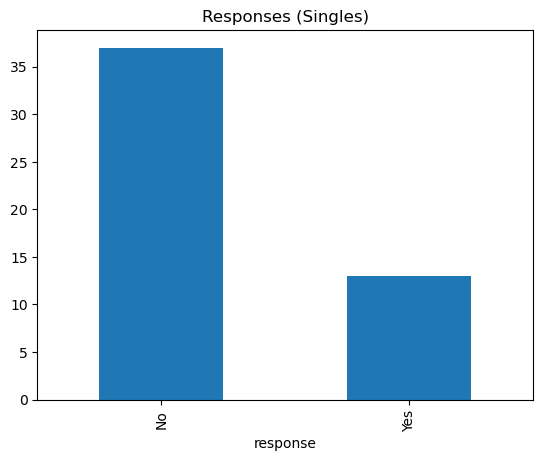

In [12]:
time.sleep(300) # sleep 5 minutes to avoid hitting rate limits

df_singles = extract_and_analyze_results(usa_singles, "Singles")
#control.checkpoint()


################# Analyzing results for Families... #################
2025-10-05 14:08:46,069 - MainThread(20708) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 14:08:46,918 - MainThread(20708) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 14:08:55,659 - MainThread(20708) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response":"Yes","justification":"The agent explicitly answered \'Yes\' — she would use WanderLux for a single vacation next year because it offers vetted, adults-only beachfront/spa stays that reduce planning risk and logistical friction (important with two young children and a demanding job), while meeting her requirements for rest, direct-flight options, medical info, quiet hours, privacy and acceptable price."}'

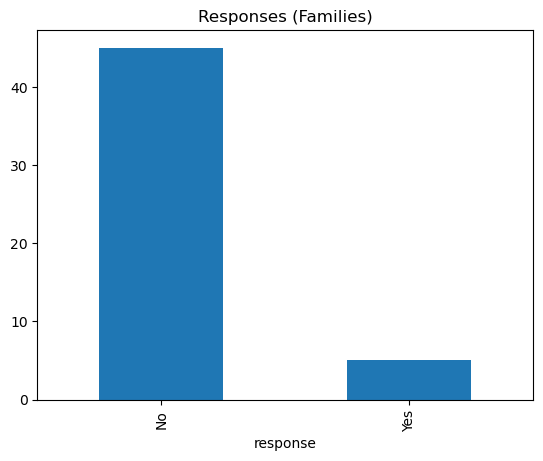

In [13]:
time.sleep(300) # sleep 5 minutes to avoid hitting rate limits

df_families = extract_and_analyze_results(usa_families, "Families")
#control.checkpoint()

################# Analyzing results for Couples... #################
2025-10-05 14:21:35,053 - MainThread(20708) - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-05 14:21:36,146 - MainThread(20708) - tinytroupe - INFO - Waiting 5 seconds before next API request (to avoid throttling)...
2025-10-05 14:21:44,344 - MainThread(20708) - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response": "No", "justification": "Agent explicitly answered \'No\', stating they are unemployed and on a tight budget and prefer outdoorsy, low-cost trips (fishing, rustic cabin, road trip) rather than luxury beachfront/spa vacations; they said they might consider it only as a special gift or if heavily discounted."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
2025-10-05 14:21:44,392 - MainThread(207

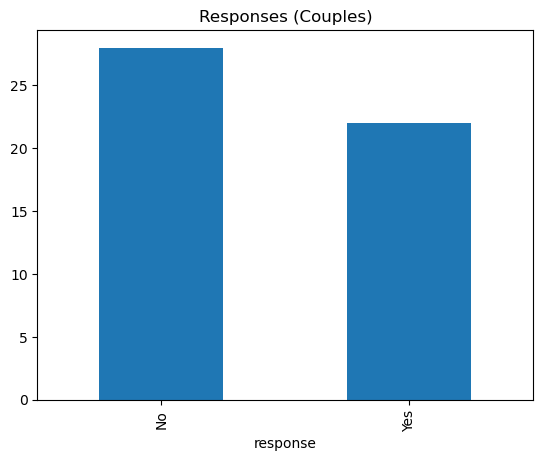

In [14]:
time.sleep(300) # sleep 5 minutes to avoid hitting rate limits

df_couples = extract_and_analyze_results(usa_couples, "Couples")
#control.checkpoint()

In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import numpy as np

def plot_combined_responses(title, name_to_df, individual_responses=None):
    """
    Combine the given dataframes in a single chart with grouped bars.
    Each dataframe is a different color and is properly labeled.
    
    Parameters:
    -----------
    title : str
        Title for the plot
    name_to_df : dict
        Dictionary mapping names to dataframes
    individual_responses : list, optional
        List of responses to count individually. If None, only 'Yes' and 'No' are counted individually.
        All other responses will be grouped as "Others".
    """
    print(f"################# Plotting combined responses for {title}... #################")
    
    # If individual_responses is not provided, default to Yes and No
    if individual_responses is None:
        individual_responses = ["Yes", "No"]
    
    # Get unique categories (individual responses + "Others")
    categories = individual_responses.copy()
    
    # Prepare data for grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Define a colormap
    cmap = matplotlib.colormaps['tab10']
    
    # Calculate bar width based on number of groups
    num_groups = len(name_to_df)
    bar_width = 0.8 / num_groups  # Adjust the 0.8 to control spacing
    
    # Check if we need to add "Others" category
    has_others = False
    for df in name_to_df.values():
        if any(resp not in [r.lower() for r in individual_responses] for resp in [r.lower() for r in df["response"].unique()]):
            has_others = True
            break
    
    if has_others and "Others" not in categories:
        categories.append("Others")
    
    # For each category, plot grouped bars for each dataframe
    for i, category in enumerate(categories):
        for j, (name, df) in enumerate(name_to_df.items()):
            # Calculate the position for this bar
            position = i + (j - num_groups/2 + 0.5) * bar_width
            
            # Count occurrences for this category
            if category == "Others":
                # Count all responses that are not in individual_responses (case-insensitive)
                count = sum(df["response"].value_counts().get(resp, 0) 
                           for resp in df["response"].unique() 
                           if not any(resp.lower() == ind.lower() for ind in individual_responses))
            else:
                # Count occurrences of this category (case-insensitive)
                count = sum(df["response"].value_counts().get(resp, 0) 
                           for resp in df["response"].unique() 
                           if resp.lower() == category.lower())
            
            # Plot the bar
            ax.bar(position, count, width=bar_width, alpha=1.0, 
                   label=name if i == 0 else "", color=cmap(j % 10))
    
    # Set the x-ticks in the middle of each group
    ax.set_xticks(np.arange(len(categories)))
    ax.set_xticklabels(categories, fontsize=12)
    
    # Increase font sizes for better readability
    plt.title(f"Combined Responses ({title})", fontsize=16)
    plt.xlabel("Response", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.legend(fontsize=12)
    
    # Also increase tick label sizes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.tight_layout()
    plt.show()

################# Plotting combined responses for travel preferences by group... #################


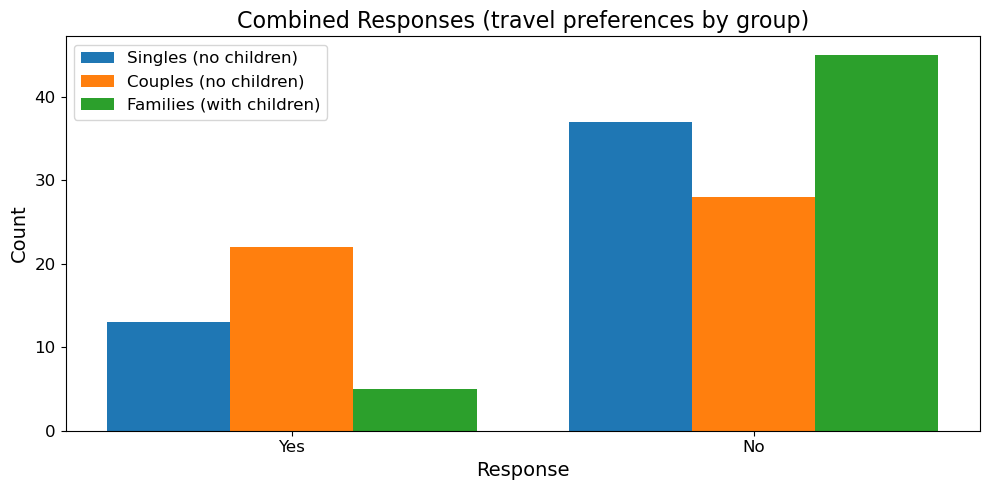

In [16]:
plot_combined_responses("travel preferences by group", 
                        {"Singles (no children)": df_singles, 
                         "Couples (no children)": df_couples,
                         "Families (with children)": df_families})

In [17]:
# statistics about the DF
df_singles.value_counts("response")

response
No     37
Yes    13
Name: count, dtype: int64

In [18]:
df_couples.value_counts("response")

response
No     28
Yes    22
Name: count, dtype: int64

In [19]:
df_families.value_counts("response")

response
No     45
Yes     5
Name: count, dtype: int64

In [20]:
#control.end()

## Compare with Empirical Data (if any)